# **Assignment Instructions:**

1. Read all Instructions carefully provided for each question before beginning your work.

2. Analyze each question thoroughly and document your result, analysis, and solutions within the Google Colab notebook itself.


3. This is an individual assignment. Your work should be original. Copying from peers or online sources is strictly prohibited.

4. The use of AI tools like ChatGPT, Copilot, Gemini, LLMs or any other automated code generation tools for writing code is strictly forbidden. We will be taking your Viva for evaluating the assignment.

5. Clearly document your code with comments and explanations so that it is easy to understand your approach and thought process. It is ok to take help from some external tutorial; however cite it in your documenation otherwise it will be considered plagiarism.

6. Follow the submission guidelines strictly. Make sure your notebook is well-organized and includes all necessary code, explanations, and outputs.

7. **Once you submit your assignment, a viva will be taken to evalute you.
For the assignment submission you will have to download this colab notebook as .ipynb file, zip it and submit it via this form: https://forms.gle/7JU8AyLiXPSBwieQ7**
8. The name of the zip file should follow this format: "CS779-A1-[yourfirstname]-[yourlastname]-[rollno].zip" where you out you replace [yourfirstname] with your actual first name and same for [yourlastname] and [rollno]. If you fail to do this, then we will not able to recover your assignment from pool of assignments as the process is automated.

9. **The deadline for submission is August 26, 2025, 11:59 AM. Note that this is a strict deadline.**

10. The above form will close at the above mentioned deadline and no further solutions will be accepted either by email or by any other means.

11. Please create Hugging Face account (its free) at: https://huggingface.co/

12. For the purpose of this assignment, you will require hugging face token; check out the steps below.

13. If you have any doubt or get stuck in any problem, consult  TA's over Discord. It's better to take help of TAs than cheating.



#**Enter your details below:**

Full Name: Subham Anand

Roll No: 221093

Email: subhamanand.2004@gmail.com



#Instructions for creating huggingface token



1. Create hugging face account and on the top right corner select your profile and click on settings.
2. On the left side of the screen click on "Acess Tokens" option then click on "Create Token" option.
3. Choose the "Write" option, give the name for the token and click on Create Token option.

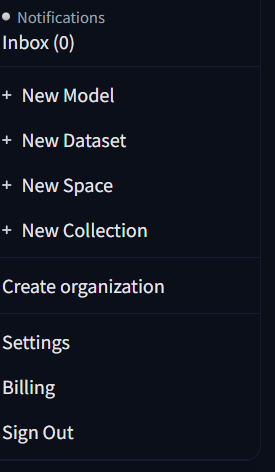
<br>
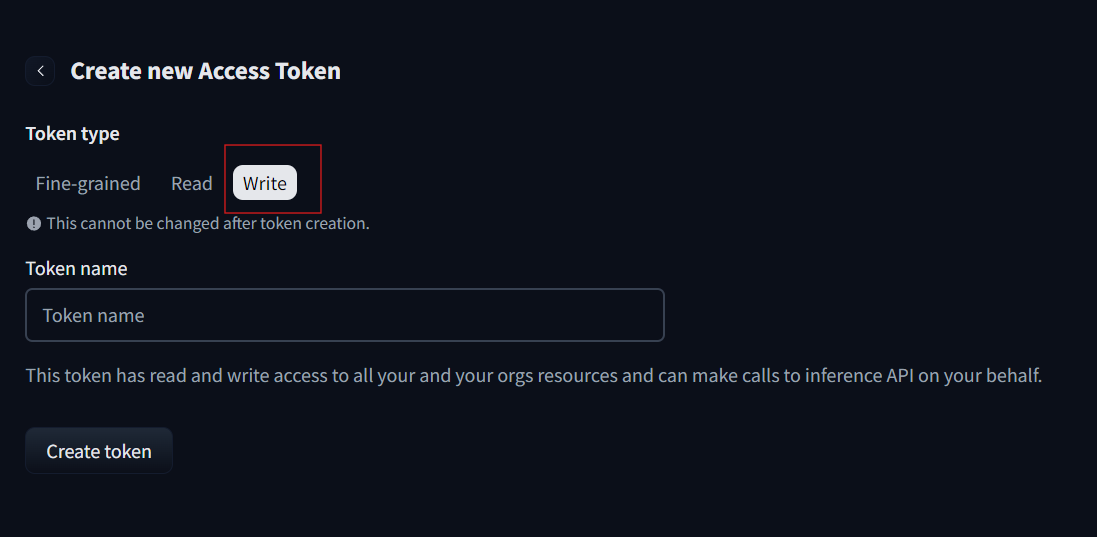

# Initial Setup
1. Install the `datasets` library made by huggingface to download and interact with the data. Install the `indic-nlp-library` which contains some relevant functions for processing Indian languages.
2. Import the `load_dataset` method from `datasets`
3. Copy and paste the huggingface token you generated above to start using the assingment data
4. The repository id of the data stored in https://huggingface.co/datasets/Exploration-Lab/CS779-Fall25
5. Import `nltk` (natural language toolkit) library for processing english language data.
6. English consists of many "stopwords" including the aritcles like "a", "an", "the" and joining words like "with", "and" etc. Typical NLP tasks filter out these "stopwords" as they do not carry significant meaning to understand the sentence. So let's download all the stopwords and keep them ready for use.

In [ ]:
!pip install datasets indic-nlp-library
!pip install --upgrade datasets
from datasets import load_dataset
# hf_token = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx" # Put your huggingface token here
hf_token = ""
REPO_ID = "Exploration-Lab/CS779-Fall25" # this is the repository ID where the assignment data is stored

import nltk
nltk.download("stopwords")

import os
from collections import Counter

import pandas as pd
import numpy as np

import spacy
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

from tqdm import tqdm
tqdm.pandas()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Question 1: Zipf’s Law**








## Introduction

In this question, you will explore Zipf's Law by analyzing the frequency distribution of words in various languages, including English and 10 different Indian languages. Your task is to apply statistical analysis, plot frequency vs. rank curves, and derive insights from your findings.

## Objectives

- Understand and analyze Zipf's Law in the context of different languages.
- Implement methods to handle large corpora efficiently.
- Calculate the parameter "k" in the power-law relationship.
- Plot frequency vs. rank and log-log plots to visualize the relationship.
- Make detailed observations and interpretations of the results.

## Background: What is Zipf's Law?

Zipf’s Law states that in a large corpus of natural language, the frequency of any word is inversely proportional to its rank in the frequency table. This implies that frequency and rank are related by a power law.


Zipf's Law can be expressed as:
$$
f(r) = \frac{C}{r^k}
$$
Where:
- $ f(r) $ is the frequency of the word at rank $ r $.
- $ r $ is the rank of the word (1 for the most frequent word, 2 for the second most frequent, etc.).
- $ C $ is a constant that depends on the distribution of the frequencies.
- $ k $ is a parameter that decides the power law relationship.

For example, for some given constant "$k$", the most frequent word will appear roughly twice as often as the second most frequent word. The second most frequent word will appear approximately three times as often as the third most frequent word, and so on.



## **Question 1: Analyzing Zipf’s Law Across Multiple Languages**

## Instructions and Guidelines
We will be developing a modular code for solving Question 1. Hence you will have to fill in the missing code pieces and at the end of Question 1 there would be a `main` function that would call all the relevant functions to solve the tasks given below.

Importing relevant libraries.

In [ ]:
import math
import matplotlib.pyplot as plt
from indicnlp.tokenize import indic_tokenize
from collections import defaultdict
from nltk.corpus import stopwords
from sklearn.linear_model import LinearRegression
from IPython.display import display

### 1. Dataset and Language Selection [100 marks]

You are provided with datasets for multiple languages (Dataset is available  on [huggingface](https://huggingface.co/datasets/Exploration-Lab/E-Masters-EE958/tree/main/indic-corpus)), comprising of English and 10 Indian languages.
**Tasks**
1. Load the dataset for each language from huggingface
2. Preprocess the text to tokenize it into words. Ensure that you properly handle different languages using appropriate tokenizers like those available in the Indic library. Feel free to refer to the [documentation](https://anoopkunchukuttan.github.io/indic_nlp_library/) to write the code stubs in the following sections.

In [ ]:
indic_dataset = load_dataset(REPO_ID, name="indic-corpus", token=hf_token, split="train")
indic_dataset

README.md:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

indic-corpus/train-00000-of-00001.parque(…):   0%|          | 0.00/106M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11 [00:00<?, ? examples/s]

Dataset({
    features: ['lang_id', 'text'],
    num_rows: 11
})

In [ ]:
indic_dataset['lang_id'][0:]

In [ ]:
# This function generates chunk which is feeded to spacy nex and it is ensured slicing doesn't slice through any words by slicing till next space
def chunk_on_space_generator(text, chunk_size):
    start = 0
    while start < len(text):
        end = start + chunk_size
        if end >= len(text):
            yield text[start:]
            break
        safe_end = text.find(' ', end)
        if safe_end == -1:
            yield text[start:]
            break

        chunk = text[start:safe_end]
        yield chunk

        start = safe_end + 1

In [ ]:
english_stopwords = set(stopwords.words('english'))
CHUNK_SIZE = 900000
def tokenize(text,lang_id):
  if lang_id == 'en':
    all_tokens = []
    for text_chunk in chunk_on_space_generator(text,CHUNK_SIZE):
      doc = nlp(text_chunk, disable=["tagger", "parser", "attribute_ruler", "ner", "lemmatizer"]) # Disable all except tokenizer
      for token in doc:
        if token.text.lower() not in english_stopwords:
          all_tokens.append(token.text.lower())
    return all_tokens
  else:
    return indic_tokenize.trivial_tokenize(text,lang_id)

### 2. Word Frequency Analysis [50 marks]

Once you have tokenized the text:

- **Task**: Calculate and store (using appropriate data-structure) the frequency of each word in the corpus.

In [ ]:
def words_count(tokens):
  return Counter(tokens)

### 3. Word Frequency Analysis (Contd.) [50 marks]

- **Task:** Rank the words in the reverse order of their frequencies. Hence the most popular word should be first and the least popular word should be last

In [ ]:
def rank_words(words_count):
  ranked_words = words_count.most_common()
  return ranked_words

### 4. Plotting Zipf's Law Curves [100 + 100 marks]

You are required to plot two types of curves:

1. **Rank vs Frequency Curve**:
   - **Task**: Rank the words by their frequency and plot a graph with the rank on the x-axis and the frequency on the y-axis.
   
2. **Log Rank vs Log Frequency Curve**:
   - **Task**: Transform the ranks and frequencies to their logarithmic (natural logarithm) values and plot a graph with log rank on the x-axis and log frequency on the y-axis.
   
   - This plot will help you observe the linear relationship that typically characterizes Zipf’s Law.



In [ ]:
def plot_rank_vs_freq(ranked_words,ax,language_name):
  f = [freq for word,freq in ranked_words]
  r = list(range(1,len(ranked_words)+1))
  ax.plot(r,f)
  ax.set_title(f'Rank vs Frequency ({language_name})')
  ax.set_xlabel('Rank')
  ax.set_ylabel('Frequency')
  ax.grid(True)

In [ ]:
def plot_logrank_vs_logfreq(ranked_words,ax,language_name):
  log_f = [math.log(freq) for word,freq in ranked_words]
  log_r = [math.log(rank) for rank in range(1,len(ranked_words)+1)]
  ax.plot(log_r,log_f)
  ax.set_title(f'Log-Rank vs Log-Frequency ({language_name})')
  ax.set_xlabel('Log-Rank')
  ax.set_ylabel('Log-Frequency')
  ax.grid(True)

### 5. Finding the Parameter "k" [100 marks]

Zipf's Law involves a parameter "k" that characterizes the steepness of the frequency distribution curve.

- **Task**:  From the log-plot calculate the value of $ k $ for each language. (HINT: you could use linear regression on log plot.)



In [ ]:
len(indic_dataset['text'][0])

In [ ]:
def estimate_k(ranked_words):
  log_f = np.array([math.log(freq) for word,freq in ranked_words]).reshape(-1,1)
  log_r = np.array([math.log(rank) for rank in range(1,len(ranked_words)+1)]).reshape(-1,1)
  # Create the filter condition
  filter_condition = log_f >= 2
  log_f = log_f[filter_condition].reshape(-1,1)
  log_r = log_r[filter_condition].reshape(-1,1)
  model = LinearRegression()
  model.fit(log_r,log_f)
  slope = model.coef_[0][0]
  return -1*slope

We are talking about the total very large Corpus for every language Now if some values don't even appear 0.01% of total tokens then they woudl just create hindrance for k-value calculation by regression.Hence we remove those tokens that have very less frequency for the purpose of k-value calculation bcz more tokens will have same/similar frequency but rank would differ a lot for tokens with same frequency.

### 6. Observations and Interpretations [20 + 20 + 20 + 20 marks]

- **Task**: Write a detailed observation for each language, addressing the following points:
  - How closely does the word frequency distribution follow Zipf’s Law?
  - What are the values of $ k $ for each language? Are they close to 1?
  - Compare the distributions across different languages. Are there any noticeable differences or patterns?
  - Discuss any challenges you faced, especially with large corpora, and how you overcame them.


## Answered Below

### `main` function

The `main` function calls all the other functions above to analyse the data and develop the plots for results and observations.

Try to change the language and see how the results vary.

Reference table for language IDs:

| ID | Language |
| -- | -------- |
| 0  | Assamese |
| 1  | Bengali  |
| 2  | English  |
| 3  | Gujarati |
| 4  | Hindi    |
| 5  | Kannada  |
| 6  | Marathi  |
| 7  | Odia     |
| 8  | Punjabi  |
| 9  | Tamil    |
| 10  | Telugu   |

In [ ]:
# To have better representation in Table
language_names = [
    "Assamese",
    "Bengali",
    "English",
    "Gujarati",
    "Hindi",
    "Kannada",
    "Marathi",
    "Odia",
    "Punjabi",
    "Tamil",
    "Telugu"
  ]

In [ ]:
def process_Corpus(indic_dataset, language_index,lang_name,k_val_data):
  token = tokenize(indic_dataset['text'][language_index],indic_dataset['lang_id'][language_index])
  word_count = words_count(token)
  ranked_words = rank_words(word_count)
  fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # To create two plots side by side
  plot_rank_vs_freq(ranked_words,axes[0],lang_name)
  plot_logrank_vs_logfreq(ranked_words,axes[1],lang_name)
  plt.tight_layout() # to not allow plots to overlap
  plt.show()
  k = estimate_k(ranked_words)
  k_val_data.append({
      'Language': lang_name,
      'k': k
  })

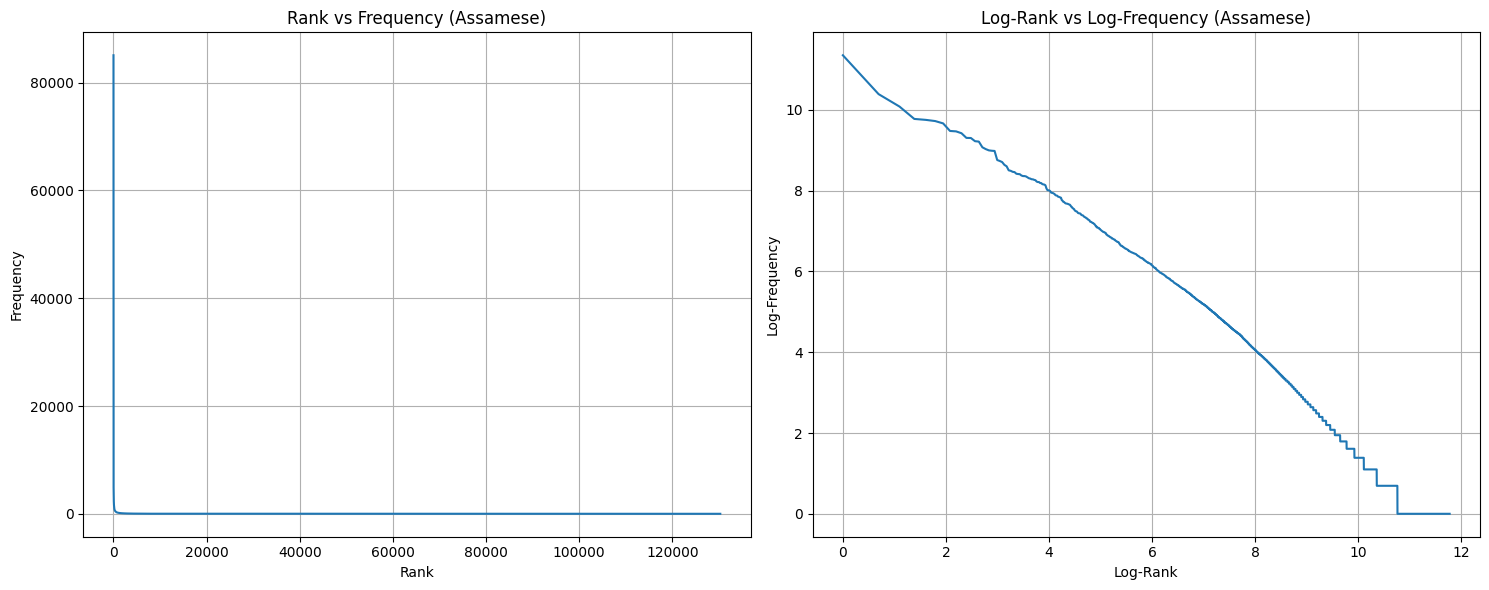

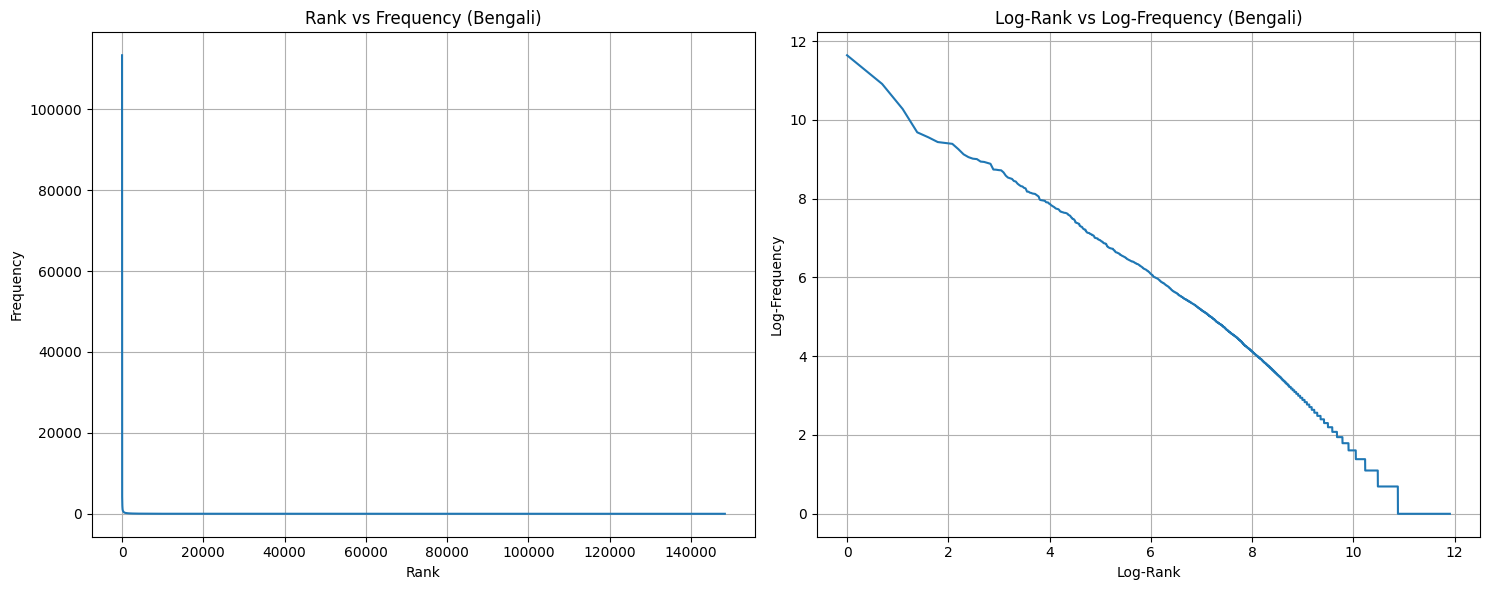

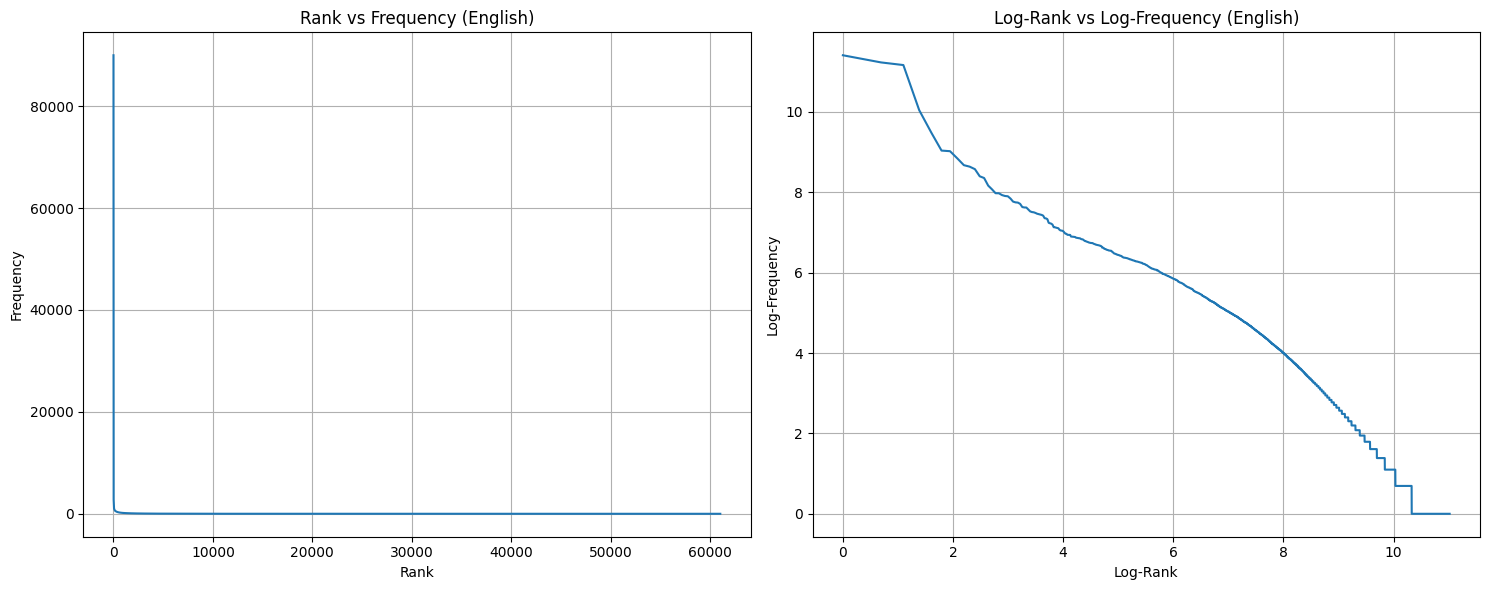

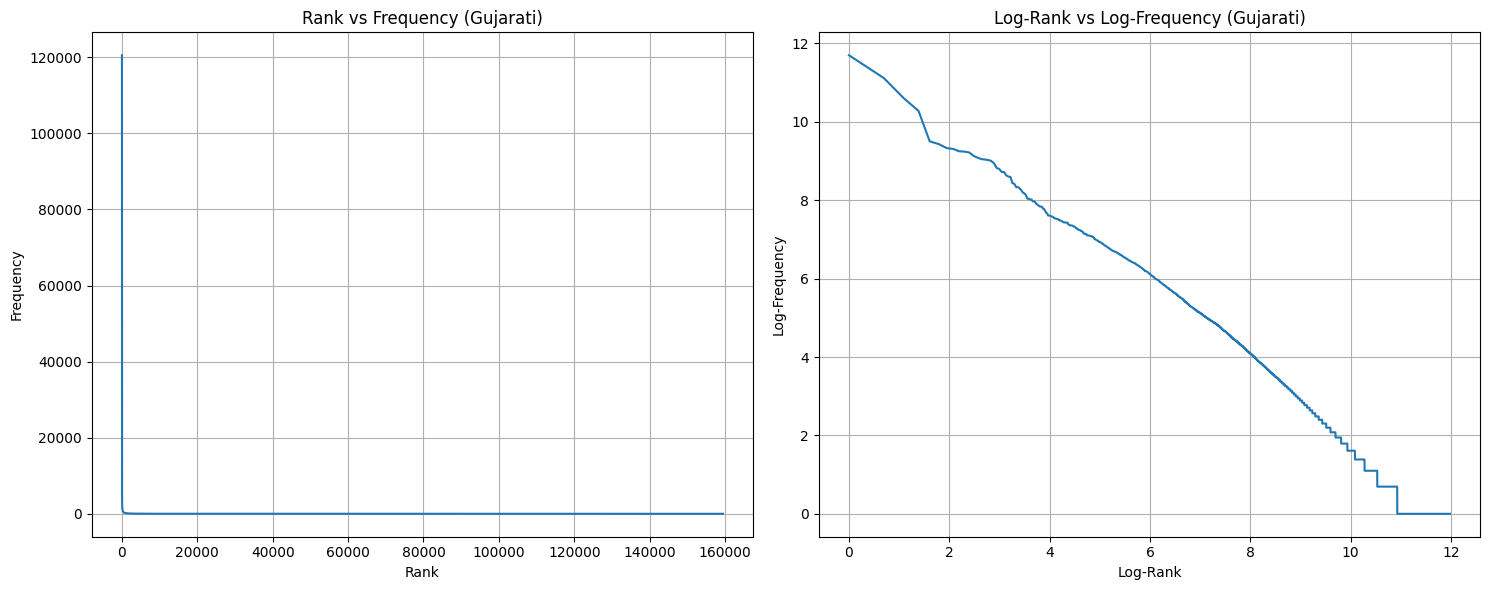

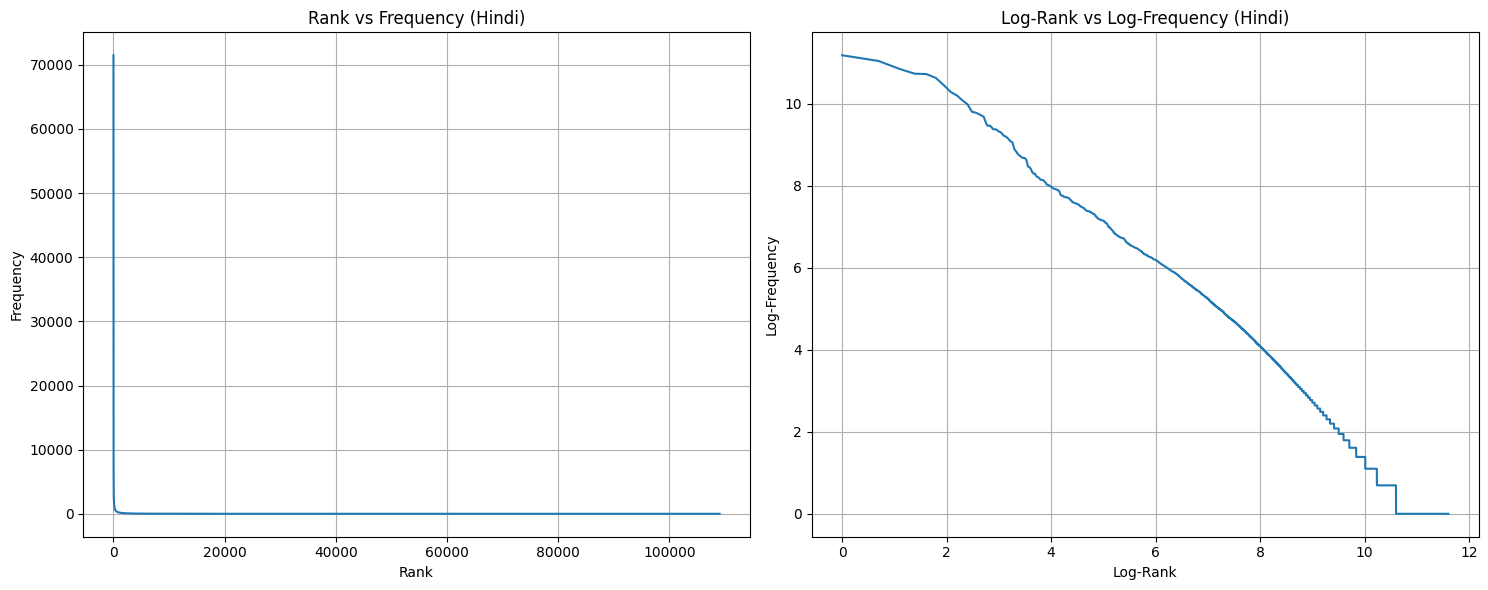

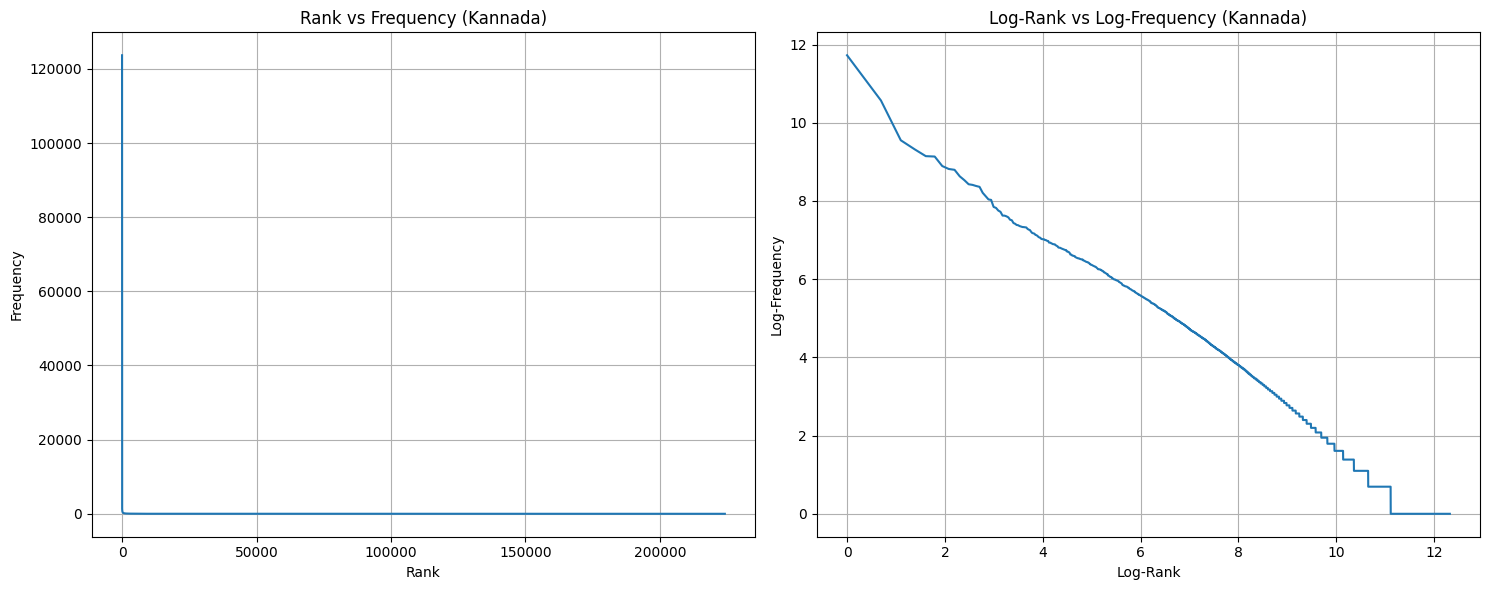

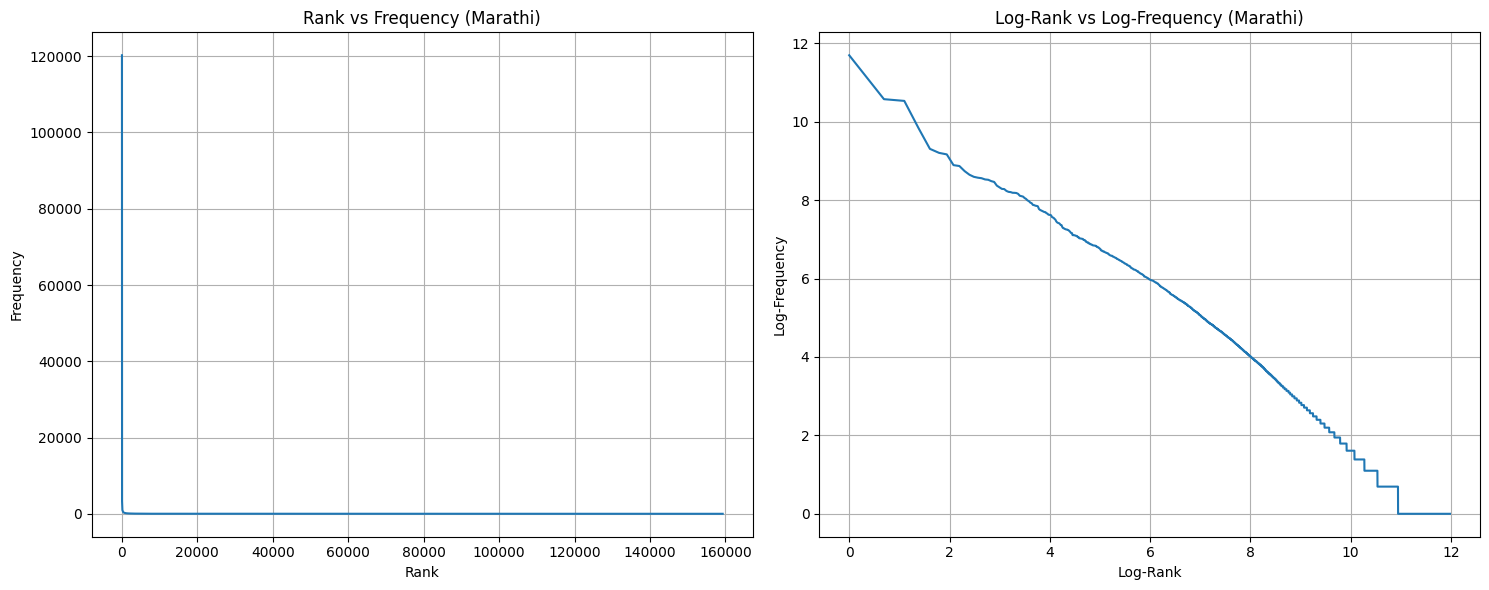

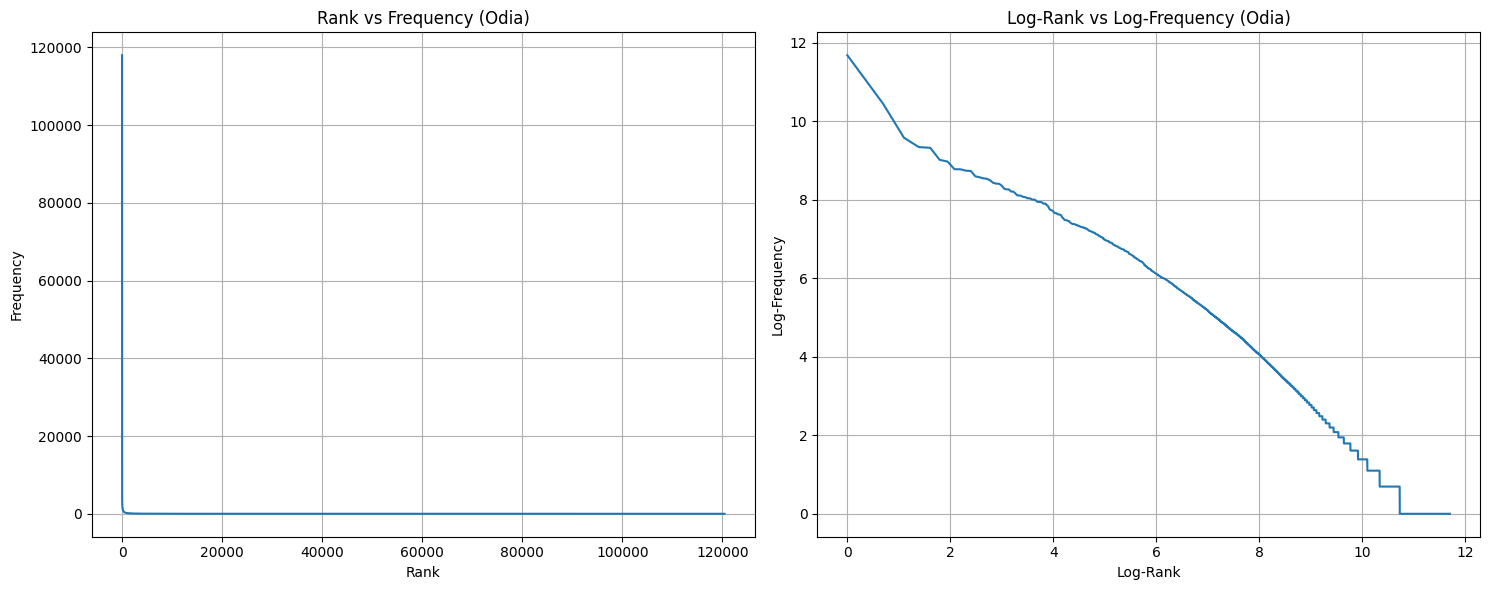

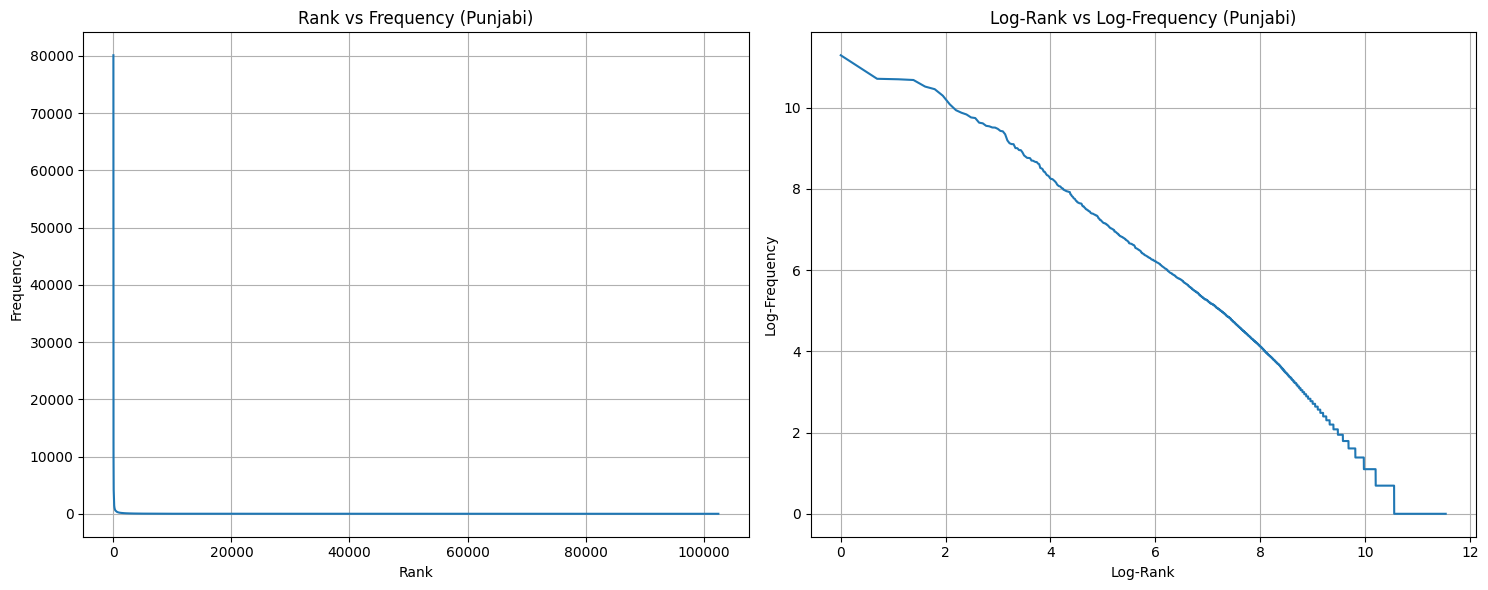

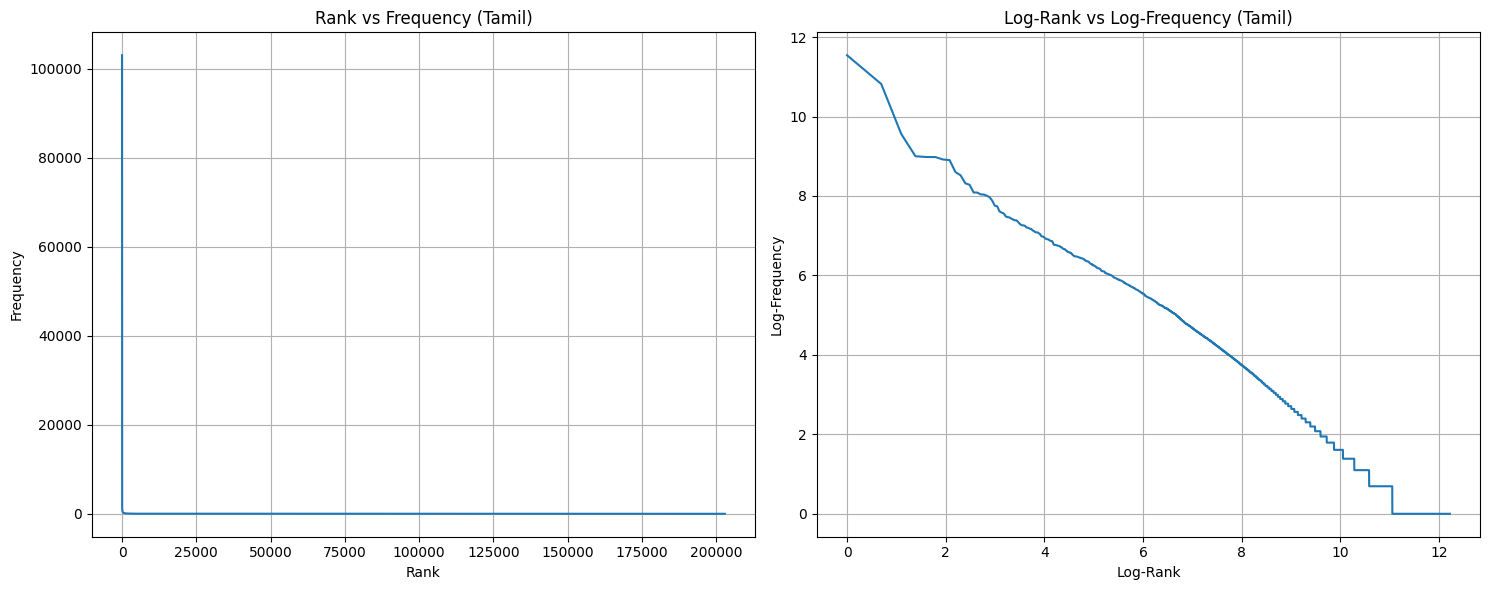

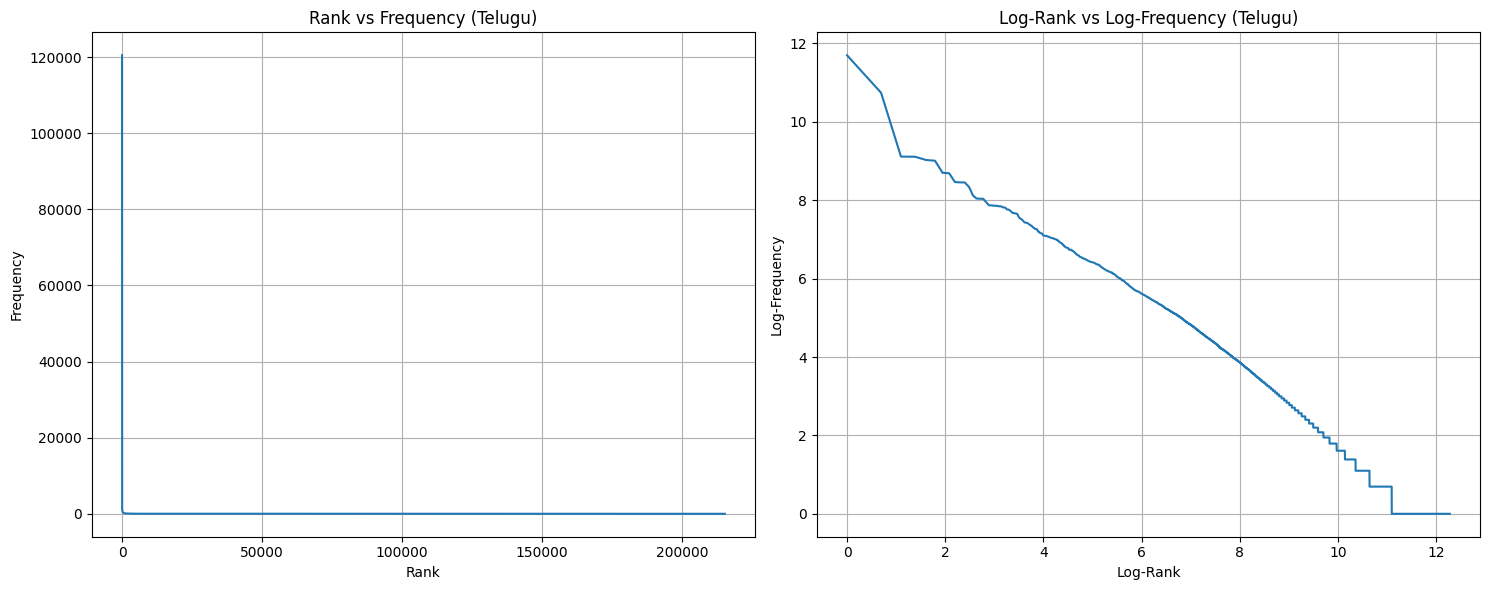

,Language,k
0,Assamese,1.155594912
1,Bengali,1.109469017
2,English,1.099061257
3,Gujarati,1.098452551
4,Hindi,1.190040193
5,Kannada,0.960190708
6,Marathi,1.075865535
7,Odia,1.146426423
8,Punjabi,1.208164391
9,Tamil,0.969779254


In [ ]:
def main():
    k_val_data=[]
    indic_dataset = load_dataset(REPO_ID, name="indic-corpus", token=hf_token, split="train")
    for language_index in range(11):
      process_Corpus(indic_dataset, language_index,language_names[language_index],k_val_data)
    pd.options.display.float_format = '{:.9f}'.format
    k_val_df = pd.DataFrame(k_val_data)
    display(k_val_df)
if __name__ == "__main__":
    main()

### 7. Reporting Results

Compile your results, including the plots and observations.
- Make sure you write all observations in a clear, well-organized manner, thoroughly explaining your methodology, findings, and conclusions. Include your plots, the calculated values of $ k $, and any insights or anomalies you observed.

Here are some reading resources for Zipf's law : \[link text](https://)
https://en.wikipedia.org/wiki/Zipf%27s_law \
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4176592/

Dataset : 'Indic-Language-Dataset/train.as' for assamese, similarily the dataset for all the languages is in folder Indic-Language-Dataset.

# Results

## How closely does the word frequency distribution follow Zipf’s Law?

 -    We can easily observe from the plots of different languages that frequency is inversely proportional to the rank, i.e., loosely speaking, as rank increases, the frequency decreases. This is exactly what Zipf's Law tells us. The log frequency vs log rank shows this linear relationship to follow **Zipf's Law**.

## What are the values of $k$ for each language? Are they close to 1?
  - The various values of $k$ are provided above in the output for each language in table form ranging from **0.96-1.20** and it clearly shows that the values are quite close to 1 for each language.

## Compare the distributions across different languages. Are there any noticeable differences or patterns?
  - Well One of the major difference seen across languagues are those of the frequency change in top 100 ranked words of each language i.e. on log scale from 0 to 2 on rank axis. Some have flatter slope like Hindi & Punjabi while some other have steep slope like Tamil & Telugu.
  
## Discuss any challenges you faced, especially with large corpora, and how you overcame them.
  - Yes the major challenge was with using spacy for tokenization of English Language it had a limit of tokens so I had to process & tokenize in chunks smaller than this limit.

# **Question 2, 3 : REGEX**

## Introduction:
In this question, you will explore how to find various patterns in text using regular expressions (regex). These patterns could further be useful to extract various kinds of information that could be part of a larger application.

## Problem Description:

You will analyzing a corpus of emails. In particular, we will be looking at ENRON Corpus (https://en.wikipedia.org/wiki/Enron_Corpus). Besides the email text, the corpus has phone numbers, emails, URLS, etc. embedded in the email text. You are required to build a regex-based tokenizer and subsequently, calculate statistics related to each word, phone numbers, email-id, and URLs. These statistics can then be visualized using various plots.

## What are Regular Expressions?
Regular expressions (regex or regexp) (https://en.wikipedia.org/wiki/Regular_expression) are powerful tools for finding or matching patterns in strings. They allow you to define specific patterns and search for characters or words within text.


## Regular expressions in Python
Python has a built-in package called `re` (https://docs.python.org/3/library/re.html), which can be used to work with Regular Expressions. Using this module, you specify the rules for the set of possible strings that you want to match; this set might contain English sentences, or e-mail addresses, or TeX commands, or anything you like. You can then ask questions such as “Does this string match the pattern?”, or “Is there a match for the pattern anywhere in this string?”. You can also use REs to modify a string or to split it apart in various ways.

## Rules

Regular expressions can contain both special and ordinary characters. Most ordinary characters, like `'A'`, `'a'`, or `'0'`, are the simplest regular expressions; they simply match themselves. You can concatenate ordinary characters, so `last` matches the string `'last'`.

Some characters, like `'|'` or `'('`, are special. Special characters either stand for classes of ordinary characters, or affect how the regular expressions around them are interpreted.


Here’s a complete list of the metacharacters;

`. ^ $ * + ? { } [ ] \ | ( )`



You can follow this cheatsheet while constructing regular expressions, it's available on `pythex.org`:

![regex-cheatsheet](https://i.imgur.com/XnEvz1z.png)

You can read more about them here: https://docs.python.org/3/library/re.html


## Performing Matches

Once you have an object representing a compiled regular expression, what do you do with it? Pattern objects have several methods and attributes. Only the most significant ones will be covered here; consult the `re` docs for a complete listing.

![match](https://i.imgur.com/gkKOxJO.png)


`match()` and `search()` return `None` if no match can be found. If they’re successful, a match object instance is returned, containing information about the match: where it starts and ends, the substring it matched, and more.

You can learn about this by interactively experimenting with the `re` module.

Learn more about this here: https://docs.python.org/3/howto/regex.html#performing-matches



### **Tips for Writing Regular Expressions**

- **Start Simple**: Begin with basic patterns and gradually add complexity.
- **Use Metacharacters Wisely**: Characters like `.` (any character) and `*` (zero or more) can be very powerful but may lead to unintended matches.
- **Escape Special Characters**: If you need to match characters that have special meanings in regex (like `.` or `*`), use a backslash (`\`) to escape them.
- **Test Regularly**: Use online tools like [pythex](https://pythex.org/) to test your regex patterns before using them in your code.
- **Break Down Complex Patterns**: If you’re building a complicated regex, break it down into smaller, manageable pieces and test each part.


## Sites where you can learn more about regex

1. https://docs.python.org/3/library/re.html
2. https://docs.python.org/3/howto/regex.html#regex-howto
3. https://www.w3schools.com/python/python_regex.asp
4. https://developers.google.com/edu/python/regular-expressions
5. Site for testing regex: https://pythex.org/










**Example of Regular Expressions For Email**

To extract an email address from text using a regular expression, you need to define a pattern that matches the structure of an email address. Here's an explanation of a commonly used regex pattern for emails:

Regex Pattern for Emails: `[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}`


*Explanation*
- `[a-zA-Z0-9._%+-]+`: This part of the pattern matches the username part of the email.
  - **`[a-zA-Z0-9._%+-]`** specifies the allowed characters in the username, which include:
    - **`a-z`** and **`A-Z`**: Letters (both uppercase and lowercase).
    - **`0-9`**: Numbers.
    - **`.`**, **`_`**, **`%`**, **`+`**, **`-`**: Special characters often allowed in email usernames.
  - The **`+`** after the brackets means "one or more" of these characters.

- **`@`**: This matches the "@" symbol, which separates the username from the domain.

- **`[a-zA-Z0-9.-]+`**:
  - This part matches the domain name (e.g., `example` in `example.com`).
  - It includes:
    - **`a-z`** and **`A-Z`**: Letters.
    - **`0-9`**: Numbers.
    - **`.`** and **`-`**: Dots and hyphens, which are commonly used in domain names.
  - Again, the **`+`** means "one or more" of these characters.

- **`\.[a-zA-Z]{2,}`**:
  - This part matches the top-level domain (e.g., `.com`, `.org`).
  - **`\.`** matches the dot before the domain extension.
  - **`[a-zA-Z]{2,}`** matches two or more letters, representing common domain extensions like `.com`, `.org`, or `.edu`.

Example Matches:
This regex pattern will match email addresses like:
- `john.doe@example.com`
- `user.name+alias@sub.domain.org`
- `contact_us@service-provider.net`

This pattern ensures that it captures most standard email formats while being flexible enough to accommodate different valid email structures.

Similarly, you can write patterns for Phone Number and URLs.

### Instuctions and Guidelines
Similar to Question 1. We will be looking at a set of functions that are inter-connected and you will have to fill in the missing pieces of code. The `main` function at the end of the question connects all the functions.

## **Question 2: REGEX Based Extractor**


1.   Download the ENRON Corpus from Hugging Face and analyze the corpus. Observe the format of emails, phone numbers and URLs.



In [ ]:
from huggingface_hub import hf_hub_download
import pandas as pd
from datasets import load_dataset

def load_data():
    """
    Loading the data from huggingface

    Returns: a dataframe containing the text from wikipedia mini corpus.
    (Follow the huggingface links)
    """
    # Load the dataset from huggingface using the REPO_ID, name="email-corpus", token=hf_token, split="train"
    email_dataset = load_dataset(REPO_ID, name="email-corpus", token=hf_token, split="train")

    df = email_dataset.to_pandas()
    len_df = len(df)

    # Let's take only a small part of the complete training data to reduce time in running the below code.
    # If you are selecting a part of the data randomly then please set the seed to 42 (so that the results are reproducible)
    df = df.sample(frac=0.1, random_state=42)
    return df

dataframe = load_data()
dataframe.head()

README.md:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

email-corpus/train-00000-of-00003.parque(…):   0%|          | 0.00/228M [00:00<?, ?B/s]

email-corpus/train-00001-of-00003.parque(…):   0%|          | 0.00/201M [00:00<?, ?B/s]

email-corpus/train-00002-of-00003.parque(…):   0%|          | 0.00/178M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/517401 [00:00<?, ? examples/s]

,file,message
427616,shackleton-s/sent/1912.,Message-ID: <21013688.1075844564560.JavaMail.e...
108773,farmer-d/logistics/1066.,Message-ID: <22688499.1075854130303.JavaMail.e...
355471,parks-j/deleted_items/202.,Message-ID: <27817771.1075841359502.JavaMail.e...
457837,stokley-c/chris_stokley/iso/client_rep/41.,Message-ID: <10695160.1075858510449.JavaMail.e...
124910,germany-c/all_documents/1174.,Message-ID: <27819143.1075853689038.JavaMail.e...


2. **Extracting words, email, phone and URLs using regex**
   **[20 + 20 + 20 + 20 marks]** Write regular expression patterns for extracting words, email, phone number and URLs.



In [ ]:
import re

# It can be used to detect emails like example@gmail.com and ex2@iitk.ac.in
email_regex = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"

# This searches for standard format of US mobile numbers
phone_regex = r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}'

# this mainly searches httpand s may mayn't be there accompanied by ://
url_regex = r'https?://[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}[a-zA-Z0-9._/?#@!$&\'=]*'
words_regex = r'\b[a-zA-Z]+\b'


3. **[100 marks]** Extract words, emails, phone numbers and URLs by firing the patterns against the corpus. Collect counts for each (words, emails, phone numbers and URLs).

In [ ]:
email_counter = Counter()
phone_counter = Counter()
url_counter = Counter()
word_counter = Counter()

for message in dataframe['message']:
    emails = re.findall(email_regex, message, re.IGNORECASE)
    phones = re.findall(phone_regex, message)
    urls = re.findall(url_regex, message, re.IGNORECASE)
    clean_text = re.sub(email_regex, '', message)
    clean_text = re.sub(phone_regex, '', clean_text)
    clean_text = re.sub(url_regex, '', clean_text)
    words = re.findall(words_regex, clean_text)
    email_counter.update(emails)
    phone_counter.update(phones)
    url_counter.update(urls)
    word_counter.update(words)
phone_counter = Counter({
    phone: count for phone, count in phone_counter.items()
    if not re.fullmatch(r'\d+', phone)
})


print(f"Total unique emails found: {len(email_counter)}")
print(f"Total unique phone numbers found: {len(phone_counter)}")
print(f"Total unique URLs found: {len(url_counter)}")
print(f"Total unique words found: {len(word_counter)}")


Total unique emails found: 72270
Total unique phone numbers found: 61311
Total unique URLs found: 15954
Total unique words found: 166767


3. (Contd.) Additional tasks
- Write the code to get the top `n` items from the frequency dictionary you made above.
- Write the code to create a list for all the items (words, emails, phone, url and date) using the output of `top_n_items()`

Code to plot all the items for analysis

4. **[20 + 20 + 20 + 20 marks]** ***Visualization***:
    - Plot the histogram of frequency vs top-200 words.
    - Plot the histogram of frequency vs top-200 email
    - Plot the histogram of frequency vs top-200 phone-number.
    - Plot the histogram of frequency vs top-200 URLs.
    
    - What are your key observations?


/tmp/ipython-input-1636334793.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(frequencies), palette=palette)


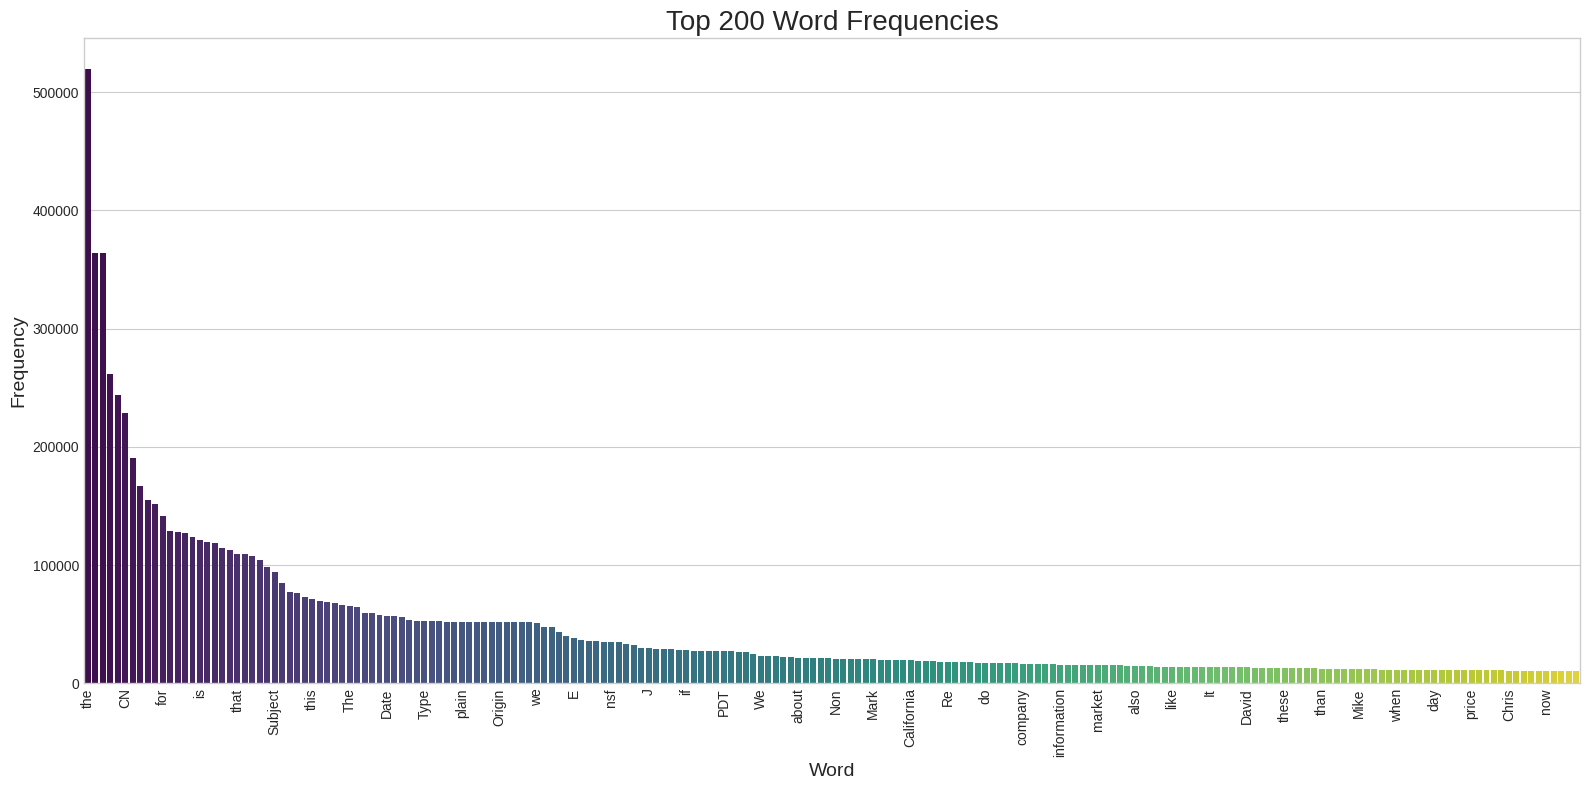

/tmp/ipython-input-1636334793.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(frequencies), palette=palette)


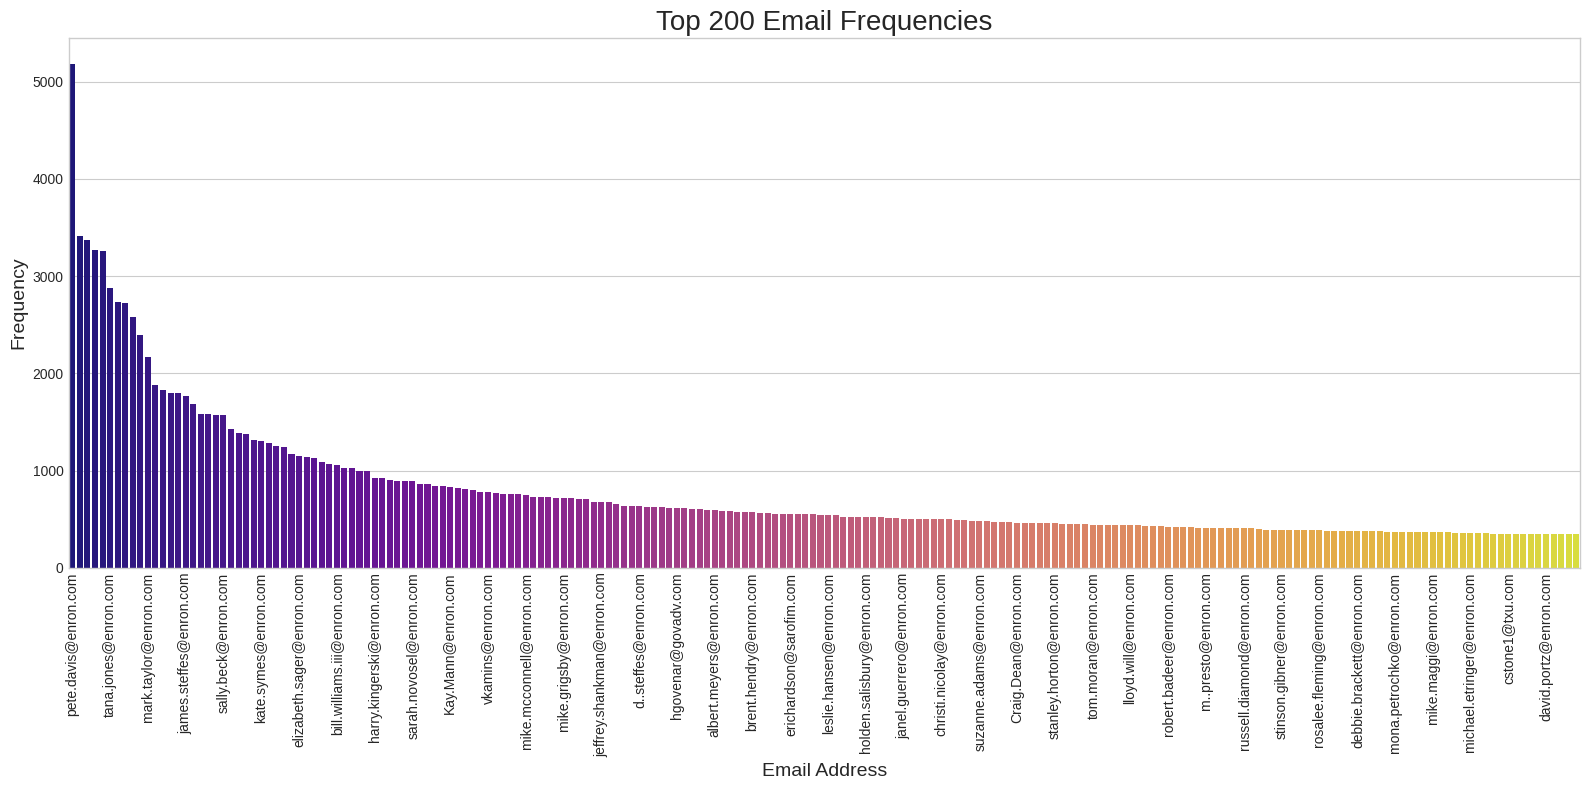

/tmp/ipython-input-1636334793.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(frequencies), palette=palette)


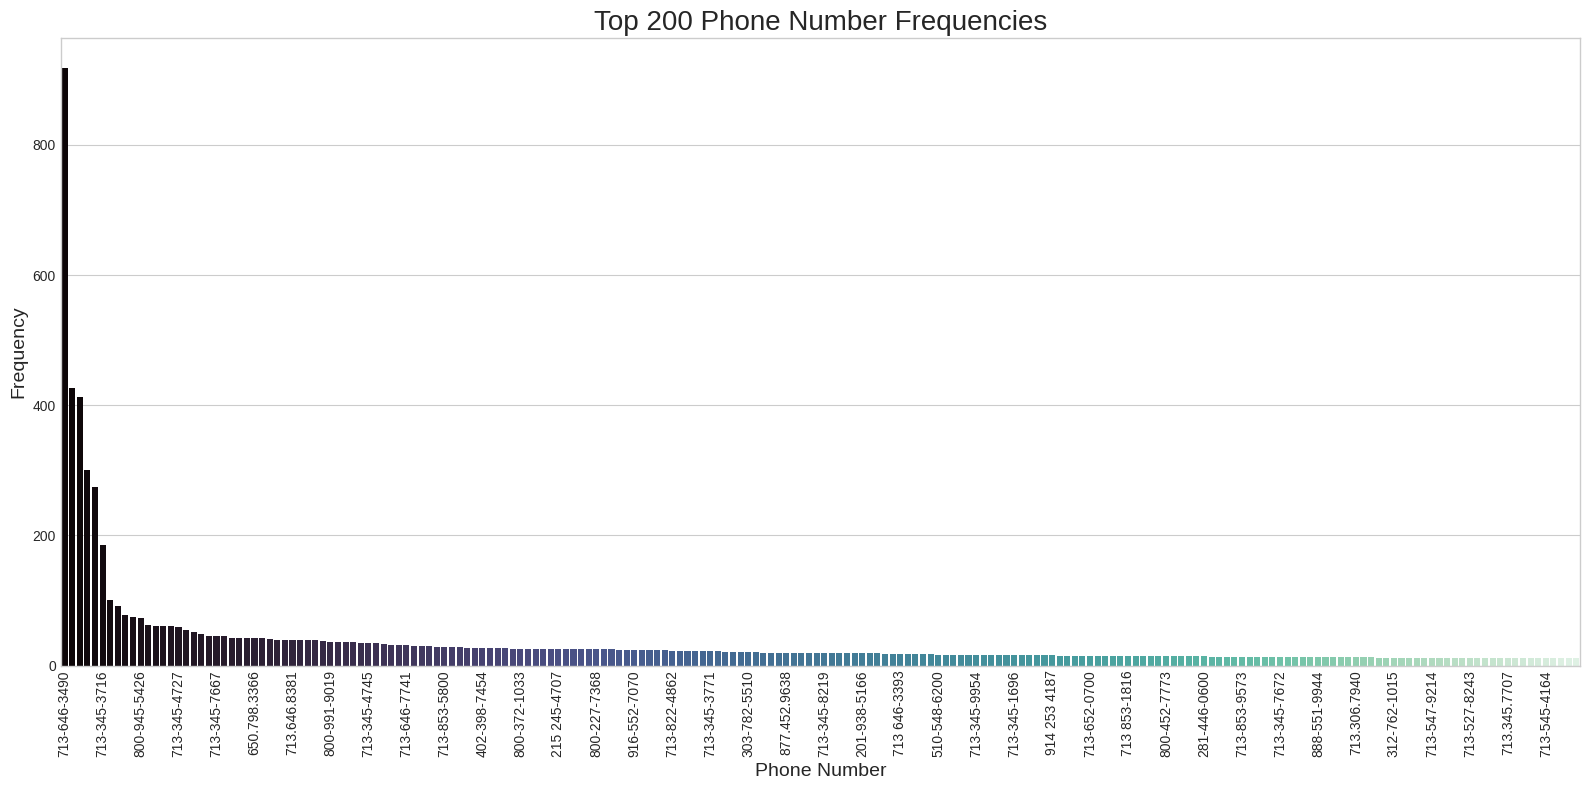

/tmp/ipython-input-1636334793.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(frequencies), palette=palette)


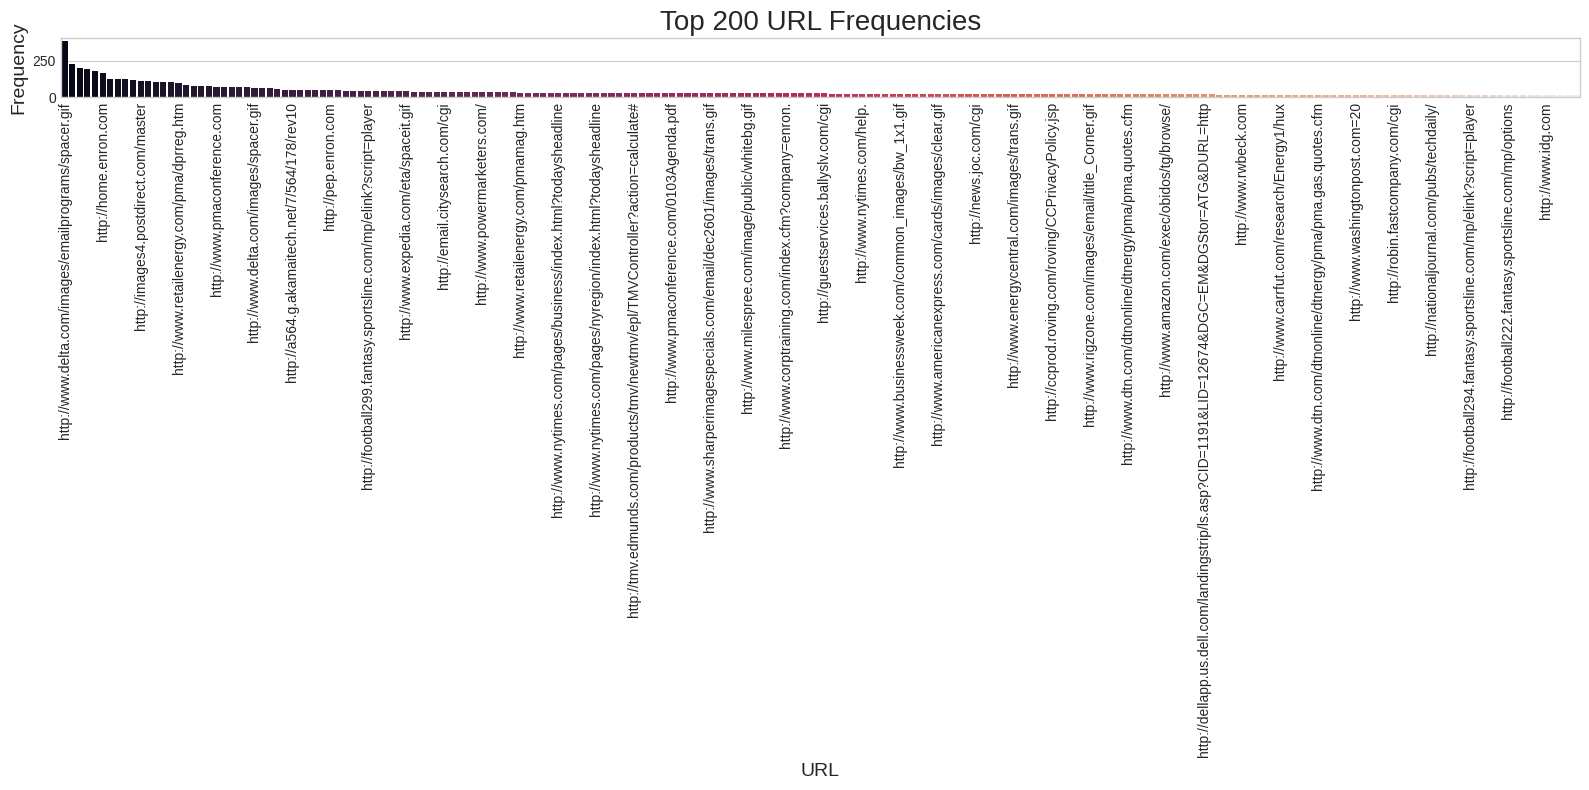

In [ ]:
import seaborn as sns
def display_top_n_chart(counts, title, xlabel, ylabel, n=200, palette="viridis"):
    top_items = counts.most_common(n)
    if not top_items:
        print(f"Warning: No data to plot for '{title}'.")
        return

    labels, frequencies = zip(*top_items)

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(16, 8))

    sns.barplot(x=list(labels), y=list(frequencies), palette=palette)

    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(ticks=range(0, len(labels), 5), labels=labels[::5], rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

# Plot charts for the top 200 items using the new function and different palettes
display_top_n_chart(word_counter, 'Top 200 Word Frequencies', 'Word', 'Frequency', palette="viridis")
display_top_n_chart(email_counter, 'Top 200 Email Frequencies', 'Email Address', 'Frequency', palette="plasma")
display_top_n_chart(phone_counter, 'Top 200 Phone Number Frequencies', 'Phone Number', 'Frequency', palette="mako")
display_top_n_chart(url_counter, 'Top 200 URL Frequencies', 'URL', 'Frequency', palette="rocket")

5. **[20 marks]** ***Word Frequency Analysis***:
   - After extracting all the words from the text, what are the top 5 most frequent words? Why do you think these words appear so often?

In [ ]:
most_frequent_words = word_counter.most_common(5)

print("The five most frequently occurring words are:")
display(most_frequent_words)


The five most frequently occurring words are:


[('the', 519622),
 ('X', 364146),
 ('to', 364136),
 ('and', 261602),
 ('of', 244268)]

The most frequent words are usually functional words like 'the', 'a', and 'in'. These terms are the basic building blocks needed to form sentences, so they show up everywhere. While they are essential for grammar, they don't carry significant meaning by themselves.

Additionally, some high-frequency words are simply characteristics of the specific dataset. For example, the token 'X' appears often in the Enron email collection because it's a technical marker used at the start of header lines like 'X-from' or 'X-cc'.

6. **[20 marks]** ***Phone Number Patterns***:
   - Analyze the phone numbers extracted. Do they follow a consistent format, or do they vary? What could be the reason for the variation?

An analysis of the extracted phone numbers reveals that they lack a single, uniform format. Instead, they appear in several common variations, including dot-separated (XXX.XXX.XXXX), hyphen-separated (XXX-XXX-XXXX), space-separated (XXX XXX XXXX), and a traditional style using parentheses ((XXX) XXX-XXXX).

This inconsistency is a direct result of combining data from diverse sources, accommodating flexible data entry systems, and reflecting different personal or regional writing habits. Since there is no universally enforced standard, the cosmetic formatting varies widely even when the underlying 10-digit number is the same

7. **[20 + 20 marks]** ***Email Analysis***:
   - What are the most common domain extensions (.com, .org, etc.) found in the extracted emails? What might this indicate about the types of organizations or individuals in the dataset?
   - Are there any email addresses with unusual patterns or special characters in the username? How does the regex pattern account for these cases?

In [ ]:
import re
from collections import Counter

domain_extensions = []
for email, count in email_counter.items():
    match = re.search(r'\.([a-zA-Z]{2,})$', email)
    if match:
        domain_extensions.append(match.group(1).lower())


extension_counts = Counter(domain_extensions)

print("Most common domain extensions:")
display(extension_counts.most_common(10))


Most common domain extensions:


[('com', 60933),
 ('net', 3985),
 ('edu', 2482),
 ('org', 1669),
 ('gov', 823),
 ('us', 640),
 ('ca', 405),
 ('uk', 213),
 ('mil', 189),
 ('br', 96)]

## Analysis of Email Patterns

the ``` .com``` domain is the most common and this indicates that most of the organisation/individuals use email domains from commercial organisations.   

The regular expression used to find emails, `[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}`, is intentionally **flexible**. It's designed to correctly capture addresses that include numbers, letters, and common special characters like periods (`.`), underscores (`_`), plus signs (`+`), and hyphens (`-`).

This even accounts for email like  examplez34@iitk.ac.in. I wasn't able to find any unusual patterns by this but there maybe some which require a lot of careful investigation





8. **[20 + 20 marks]** ***URL Structure Analysis***:
   - How many of the extracted URLs use `https` versus `http`? What does this indicate about the security practices of the sites referenced in the documents?
   - Identify the most common top-level domain (TLD) in the extracted URLs (e.g., .com, .org, .edu).

In [ ]:
from collections import Counter
from urllib.parse import urlparse
from IPython.display import display

http_count = 0
https_count = 0
tld_counts = Counter()

for url, count in url_counter.items():
    if url.startswith('http://'):
        http_count += count
    elif url.startswith('https://'):
        https_count += count

    try:
        hostname = urlparse(url).hostname
        if hostname:
            parts = hostname.split('.')
            if len(parts) > 1:
                tld = parts[-1].lower()
                tld_counts[tld] += count
    except Exception:
        pass

print(f"Number of HTTP URLs: {http_count}")
print(f"Number of HTTPS URLs: {https_count}\n")

print("Most Common Top-Level Domains (TLDs):")
top_tlds = tld_counts.most_common(10)

if not top_tlds:
    print("No TLDs were found.")
else:
    for tld, count in top_tlds:
        print(f"{tld:<10} – {count} URLs")

Number of HTTP URLs: 31731
Number of HTTPS URLs: 368

Most Common Top-Level Domains (TLDs):
com        – 27167 URLs
net        – 2459 URLs
org        – 686 URLs
           – 500 URLs
edu        – 435 URLs
gov        – 264 URLs
us         – 78 URLs
ca         – 67 URLs
au         – 59 URLs
uk         – 52 URLs


An analysis of the extracted URLs reveals two main trends regarding their security and type.

A significant security concern is that an overwhelming majority of the links use the non-secure http protocol. The fact that only a small fraction of the total URLs utilize the encrypted `https' protocol indicates that most referenced sites may not follow modern security standards.

The URLs predominantly belong to the .com domain, suggesting that the links are primarily to commercial or general-purpose websites. Additionally, the frequent appearance of .htm and .html file extensions shows that many links point directly to specific web pages rather than just the main site address.

## **Question 3: Playing with Wikipedia**


## Introduction:

In this question, you will get faimilar with spaCy libray (https://spacy.io/). For this purpose, you will be using English Wikipedia corpus as your test-bed.

#### Sites to Learn about Spacy:
1. https://spacy.io/usage/spacy-101
2. https://course.spacy.io/en/
3. https://course.spacy.io/en/

Download the English Wikipedia Corpus from provided hugging face repo (`REPO_ID = "Exploration-Lab/CS779-Fall25"`).

## Instructions:

In this guide, we will explore how to analyze the English Wikipedia Corpus using spaCy, a powerful NLP library in Python.

## Step 1: Setting Up the Environment
Before starting, ensure you have Python and the necessary libraries installed, particularly SpaCy and its English language model. SpaCy is an NLP library that offers tools for tokenization, POS tagging, and Named Entity Recognition (NER).

## Step 2: Loading the Wikipedia Corpus
The first step is to load the English Wikipedia Corpus. You can access this dataset from the provided Hugging Face repository. The corpus contains a vast collection of articles from Wikipedia, which serves as a rich resource for NLP analysis. Note that the corpus is in the Apache "Paraquet" format. You can also check out the file via command line using paraquet-tools utility (https://pypi.org/project/parquet-tools/).



**Handling Large dataset**

If the computational resources in Colab are unable to handle the dataset, implement a chunking strategy to read the data in smaller portions . This approach will help you manage memory efficiently while still processing the entire corpus.





\Download the English Wikipedia Corpus from provided hugging face repo (`REPO_ID = "Exploration-Lab/CS779-Fall25"`).

In [ ]:
from huggingface_hub import hf_hub_download
import pandas as pd
from datasets import load_dataset, Dataset


In [ ]:
def load_data():
    dataset = load_dataset("Exploration-Lab/CS779-Fall25", "default", token=hf_token, split="train")
    dataset = dataset.to_pandas()
    dataset = dataset.sample(frac=0.01, random_state=42)
    dataset = Dataset.from_pandas(dataset)
    return dataset
dataset = load_data()

In [ ]:
dataset

Dataset({
    features: ['text', '__index_level_0__'],
    num_rows: 27000
})

## Step 3: Corpus Analysis **[10 + 10 + 20 + 20 + 50 marks]**
Read the file and check out how wiki articles are organized in the file (Hint: there is one article per row).

### 1. Find the number of Wikipedia articles in the corpus:

In [ ]:
print(len(dataset))

27000






### 2. Analyze the pattern used for sub-headings and extract them using regex:
As you would have observed, that in any Wikipedia article, there are sub-topics which are separated by a sub-heading for example, sub-headings like "History", "Career," etc). Analyze each article, find out how these sub-headings are present in the text of each article, i.e., what type of pattern is used to demark sub-heading. Formulate a regex pattern to extract all these sub-heading titles. NOTE: You can ignore the hierarchy and assume that a sub-sub-heading as a sub-heading.

In [ ]:
print(dataset.select(range(1))['text'][0])

"First Time Again" is the sixth season premiere of the post-apocalyptic horror television series The Walking Dead, which aired on AMC on October 11, 2015. The episode was written by Scott M. Gimple and Matthew Negrete, and directed by Greg Nicotero. The episode aired in an expanded 90-minute time slot. Still having trouble assimilating into the Alexandria Safe-Zone, Rick Grimes (Andrew Lincoln) and his group come up with a plan to lure a gargantuan herd of walkers away from a quarry near Alexandria. In the midst of this new threat, flashbacks show the events following Pete's execution, including Rick's new leadership role and reunion with Morgan Jones (Lennie James). This episode features many recurring guest stars, including Alexandria newcomers from the comic book series, such as Heath (Corey Hawkins), Scott (Kenric Green), and Carter (Ethan Embry); the latter is an amalgamation of several comic book characters. ==Plot== Rick and a group of Alexandrians stand at the top of a granite 

### We can easily observe that the subheadings are written surrounded by  one or more '=' and that's what we'll use

In [ ]:
import re

def extract_subheadings(text):
    subheading_pattern = r'==+\s*(.*?)\s*==+'
    subheadings = re.findall(subheading_pattern, text, re.MULTILINE)
    cleaned_subheadings = [sub.strip() for sub in subheadings]
    return cleaned_subheadings

dataset = dataset.map(lambda example: {'subheadings': extract_subheadings(example['text'])})

print(dataset['subheadings'][:5])

Map:   0%|          | 0/270 [00:00<?, ? examples/s]

[['Plot', 'Production', 'Reception', 'Critical reception', 'Ratings', 'Accolades', 'References', 'External links'], ['Decided cases', '1980 – 1989', '1990 – 1994', '1995 – 1999', '2000 – 2004', '2005 – 2009', '2010 – 2014', '2015 – 2019', 'From 2020', 'Pending cases', 'See also', 'References', 'External links'], ['Casting and development', 'Appearances', 'Television', 'Literature', 'Powers and abilities', 'Magical powers', 'Molecular Immobilization', 'Molecular Combustion', 'Natural abilities', 'Reception', 'Cultural impact', 'See also', 'References', 'External links'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'Y', 'Former NHS trusts', '0-9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'Y', 'References', 'External links'], ['Location', 'History', 'Initial construction and the War of 1812', 'Abandonment', 'Construction of the second fort', 'Battle of the Win

In [ ]:
for i in range(10):
  print(f"Article Name {i}: {dataset['subheadings'][i]}")

Article Name 0: ['Plot', 'Production', 'Reception', 'Critical reception', 'Ratings', 'Accolades', 'References', 'External links']
Article Name 1: ['Decided cases', '1980 – 1989', '1990 – 1994', '1995 – 1999', '2000 – 2004', '2005 – 2009', '2010 – 2014', '2015 – 2019', 'From 2020', 'Pending cases', 'See also', 'References', 'External links']
Article Name 2: ['Casting and development', 'Appearances', 'Television', 'Literature', 'Powers and abilities', 'Magical powers', 'Molecular Immobilization', 'Molecular Combustion', 'Natural abilities', 'Reception', 'Cultural impact', 'See also', 'References', 'External links']
Article Name 3: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'Y', 'Former NHS trusts', '0-9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'W', 'Y', 'References', 'External links']
Article Name 4: ['Location', 'History', 'Initial construction and the War of 

### 3. Extract sub-headings and their content, then create a new dataset:
Using regex now extract sub-heading for each article, along with the text **bold text**(content) that goes under ONLY that sub-heading. Using the extracted data ceate a new dataset and store it (in a suitable format, e.g., JSON format); if you stored it in the form of table then each row corresponds to an article and various columns correspond to text corresponding to various sub-headings within the article. The first column would be article number (this corresponds to **row** number in the original wiki dataset in paraquet file). The second column could be just the part in the beginning of the article (this may not have a sub-heading). Each sub-heading content should have a title which is the actual sub-heading title.

In [ ]:
import re
import pandas as pd

def extract_sections(text, subheadings):
    sections = []

    heading_pattern = r'==+\s*(.*?)\s*==+'
    heading_matches = list(re.finditer(heading_pattern, text, re.MULTILINE))

    if not heading_matches:
        initial_text_content = text.strip()
        if initial_text_content:
            initial_summary = "\n".join(initial_text_content.split('\n')[:2])
            if len(initial_summary) > 150:
                initial_summary = initial_summary[:150] + "..."
            sections.append({'Section Title': initial_summary, 'Section Content': initial_text_content})
        return sections

    first_heading_start_pos = heading_matches[0].start()
    initial_text_content = text[:first_heading_start_pos].strip()
    if initial_text_content:
        initial_summary = "\n".join(initial_text_content.split('\n')[:2])
        if len(initial_summary) > 150:
            initial_summary = initial_summary[:150] + "..."
        sections.append({'Section Title': initial_summary, 'Section Content': initial_text_content})

    for i, current_match in enumerate(heading_matches):
        section_title = current_match.group(1).strip()

        content_start_pos = current_match.end()

        if i + 1 < len(heading_matches):
            content_end_pos = heading_matches[i+1].start()
        else:
            content_end_pos = len(text)

        section_content = text[content_start_pos:content_end_pos].strip()

        if section_content:
            sections.append({'Section Title': section_title, 'Section Content': section_content})

    return sections


extracted_data_list = []

for i in range(len(dataset)):
    article_data = dataset[i]
    article_number = i
    article_text = article_data['text']
    subheadings = article_data['subheadings']

    sections = extract_sections(article_text, subheadings)

    for section in sections:
        article_entry = {'Article Number': article_number}
        article_entry.update(section)
        extracted_data_list.append(article_entry)


sections_df = pd.DataFrame(extracted_data_list)

display(sections_df.head())

,Article Number,Section Title,Section Content
0,0,"""First Time Again"" is the sixth season premier...","""First Time Again"" is the sixth season premier..."
1,0,Plot,Rick and a group of Alexandrians stand at the ...
2,0,Production,"""First Time Again"" was co-written by executive..."
3,0,Critical reception,The episode received critical acclaim. On Rott...
4,0,Ratings,In its initial broadcast on AMC in the United ...


In [ ]:
sections_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5447 entries, 0 to 5446
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Article Number   5447 non-null   int64 
 1   Section Title    5447 non-null   object
 2   Section Content  5447 non-null   object
dtypes: int64(1), object(2)
memory usage: 127.8+ KB


### 4. Find the article with the maximum and minimum number of sub-headings:
Based on the new dataset, find out the maximum number of sub-headings in an article, which article is it? Similarly find out article with minimum number of sub-heading. Can you guess the title of the article corresponding to maximum and minimum sub-headings?

In [ ]:
section_counts = sections_df['Article Number'].value_counts()

max_sections_article_number = int(section_counts.idxmax())
max_sections_count = section_counts.max()

min_sections_article_number = int(section_counts.idxmin())
min_sections_count = section_counts.min()

print(f"Article with maximum sections: Article Number {max_sections_article_number} which has {max_sections_count} sections ")
print(f"Article with minimum sections: Article Number {min_sections_article_number} which has {min_sections_count} sections.")

Article with maximum sections: Article Number 268 which has 489 sections 
Article with minimum sections: Article Number 155 which has 2 sections.


### 5. **Challenge Question**: Extract Categories from Articles, Create a Table with Article Number and Categories, and Generate Titles Based on Categories
From the original dataset file, can you find out the category(ies) of each article? Make a table having columns article number and category(ies). Based on the category(ies) can you come up with a scheme to have a title (name) of the article? HINT: No need to use a ML model for this and maybe you might want to make use of the information about TF-IDF given in question 5.1.

In [ ]:
import re
import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer

df = dataset.to_pandas()
df['Article Number'] = df.index

def clean_text_for_tfidf(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()

df['cleaned_text'] = df['text'].apply(clean_text_for_tfidf)

tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1, 2)
)

tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])
feature_names = tfidf_vectorizer.get_feature_names_out()


def get_top_keywords(tfidf_row, feature_names, top_k=4):
    sorted_indices = tfidf_row.argsort()[::-1]
    keywords = []
    for i in sorted_indices:
        if len(keywords) >= top_k:
            break
        keyword = feature_names[i]
        if len(keyword) > 3 and not keyword.isdigit():
            keywords.append(keyword)
    return keywords

df['keywords'] = [get_top_keywords(row.toarray()[0], feature_names, top_k=4) for row in tfidf_matrix]

def create_title_from_keywords(row):
    keywords_to_use = row['keywords']

    if len(keywords_to_use) > 2:
        selected_keywords = random.sample(keywords_to_use, 2)
    else:
        selected_keywords = keywords_to_use

    keyword_part = " & ".join(selected_keywords)

    return keyword_part.title()

df['Generated Title'] = df.apply(create_title_from_keywords, axis=1)


final_table = df[['Article Number', 'Generated Title']].copy()

print("### Table with Generated Article Titles from Keywords ###")
print(final_table)


### Table with Generated Article Titles from Keywords ###
     Article Number                 Generated Title
0                 0                 Season & Carter
1                 1             Opposition & Patent
2                 2               Charmed & Sisters
3                 3        Trust & Foundation Trust
4                 4                Militia & Canada
..              ...                             ...
265             265               Stage Song & Risk
266             266  Vietnam & Autonomous Territory
267             267                   Verb & Suffix
268             268               Biplane & Twoseat
269             269              Served & Ethiopian

[270 rows x 2 columns]


## Step 4: Tokenization **[50 + 10 + 10 + 10 + 10 + 20 + 10 + 20 + 20 + 20 + 10 + 100 + 100 + 50 marks]**
Tokenization involves breaking down the text into individual units, called tokens. These tokens are typically words, but they can also be punctuation marks, numbers, or other significant elements of the text. In the context of this question, tokenization helps in processing the text at a granular level, making it easier to analyze each word separately. Note that data also contains meta-information in form of sub-headings, categories, etc; you should filter this out.

1. Let each wiki article be called a document. Using spaCy tokenize each document. Keep a track of number of tokens in each document. Let's define **Length of a Document** as number of tokens in it. Note when calculating length of a document, you should make sure that sub-headings, categories and other meta-information is filtered out, since these are not necessarily a token of a document.  


### 1. Tokenization and Length Calculation with Tokens Display

In [ ]:
import re
import pandas as pd

def clean_text_for_tokenization(article_data):
    text = article_data['text']
    subheading_tag_pattern = r'==+\s*(.*?)\s*==+'
    cleaned_text = re.sub(subheading_tag_pattern, '', text, flags=re.MULTILINE)
    return cleaned_text.strip()

article_tokens_list = []
article_token_counts = []
article_numbers = []

for i in range(len(dataset)):
    article_data = dataset[i]

    cleaned_text = clean_text_for_tokenization(article_data)

    tokens = tokenize(cleaned_text, 'en')

    token_count = len(tokens)

    article_numbers.append(i)
    article_tokens_list.append(tokens)
    article_token_counts.append(token_count)


tokenized_df = pd.DataFrame({
    'Article Number': article_numbers,
    'Tokens': article_tokens_list,
    'Token Count': article_token_counts
})

display(tokenized_df.head())

,Article Number,Tokens,Token Count
0,0,"["", first, time, "", sixth, season, premiere, p...",1969
1,1,"[list, decisions, opinions, enlarged, board, a...",3078
2,2,"[piper, halliwell, fictional, character, ameri...",3957
3,3,"[list, nhs, trusts, england, provides, details...",9579
4,4,"[fort, wellington, national, historic, site, h...",2093


### 2,3. Find Longest and Shortest Documents
- Find out the longest document. What is it's length?
- Find out the shortest document. What is it's length?

In [ ]:
longest_doc_index = tokenized_df['Token Count'].idxmax()

longest_doc_count = tokenized_df.loc[longest_doc_index, 'Token Count']
longest_doc_article_number = tokenized_df.loc[longest_doc_index, 'Article Number']

print(f"Longest document: Article Number {longest_doc_article_number} with {longest_doc_count} tokens.")

print("\n" + "="*40 + "\n")

shortest_doc_index = tokenized_df['Token Count'].idxmin()

shortest_doc_count = tokenized_df.loc[shortest_doc_index, 'Token Count']
shortest_doc_article_number = tokenized_df.loc[shortest_doc_index, 'Article Number']

print(f"Shortest document: Article Number {shortest_doc_article_number} with {shortest_doc_count} tokens.")

Longest document: Article Number 86 with 48292 tokens.


Shortest document: Article Number 209 with 1405 tokens.


### 4. Average Length of Documents
Find out the average length of document in the Wikipedia corpus.

In [ ]:
average_doc_length = tokenized_df['Token Count'].mean()

print(f"Average length of documents in the corpus: {average_doc_length:.2f} tokens")

Average length of documents in the corpus: 3639.47 tokens


### 5. Most Frequent Token
What is the most frequent token in the corpus?

In [ ]:
from collections import Counter

all_corpus_tokens = [token for tokens_list in tokenized_df['Tokens'] for token in tokens_list]

corpus_token_counts = Counter(all_corpus_tokens)

most_common_token = corpus_token_counts.most_common(1)

if most_common_token:
    token, count = most_common_token[0]
    print(f"The most frequent token in the corpus is: '{token}' with a count of {count}")
else:
    print("No tokens found in the corpus.")

The most frequent token in the corpus is: ',' with a count of 69084


### 6. Histogram of Frequency vs Tokens 200
Draw a histogram of frequency vs tokens for top 200 tokens in the corpus.

/tmp/ipython-input-1874422755.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tokens, y=counts, palette='viridis')


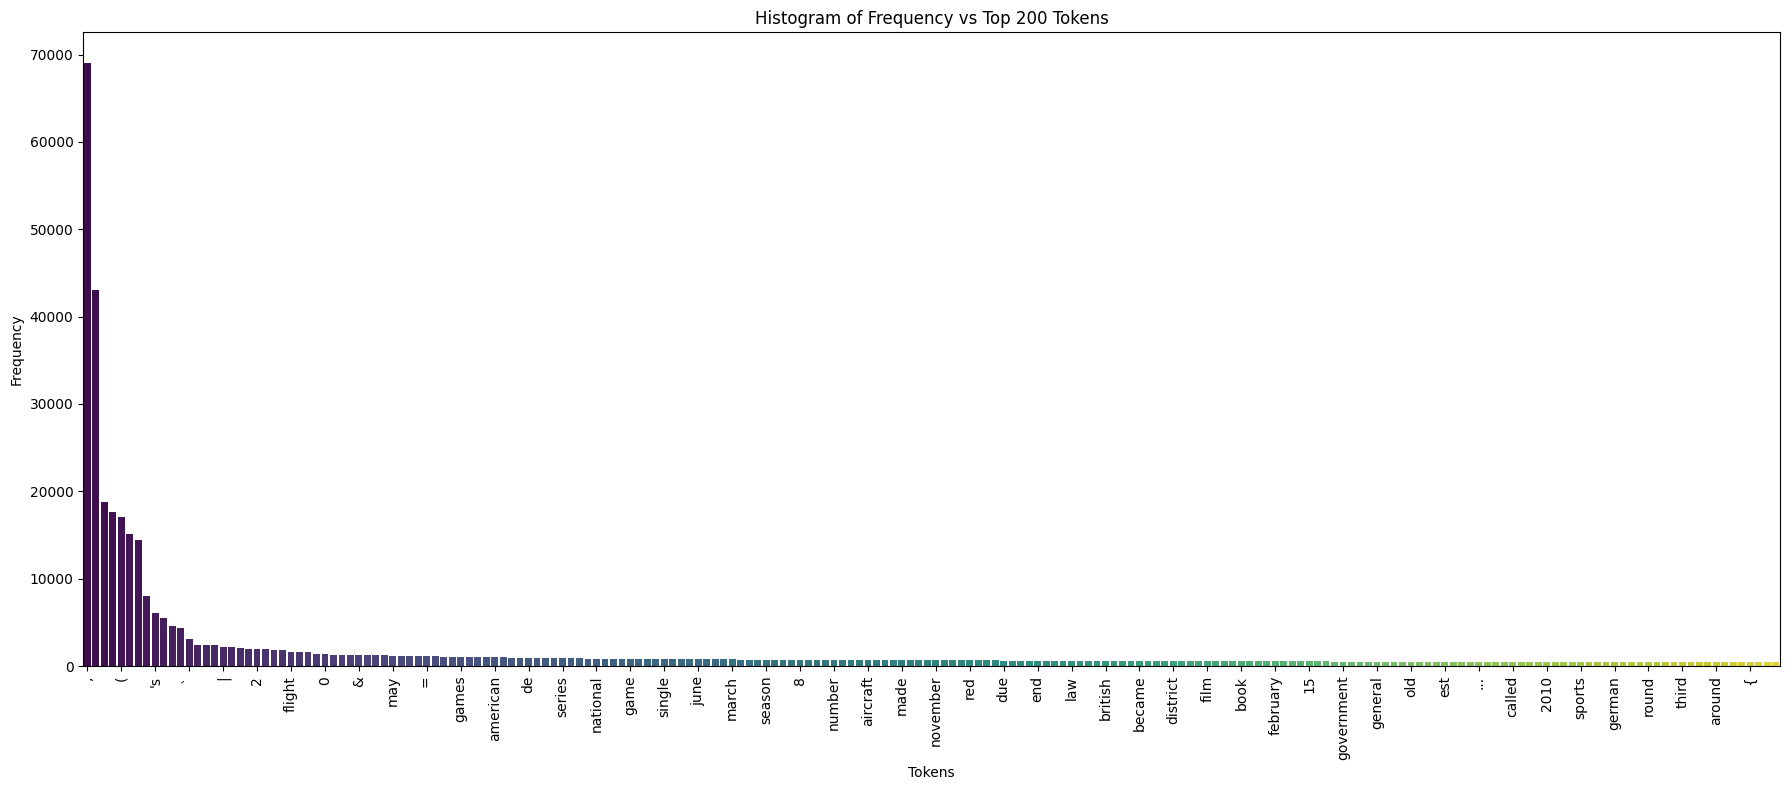

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_200_tokens = corpus_token_counts.most_common(200)

tokens = [token for token, count in top_200_tokens]
counts = [count for token, count in top_200_tokens]

plt.figure(figsize=(18, 8))
sns.barplot(x=tokens, y=counts, palette='viridis')
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.title("Histogram of Frequency vs Top 200 Tokens")
# Show every 4th token label for clarity in the plot
plt.xticks(range(0, len(tokens), 4), tokens[::4], rotation=90)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### 7.  Percentage of Punctuation Marks
What percentage of the total tokens are punctuation marks? What does this indicate about the nature of the text in the corpus?

In [ ]:
import string

total_tokens = len(all_corpus_tokens)
punctuation_tokens = [token for token in all_corpus_tokens if all(char in string.punctuation for char in token)]
punctuation_count = len(punctuation_tokens)
punctuation_percentage = (punctuation_count / total_tokens) * 100 if total_tokens > 0 else 0

print(f"Total number of tokens: {total_tokens}")
print(f"Number of punctuation tokens: {punctuation_count}")
print(f"Percentage of punctuation marks: {punctuation_percentage:.2f}%")

Total number of tokens: 982656
Number of punctuation tokens: 228345
Percentage of punctuation marks: 23.24%


### Interpretation of Punctuation Percentage




A punctuation percentage of 23% is significantly high and tells us that our corpus is not simple combination of alphabetical words. This means that they also play a important role in defining structure & meaning of sentences.

### 8. Normalized Frequency
Calculate normalized frequency of each token in the corpus. Normalized frequency is defined as frequency of a token in a document divided by its length.

In [ ]:
normalized_frequency = {
    token: (count / len(token) if len(token) > 0 else 0)
    for token, count in corpus_token_counts.items()
}
normalized_frequency = Counter(normalized_frequency)
for token,count in normalized_frequency.most_common(10):
  print(f"{token}: {count}")

,: 69084.0
.: 43014.0
*: 18823.0
): 17612.0
(: 17091.0
-: 15137.0
": 14483.0
:: 7973.0
–: 5482.0
 : 4569.0


### 9. Most frequent token based on normalized frequency
What is the most frequent token based on noramalized frequency?

In [ ]:
most_frequent_token = normalized_frequency.most_common(1)[0][0]
print(f"The most frequent token is: {most_frequent_token} with frequency {normalized_frequency.most_common(1)[0][1] } ")

The most frequent token is: , with frequency 69084.0 


### 10. Histogram of Normalized Frequency vs Tokens
Draw a histogram of normalized frequency vs tokens for top 200 tokens in the corpus.


/tmp/ipython-input-1276263305.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tokens), y=list(normalized_scores), palette='viridis_r')


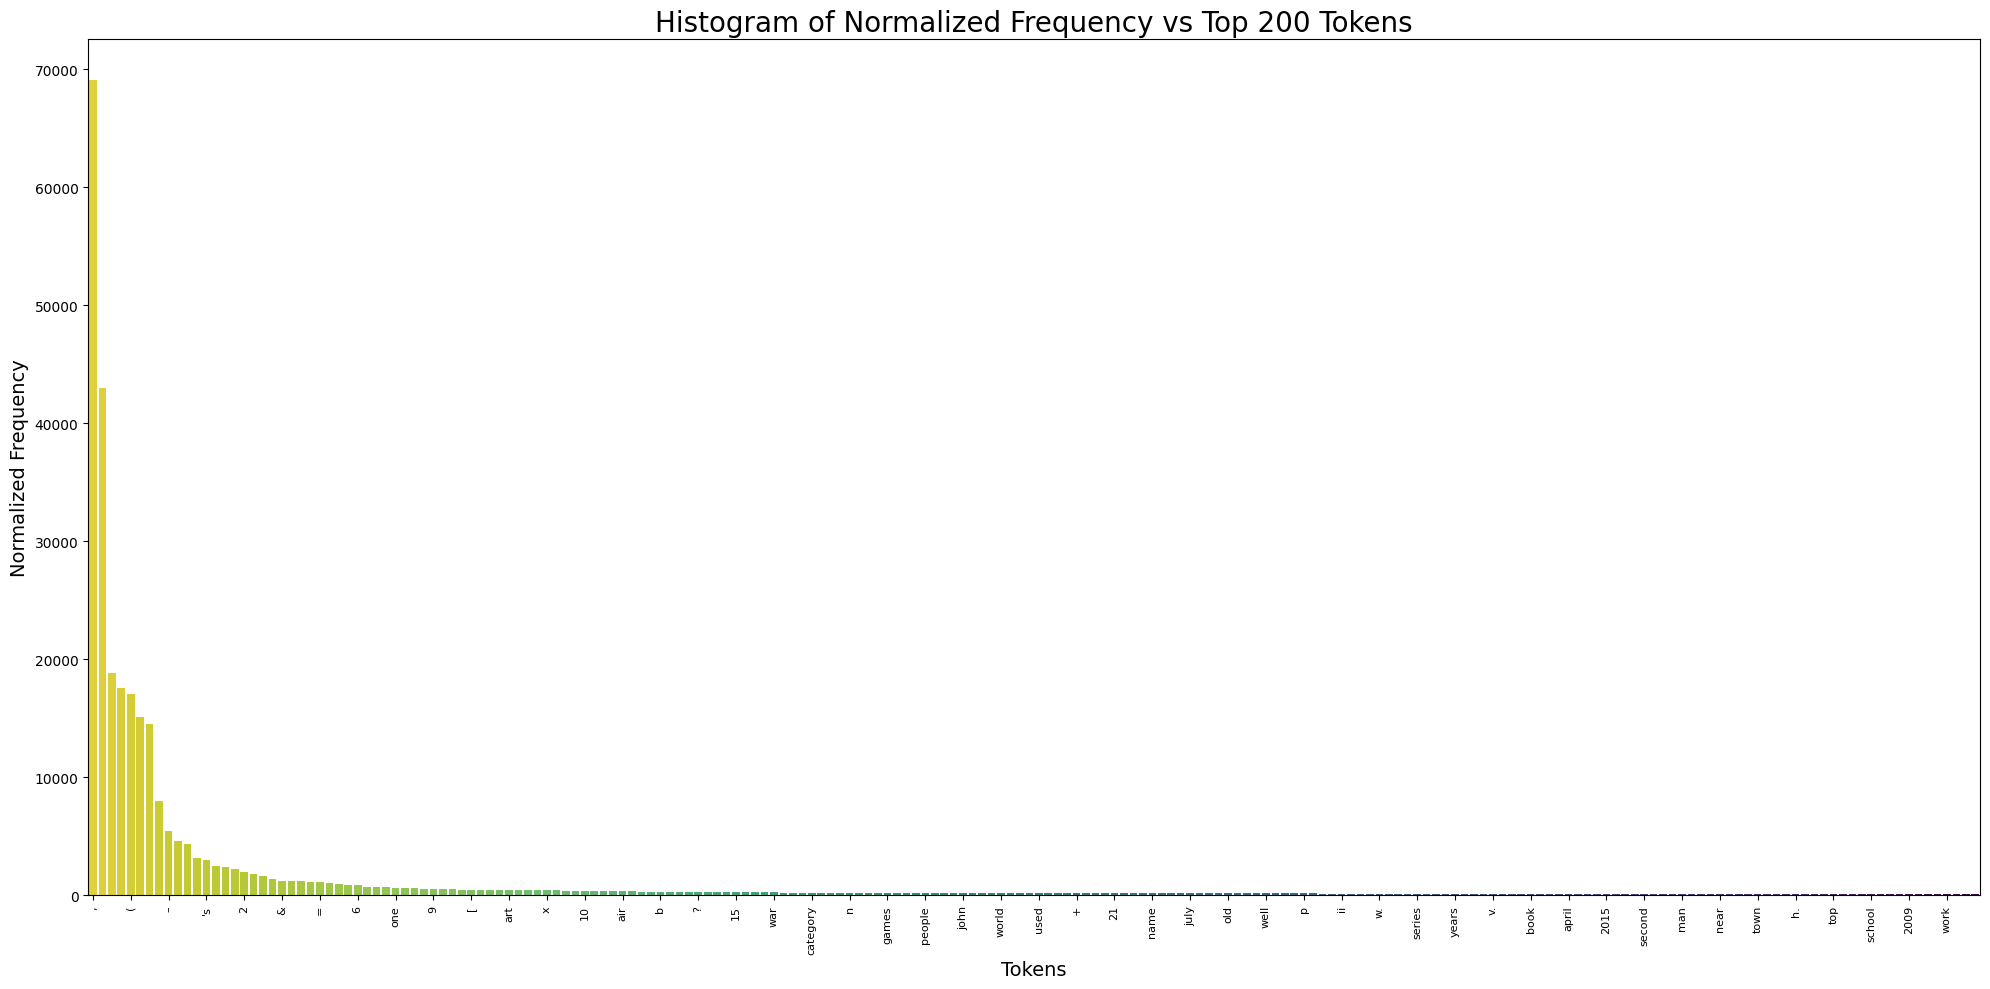

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Get the 200 most frequent tokens based on their normalized score
top_200_items = normalized_frequency.most_common(200)

if top_200_items:
    tokens, normalized_scores = zip(*top_200_items)
else:
    tokens, normalized_scores = [], []

plt.figure(figsize=(20, 10))

sns.barplot(x=list(tokens), y=list(normalized_scores), palette='viridis_r')

plt.xlabel("Tokens", fontsize=14)
plt.ylabel("Normalized Frequency", fontsize=14)
plt.title("Histogram of Normalized Frequency vs Top 200 Tokens", fontsize=20)


plt.xticks(range(0, len(tokens), 4), tokens[::4], rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

### 11. Comparison of Frequency and Normalized Frequency Histograms

Are the histogram plots of frequency and normalized frequency same? What do you observe? How do things change and why?

Ans : No the frequency and normalised frequency histograms are way differnt in terms of tokens  that come in top 200. But in both punctutations hold the top positions because one they have large count and another they have only 1 character length.

### Frequency Histogram
- **Description:**
In frquency histogram after punctutations we can observe that there are many common longer(4-5 char) english words that are more frequent in the text than any other lesser length words

### Normalized Frequency Histogram
- **Description:**
Here we observe that many smaller length words come on top when considering Normalised frequency because of the effect of length





### 12. Unigram Probability
**Unigram Probability of Token in Corpus:** Let's approximate  the probability of a token in a corpus by a unigram, i.e., probability of a token $w_{i}$ is given by:

$p(w_{i}) = \frac{C_{w_{i}}}{\sum_{j = 1}^{N} C_{w_{j}}}$

where, $C_{w_{i}}$ is the count of token $w_{i}$ in the entire corpus.

Calculate the probability of all tokens in the corpus and store in a suitable datastructure


Q: Is unigram a fair assumption?

A: No

Q:What is the problem of Unigram approach?

A: The biggest problem with the unigram approach is that it assumes every word is an independent event, completely unrelated to the words that come before or after it. It treats a sentence not as a structured sequence, but as a jumble of words where only individual frequency matters.

In [ ]:
from collections import Counter

total_tokens = sum(corpus_token_counts.values())

unigram_probabilities = {
    token: count / total_tokens
    for token, count in corpus_token_counts.items()
}

probability_counter = Counter(unigram_probabilities)

print("--- Most Common Tokens by Probability ---")
print(probability_counter.most_common(3))


--- Most Common Tokens by Probability ---
[(',', 0.07030334114888628), ('.', 0.043773202422821414), ('*', 0.01915522827927576)]


### 13. Probability of a Document
**Probability of a Document:** We can make I.I.D. (Indepedent and Identically Distributed) assumption over tokens present in the document and approximate the probability of a document $D$ having tokens $w^{(D)}_{1}, w^{(D)}_{2},\ldots, w^{(D)}_{L}$ as:

$p(D) = \prod_{i = 1}^{L} p(w^{(D)}_{i})$

**Tasks:**
- Pick up 10 documents at random and calculate the probability of each of them.
- What do you observe? (Hint: do you see any underflow or overflow problems?)
  - Answer: Yes we see underflow problem because multiplication of many proabablities in range (0 to 1) leads to all 0 values for each document.

In [ ]:
import random
import math
from collections import Counter

def calculate_doc_probability_product(document: str, probabilities: dict) -> float:
    tokens = document.lower().split()
    doc_prob = 1.0
    for token in tokens:
        token_prob = probabilities.get(token, 0)
        if token_prob == 0:
            return 0.0
        doc_prob *= token_prob
    return doc_prob

# Pick 10 documents at random
selected_documents = random.sample(dataset['text'], 10)

print("Calculating direct probabilities for 10 random documents:\n")

document_results = {}
for doc in selected_documents:
    prob = calculate_doc_probability_product(doc, unigram_probabilities)
    document_results[doc] = prob

# Print the results
for i,(doc, prob) in enumerate(document_results.items()) :
    print(f'Probability for Document {i}: {prob:.4e}\n')

Calculating direct probabilities for 10 random documents:

Probability for Document 0: 0.0000e+00

Probability for Document 1: 0.0000e+00

Probability for Document 2: 0.0000e+00

Probability for Document 3: 0.0000e+00

Probability for Document 4: 0.0000e+00

Probability for Document 5: 0.0000e+00

Probability for Document 6: 0.0000e+00

Probability for Document 7: 0.0000e+00

Probability for Document 8: 0.0000e+00

Probability for Document 9: 0.0000e+00



### 14. Log Probability of a Document
**Log Probability of a Document:** Calculate the log probability of the above selected 10 documents, i.e., $log\ p(D)$. What do you observe? Are results more interpretable than the previous method?

In [ ]:
import pandas as pd
import math
import random

def calculate_doc_log_probability_from_tokens(tokens: list, probabilities: dict) -> float:
    doc_log_prob = 0.0
    for token in tokens:
        token_prob = probabilities.get(token, 0)
        if token_prob == 0:
            return -math.inf
        doc_log_prob += math.log(token_prob)
    return doc_log_prob

random.seed(42)
random_indices = random.sample(range(len(dataset)), 10)

print(f"Calculating log probabilities for 10 random documents:\n")

for idx in random_indices:
    raw_text = dataset['text'][idx]
    list_of_tokens = tokenized_df.loc[idx, 'Tokens']
    log_prob = calculate_doc_log_probability_from_tokens(list_of_tokens, unigram_probabilities)
    print(f'Document (Index {idx})')
    print(f'Log Probability: {log_prob:.4f}\n')


Calculating log probabilities for 10 random documents:

Document (Index 57)
Log Probability: -26843.9327

Document (Index 12)
Log Probability: -54342.4404

Document (Index 140)
Log Probability: -16288.1047

Document (Index 125)
Log Probability: -18727.5672

Document (Index 114)
Log Probability: -19470.8339

Document (Index 71)
Log Probability: -18454.0328

Document (Index 52)
Log Probability: -24975.9154

Document (Index 44)
Log Probability: -21379.2114

Document (Index 216)
Log Probability: -40766.4555

Document (Index 16)
Log Probability: -18378.1823



### **Observations and Interpretation**

Well now the result become more interpretable than just multiplication hence multiplication of probabilites have to be done in the log format to prevent underflow . We can compare the probabilites of Documents among each other using this


## Step 5: Part-of-Speech (POS) Tagging [50 + 20 + 100 + 100 + 50 + 20 marks]

After tokenization, the next step is POS tagging, which involves labeling each token with its corresponding part of speech, such as noun, verb, adjective, etc. POS tagging is crucial for understanding the grammatical structure of the text. For example, knowing whether a word is a noun or a verb can provide insights into its role in the sentence.







### 1. POS Tagging for Each Token
Use spaCy to find out POS tag for each token in each document. NOTE POS tag will be only for a real token and not meta-information, so you might have to filter meta-info out when predicting POS tags.

In [ ]:
def get_pos_tags(text):
    doc = nlp(text)
    return [token.pos_ for token in doc]

def add_pos_tags(example):
    return {"pos_tags": get_pos_tags(example["text"])}

dataset = dataset.map(add_pos_tags)

print(dataset['pos_tags'][:5])

Map:   0%|          | 0/270 [00:00<?, ? examples/s]

[['PUNCT', 'PROPN', 'PROPN', 'ADV', 'PUNCT', 'AUX', 'DET', 'ADJ', 'NOUN', 'NOUN', 'ADP', 'DET', 'ADJ', 'ADJ', 'ADJ', 'NOUN', 'NOUN', 'NOUN', 'DET', 'PROPN', 'PROPN', 'PUNCT', 'PRON', 'VERB', 'ADP', 'PROPN', 'ADP', 'PROPN', 'NUM', 'PUNCT', 'NUM', 'PUNCT', 'DET', 'NOUN', 'AUX', 'VERB', 'ADP', 'PROPN', 'PROPN', 'PROPN', 'CCONJ', 'PROPN', 'PROPN', 'PUNCT', 'CCONJ', 'VERB', 'ADP', 'PROPN', 'PROPN', 'PUNCT', 'DET', 'NOUN', 'VERB', 'ADP', 'DET', 'VERB', 'NUM', 'PUNCT', 'NOUN', 'NOUN', 'NOUN', 'PUNCT', 'ADV', 'VERB', 'NOUN', 'VERB', 'ADP', 'DET', 'PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PROPN', 'PUNCT', 'CCONJ', 'PRON', 'NOUN', 'VERB', 'ADP', 'ADP', 'DET', 'NOUN', 'PART', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'ADV', 'ADP', 'DET', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'PUNCT', 'NOUN', 'VERB', 'DET', 'NOUN', 'VERB', 'PROPN', 'PART', 'NOUN', 'PUNCT', 'VERB', 'PROPN', 'PART', 'ADJ', 'NOUN', 'NOUN', 'CCONJ

### 2. Frequency of Each POS Tag and Histogram

Once you've tagged all the tokens, you can analyze the frequency of each POS tag across the corpus. Creating a histogram of POS tags will help visualize the distribution, showing which types of tags (e.g., nouns, verbs) are most common in the text.

POS Tag Frequencies:
 Counter({'PROPN': 285809, 'NOUN': 226579, 'PUNCT': 217030, 'ADP': 132470, 'DET': 94983, 'VERB': 94540, 'NUM': 76941, 'ADJ': 69190, 'PRON': 37615, 'AUX': 34603, 'CCONJ': 33511, 'ADV': 26228, 'PART': 18589, 'SCONJ': 12637, 'SYM': 3883, 'X': 2832, 'INTJ': 440})


/tmp/ipython-input-1211078189.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()), palette='viridis')


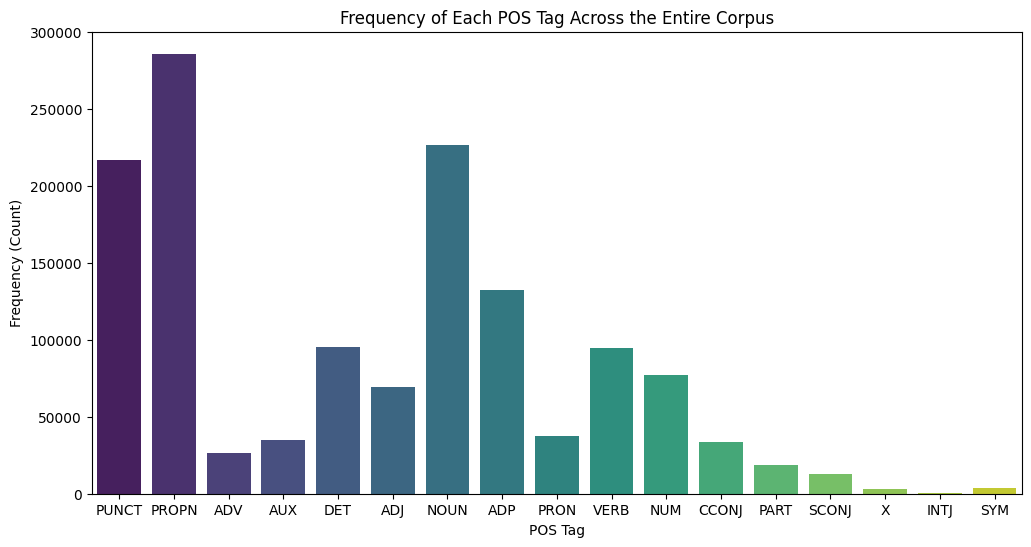

In [ ]:
import seaborn as sns
all_tags = [tag for tags_list in dataset['pos_tags'] for tag in tags_list]

tag_counts = Counter(all_tags)
print("POS Tag Frequencies:\n", tag_counts)

# corpus-wide POS tag frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()), palette='viridis')
plt.title('Frequency of Each POS Tag Across the Entire Corpus')
plt.xlabel('POS Tag')
plt.ylabel('Frequency (Count)')
plt.show()



### 3. Unigram Probability of POS Tags in a Document

**Unigram Probability of a POS Tag in a Document:** Let's approximately calculate the probability of a POS tag in a document. One way is to calculate unigram probability, i.e., consider set of POS tags = ${t_{1}, t_{2}, \ldots, t_{T}}$, then probability of a POS tag $t_{i}$ is given by:

$p(t_{i}) = \frac{C_{t_{i}}}{\sum_{k = 1}^{T} C_{t_{k}}}$

where $C_{t_{i}}$ is the count of POS tag $t_{i}$ in the entire document. Pick up 10 documents randomly and calculate the probability of each of the POS tag and plot the distribution in the form of a histogram.




--- Analyzing Document (Index 0) ---
POS Tag Probabilities: {'ADP': 0.1099106586328693, 'NOUN': 0.2175358404321629, 'PUNCT': 0.15603573654685227, 'DET': 0.07458965302306254, 'AUX': 0.028672345730313735, 'ADJ': 0.0928734676916684, 'VERB': 0.07874506544774569, 'CCONJ': 0.02991896945771868, 'PRON': 0.04051527114066071, 'PROPN': 0.07936837731144816, 'ADV': 0.0332432993974652, 'SCONJ': 0.01246623727404945, 'PART': 0.01641387907749844, 'NUM': 0.015582796592561812, 'SYM': 0.00415541242468315, 'X': 0.009557448576771245, 'INTJ': 0.00041554124246831497}


/tmp/ipython-input-3810895498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_probabilities.keys()), y=list(tag_probabilities.values()), palette='plasma')


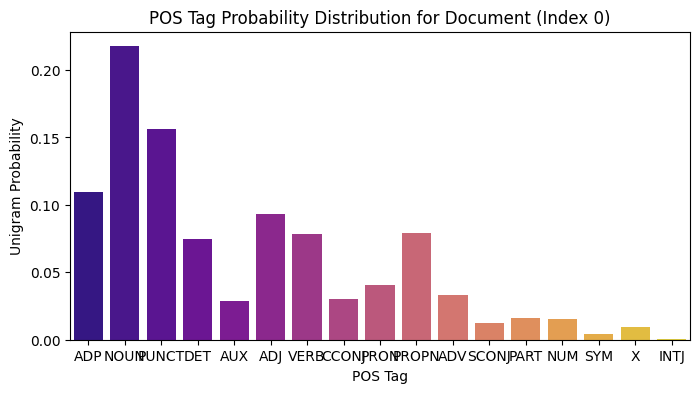


--- Analyzing Document (Index 1) ---
POS Tag Probabilities: {'ADP': 0.12677053824362605, 'DET': 0.08761634965600971, 'NOUN': 0.15611088628085795, 'PROPN': 0.1781667341157426, 'CCONJ': 0.02913800080938891, 'PUNCT': 0.11736139214892756, 'VERB': 0.08033184945366248, 'ADV': 0.03197086199919061, 'PRON': 0.03874949413193039, 'SYM': 0.0012140833670578712, 'ADJ': 0.05625252934034804, 'NUM': 0.042391744233104, 'SCONJ': 0.010117361392148928, 'PART': 0.017503035208417644, 'AUX': 0.025495750708215296, 'X': 0.0003035208417644678, 'INTJ': 0.0005058680696074464}


/tmp/ipython-input-3810895498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_probabilities.keys()), y=list(tag_probabilities.values()), palette='plasma')


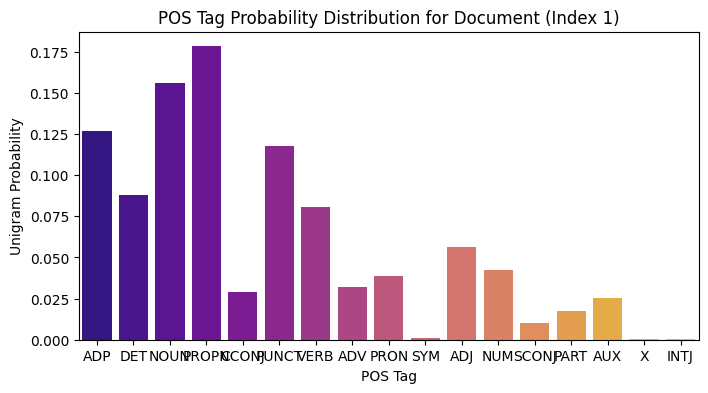


--- Analyzing Document (Index 2) ---
POS Tag Probabilities: {'DET': 0.04859423811176675, 'PROPN': 0.2998958694897605, 'PUNCT': 0.22457480041652203, 'AUX': 0.00971884762235335, 'NOUN': 0.09788267962513017, 'ADP': 0.06004859423811177, 'PRON': 0.012495661228740022, 'VERB': 0.04304061089899341, 'NUM': 0.08330440819160013, 'CCONJ': 0.02950364456785838, 'SCONJ': 0.04512322110378341, 'ADV': 0.012842762929538355, 'PART': 0.004512322110378341, 'ADJ': 0.025338424158278375, 'SYM': 0.0031239153071850054}


/tmp/ipython-input-3810895498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_probabilities.keys()), y=list(tag_probabilities.values()), palette='plasma')


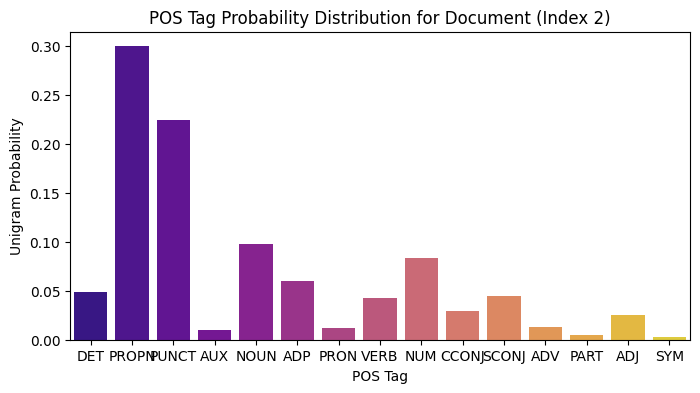


--- Analyzing Document (Index 3) ---
POS Tag Probabilities: {'PROPN': 0.26533742331288346, 'PUNCT': 0.13650306748466257, 'NUM': 0.04877300613496933, 'AUX': 0.022392638036809815, 'DET': 0.06165644171779141, 'ADJ': 0.04386503067484662, 'NOUN': 0.13282208588957056, 'ADP': 0.12269938650306748, 'VERB': 0.07822085889570553, 'PRON': 0.030368098159509204, 'CCONJ': 0.018404907975460124, 'PART': 0.015950920245398775, 'ADV': 0.015337423312883436, 'SCONJ': 0.006748466257668712, 'INTJ': 0.0006134969325153375, 'X': 0.00030674846625766873}


/tmp/ipython-input-3810895498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_probabilities.keys()), y=list(tag_probabilities.values()), palette='plasma')


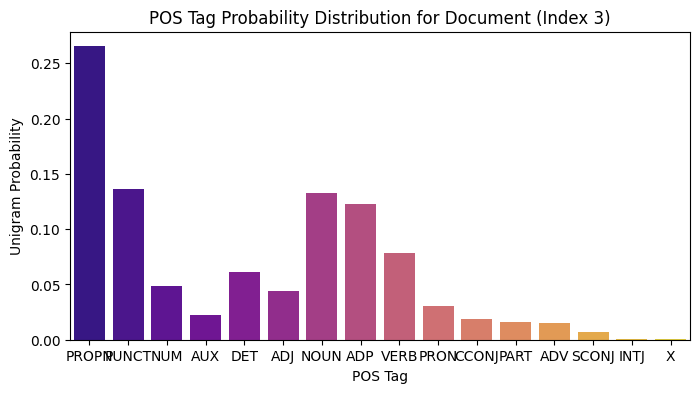


--- Analyzing Document (Index 4) ---
POS Tag Probabilities: {'PROPN': 0.2588050314465409, 'AUX': 0.020440251572327043, 'DET': 0.061635220125786164, 'NOUN': 0.1751572327044025, 'ADP': 0.1018867924528302, 'PUNCT': 0.1361635220125786, 'VERB': 0.059748427672955975, 'NUM': 0.04685534591194968, 'ADJ': 0.061635220125786164, 'PART': 0.009119496855345912, 'CCONJ': 0.0279874213836478, 'ADV': 0.016666666666666666, 'PRON': 0.016666666666666666, 'SCONJ': 0.0031446540880503146, 'INTJ': 0.00031446540880503143, 'X': 0.0006289308176100629, 'SYM': 0.0031446540880503146}


/tmp/ipython-input-3810895498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_probabilities.keys()), y=list(tag_probabilities.values()), palette='plasma')


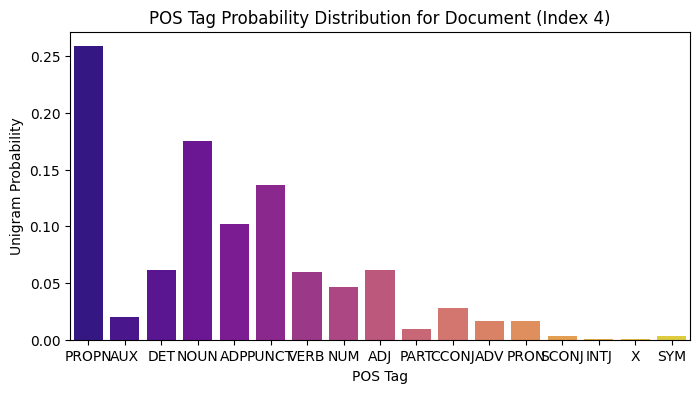


--- Analyzing Document (Index 5) ---
POS Tag Probabilities: {'DET': 0.09466493168510084, 'PROPN': 0.1480156148340924, 'PUNCT': 0.12849707221860768, 'AUX': 0.03155497722836695, 'NOUN': 0.1922576447625244, 'PRON': 0.02342225113858165, 'VERB': 0.07482108002602472, 'ADP': 0.09726740403383215, 'ADJ': 0.07644762524398178, 'PART': 0.0071567989590110605, 'NUM': 0.07026675341574495, 'ADV': 0.025048796356538713, 'CCONJ': 0.020494469746258945, 'SYM': 0.0029277813923227064, 'SCONJ': 0.0071567989590110605}


/tmp/ipython-input-3810895498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_probabilities.keys()), y=list(tag_probabilities.values()), palette='plasma')


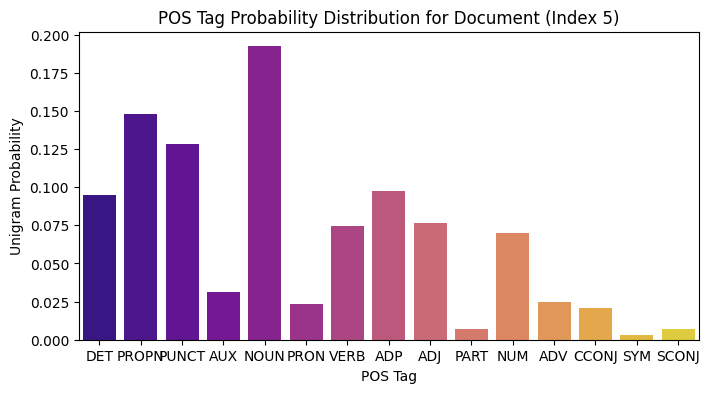


--- Analyzing Document (Index 6) ---
POS Tag Probabilities: {'DET': 0.07408278457196614, 'PROPN': 0.18579492003762935, 'ADP': 0.10677328316086547, 'PUNCT': 0.17309501411100658, 'AUX': 0.020460959548447788, 'ADJ': 0.06467544684854186, 'NOUN': 0.19637817497648166, 'ADV': 0.015522107243650047, 'NUM': 0.03951081843838194, 'VERB': 0.053621825023518345, 'CCONJ': 0.036923800564440265, 'PRON': 0.01904985888993415, 'SCONJ': 0.0035277516462841017, 'PART': 0.008466603951081843, 'SYM': 0.0009407337723424271, 'X': 0.0011759172154280338}


/tmp/ipython-input-3810895498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_probabilities.keys()), y=list(tag_probabilities.values()), palette='plasma')


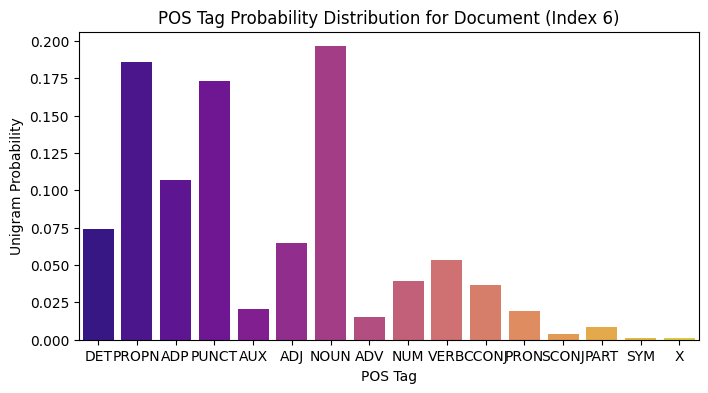


--- Analyzing Document (Index 7) ---
POS Tag Probabilities: {'ADJ': 0.04958283671036949, 'PUNCT': 0.13468414779499405, 'PROPN': 0.1535160905840286, 'AUX': 0.033134684147794996, 'DET': 0.08176400476758046, 'NOUN': 0.1396901072705602, 'PRON': 0.060786650774731825, 'ADP': 0.11179976162097735, 'ADV': 0.04266984505363528, 'VERB': 0.08939213349225268, 'NUM': 0.0133492252681764, 'CCONJ': 0.028843861740166864, 'PART': 0.035518474374255066, 'SCONJ': 0.025029797377830752, 'X': 0.00023837902264600716}


/tmp/ipython-input-3810895498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_probabilities.keys()), y=list(tag_probabilities.values()), palette='plasma')


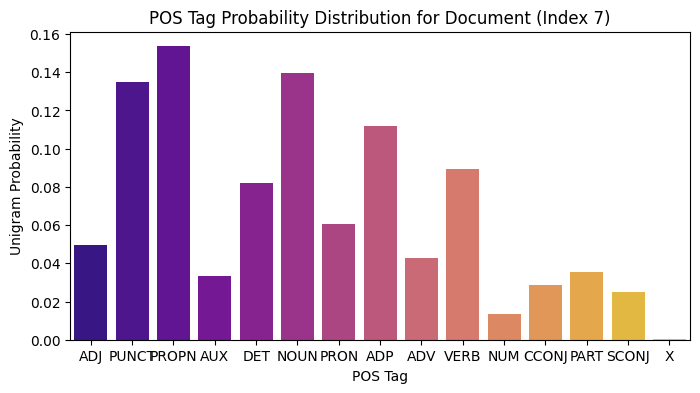


--- Analyzing Document (Index 8) ---
POS Tag Probabilities: {'DET': 0.1118134569462003, 'PROPN': 0.1941283888186543, 'AUX': 0.02430116589408625, 'ADJ': 0.06110408765276022, 'NOUN': 0.13316477033291194, 'VERB': 0.05590672847310015, 'ADP': 0.1064756285995224, 'CCONJ': 0.031886500913049586, 'PRON': 0.02753195673549656, 'PUNCT': 0.16842253125438966, 'PART': 0.01938474504846186, 'NUM': 0.03736479842674533, 'ADV': 0.019103806714426182, 'SCONJ': 0.007304396684927658, 'SYM': 0.001685630004214075, 'X': 0.00042140750105351877}


/tmp/ipython-input-3810895498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_probabilities.keys()), y=list(tag_probabilities.values()), palette='plasma')


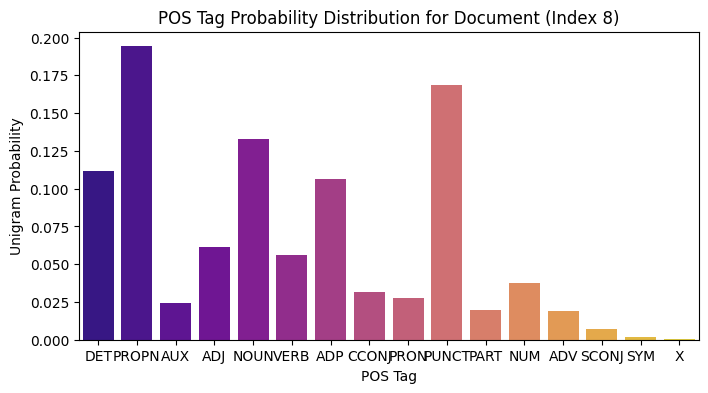


--- Analyzing Document (Index 9) ---
POS Tag Probabilities: {'PROPN': 0.24655172413793103, 'VERB': 0.06413793103448276, 'PUNCT': 0.17551724137931035, 'DET': 0.07, 'AUX': 0.022413793103448276, 'NOUN': 0.1579310344827586, 'CCONJ': 0.028275862068965516, 'ADP': 0.09172413793103448, 'ADJ': 0.03206896551724138, 'PART': 0.014137931034482758, 'ADV': 0.016206896551724137, 'PRON': 0.03310344827586207, 'SCONJ': 0.008275862068965517, 'NUM': 0.03, 'X': 0.00896551724137931, 'INTJ': 0.000689655172413793}


/tmp/ipython-input-3810895498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_probabilities.keys()), y=list(tag_probabilities.values()), palette='plasma')


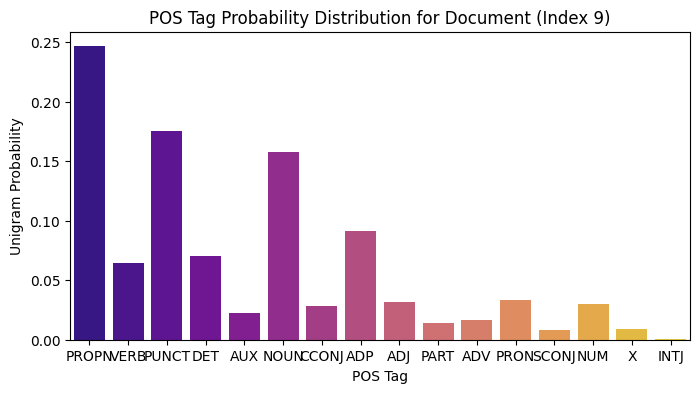

In [ ]:
import random
random.seed(42)
ind_selected_docs = random.sample(range(len(dataset)), 10)
selected_docs =  dataset.select(ind_selected_docs).to_pandas()

probabilities_list = []

for index, row in selected_docs.iterrows():
    doc_tags = row['pos_tags']

    total_tags_in_doc = len(doc_tags)
    tag_counts_in_doc = Counter(doc_tags)
    tag_probabilities = {tag: count / total_tags_in_doc for tag, count in tag_counts_in_doc.items()}
    probabilities_list.append(tag_probabilities)
    print(f"\n--- Analyzing Document (Index {index}) ---")
    print("POS Tag Probabilities:", tag_probabilities)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(tag_probabilities.keys()), y=list(tag_probabilities.values()), palette='plasma')
    plt.title(f'POS Tag Probability Distribution for Document (Index {index})')
    plt.xlabel('POS Tag')
    plt.ylabel('Unigram Probability')
    plt.show()

selected_docs.loc[:, 'probabilities'] = probabilities_list

# print(selected_docs[['text', 'probabilities']].head())

### 4. Entropy of POS Tag Distribution

**Entropy Of POS Tag Distribution in a Document:** Calculate the entropy of the POS tags distirbution for each of the selected documents above. Entropy of a discrete distribution is given by:

$H(p) = - \sum_{i=1}^{N} p_{i} log p_{i}$

where the distribution $p$ has non-zero support at $N$ points.

In [ ]:
for index, row in selected_docs.iterrows():
    doc_text = row['text']

    tag_probabilities = row['probabilities']

    entropy = -sum(p * math.log2(p) for p in tag_probabilities.values() if p > 0)

    print(f"\n--- Document (Index {index})")
    print(f"Entropy of POS Tag Distribution: {entropy:.4f} bits")


--- Document (Index 0)
Entropy of POS Tag Distribution: 3.4441 bits

--- Document (Index 1)
Entropy of POS Tag Distribution: 3.4432 bits

--- Document (Index 2)
Entropy of POS Tag Distribution: 3.0547 bits

--- Document (Index 3)
Entropy of POS Tag Distribution: 3.2324 bits

--- Document (Index 4)
Entropy of POS Tag Distribution: 3.1981 bits

--- Document (Index 5)
Entropy of POS Tag Distribution: 3.3863 bits

--- Document (Index 6)
Entropy of POS Tag Distribution: 3.2397 bits

--- Document (Index 7)
Entropy of POS Tag Distribution: 3.5167 bits

--- Document (Index 8)
Entropy of POS Tag Distribution: 3.3559 bits

--- Document (Index 9)
Entropy of POS Tag Distribution: 3.2487 bits


### 5. Observations
Do you observe any correlation between distribution of POS tags and article categories? Do certain type of articles have more well distributed POS tags or have a peaky POS tag distribution? Can you relate this to the Entropy of the disribution? Describe your findings and observations.


Ans: Some articles have a more even distribution of POS tags, while others show a peaky distribution with certain tags dominating. This relates directly to entropy: articles with well-distributed POS tags have higher entropy, indicating more variety and less predictability, whereas articles with peaky distributions have lower entropy, reflecting repetitive or predictable POS patterns.

### 6. Unigram Assumption Validity

In the probability calcualation for POS tag we made a unigram assumption but is it correct? What should have been a more valid formulation? How does it effect the answer to the previous question?

No it's not correct because we are assuming the independence of POS tags wherever they appear in the document.Rather we should have modelled it's probability according to other neighbouring POS tags because certain POS come together often like because Grammar is fundamentally about sequence and relationships, which the unigram model completely ignores.

## Step 6: Building a Dictionary of Words to POS Tags [100 + 100 + 100 + 20 + 20 marks]


Now that you have both tokens and their corresponding POS tags, the next step is to build a dictionary that maps each word to the set of POS tags it appears with in the text. This dictionary is useful for analyzing the versatility of words—some words can serve in multiple grammatical functions, depending on the context.

After building this dictionary, you can identify the words with the most varied POS tags. These are typically words that are highly versatile, such as "run," which can be both a noun ("a long run") and a verb ("I run every day"). Conversely, some words have only one POS tag and are less flexible in their usage. Identifying these can also be insightful.

1. Calculate the Unigram POS Tag probabilities but at corpus level (NOT at document level as done above).
2. For each token find out the probability distribution of POS tags.
3. Calculate the POS tag entropy for each token.
4. Find out the token with highest entropy; what could be the possible reason for such high entropy?
5. Find out the token with lowest entropy; what could be the possible reason for such low entropy?


### Building the Dictionary

### Words with Most and Least Varied POS Tags

### 1. Calculate Unigram POS Tag Probabilities at Corpus Level
Calculate the Unigram POS Tag probabilities but at corpus level (NOT at document level as done above).

In [ ]:
all_tags = [tag for tags_list in dataset['pos_tags'] for tag in tags_list]

tag_counts = Counter(all_tags)
print(f"POS Tag Frequencies (Counts):\n{tag_counts}\n")

total_tags = len(all_tags)
print(f"Total number of tags in the corpus: {total_tags}\n")

pos_tag_probabilities = {tag: count / total_tags for tag, count in tag_counts.items()}

sorted_probs = sorted(pos_tag_probabilities.items(), key=lambda item: item[1], reverse=True)

print("--- Top 10 Most Probable POS Tags ---")
for tag, probability in sorted_probs[:10]:
    print(f"{tag:<10}: {probability:.4f}")



POS Tag Frequencies (Counts):
Counter({'PROPN': 285809, 'NOUN': 226579, 'PUNCT': 217030, 'ADP': 132470, 'DET': 94983, 'VERB': 94540, 'NUM': 76941, 'ADJ': 69190, 'PRON': 37615, 'AUX': 34603, 'CCONJ': 33511, 'ADV': 26228, 'PART': 18589, 'SCONJ': 12637, 'SYM': 3883, 'X': 2832, 'INTJ': 440})

Total number of tags in the corpus: 1367880

--- Top 10 Most Probable POS Tags ---
PROPN     : 0.2089
NOUN      : 0.1656
PUNCT     : 0.1587
ADP       : 0.0968
DET       : 0.0694
VERB      : 0.0691
NUM       : 0.0562
ADJ       : 0.0506
PRON      : 0.0275
AUX       : 0.0253


### 2. Calculate Probability Distribution of POS Tags for Each Token
For each token find out the probability distribution of POS tags.

In [ ]:

def get_token_pos_pairs(text):
    doc = nlp(text)
    return [(token.text.lower(), token.pos_) for token in doc]

all_token_tag_pairs = []
for text in dataset['text'][:10]:
    all_token_tag_pairs.extend(get_token_pos_pairs(text))

all_tokens = [token for token, tag in all_token_tag_pairs]
token_total_counts = Counter(all_tokens)

token_tag_pair_counts = Counter(all_token_tag_pairs)

token_pos_probabilities = {}
for token, total_count in token_total_counts.items():
    token_pos_probabilities[token] = {}

    # Find all (token, tag) pairs that match the current token
    for (t, tag), count in token_tag_pair_counts.items():
        if t == token:
            # P(tag|token) = count(token, tag) / total_count(token)
            probability = count / total_count
            token_pos_probabilities[token][tag] = probability

print("--- POS Tag Probability Distribution per Token for some tokens ---")
for token, prob_dist in (sorted(token_pos_probabilities.items()))[20:40]:
    print(f"\nToken: '{token}' (Total occurrences: {token_total_counts[token]})")
    for tag, probability in prob_dist.items():
        print(f"  - P({tag} | '{token}') = {probability:.2f}")


--- POS Tag Probability Distribution per Token for some tokens ---

Token: '*' (Total occurrences: 971)
  - P(PUNCT | '*') = 0.97
  - P(PROPN | '*') = 0.01
  - P(NUM | '*') = 0.01
  - P(NOUN | '*') = 0.01
  - P(X | '*') = 0.00
  - P(SYM | '*') = 0.00

Token: ',' (Total occurrences: 1616)
  - P(PUNCT | ',') = 1.00

Token: '-' (Total occurrences: 347)
  - P(ADJ | '-') = 0.03
  - P(PUNCT | '-') = 0.91
  - P(VERB | '-') = 0.01
  - P(NOUN | '-') = 0.03
  - P(SYM | '-') = 0.01
  - P(PROPN | '-') = 0.01

Token: '-extent' (Total occurrences: 1)
  - P(NOUN | '-extent') = 1.00

Token: '-with' (Total occurrences: 1)
  - P(ADP | '-with') = 1.00

Token: '.' (Total occurrences: 1471)
  - P(PUNCT | '.') = 0.99
  - P(X | '.') = 0.00
  - P(PROPN | '.') = 0.01
  - P(NOUN | '.') = 0.00

Token: '...' (Total occurrences: 11)
  - P(PUNCT | '...') = 1.00

Token: '/' (Total occurrences: 12)
  - P(SYM | '/') = 0.92
  - P(PUNCT | '/') = 0.08

Token: '0' (Total occurrences: 1)
  - P(NUM | '0') = 1.00

Token: '00

### 3. Calculate POS Tag Entropy for Each Token
Calculate the POS tag entropy for each token

In [ ]:

token_entropies = {}

def calculate_entropy(probabilities):
    if len(probabilities) <= 1:
        return 0.0

    # H = -sum(p * log2(p))
    entropy = -sum(p * np.log2(p) for p in probabilities.values() if p > 0)
    return entropy

for token, probs in token_pos_probabilities.items():
    token_entropies[token] = calculate_entropy(probs)


print("--- POS Tag Entropy for Each Token ---")
for token, entropy in sorted(token_entropies.items(), key=lambda item: item[1], reverse=True)[:40]:
    print(f"{token:<10}: {entropy:.4f}")

--- POS Tag Entropy for Each Token ---
des       : 1.9679
2nd       : 1.8424
x         : 1.7925
'         : 1.7135
post      : 1.6282
overall   : 1.6235
headnote  : 1.5850
guardian  : 1.5850
fall      : 1.5850
17th      : 1.5850
past      : 1.5710
chase     : 1.5710
24th      : 1.5567
und       : 1.5546
=         : 1.5500
both      : 1.5462
tenth     : 1.5222
no        : 1.5221
close     : 1.5219
solo      : 1.5219
tvm       : 1.5219
sound     : 1.5000
long      : 1.5000
double    : 1.5000
pass      : 1.5000
limited   : 1.5000
comicgate : 1.5000
dem       : 1.5000
contest   : 1.5000
chief     : 1.5000
26th      : 1.5000
14th      : 1.5000
12th      : 1.4949
cycling   : 1.4949
all       : 1.4612
field     : 1.4591
chasing   : 1.4591
du        : 1.4591
primary   : 1.4566
free      : 1.4056


### 4,5. Token with the Highest and Lowest Entropy

4. Find out the token with highest entropy; what could be the possible reason for such high entropy?
5. Find out the token with lowest entropy; what could be the possible reason for such low entropy?



In [ ]:

highest_entropy_token = max(token_entropies, key=token_entropies.get)
max_entropy_value = token_entropies[highest_entropy_token]

min_entropy_value = min(token_entropies.values())
lowest_entropy_tokens = [
    token for token, entropy in token_entropies.items()
    if entropy == min_entropy_value
]

print("--- Entropy Analysis Results ---")

print(f"Token: '{highest_entropy_token}'")
print(f"Entropy: {max_entropy_value:.4f}")
print("Reason: This token has the highest grammatical ambiguity in the text and hence the high entropy.\n")

print(f"Tokens: {', '.join(lowest_entropy_tokens[4:10])}")
print(f"Entropy: {min_entropy_value:.4f}")
print("Reason: These are smoe of the that tokens are grammatically predictable, each having only one role to play in a sentence.")

--- Entropy Analysis Results ---
Token: 'des'
Entropy: 1.9679
Reason: This token has the highest grammatical ambiguity in the text and hence the high entropy.

Tokens: amc, october, 11, 2015, episode, written
Entropy: 0.0000
Reason: These are smoe of the that tokens are grammatically predictable, each having only one role to play in a sentence.


### 4,5 Interpretation:


We can easily observe that Higher entropy means a evenly distribution of a token on quite a few POS tags while low entroy means they can be assigned very few unique POS tags. We were able to see that number of words haing lower entropy is far more than higher entropy meaning most of the words have quite determined parts in english language but those which have high entory makes  the english languge changeable over time.

## Step 7: Named Entity Recognition (NER) [ 50 + 100 + 100 + 20 + 20 marks]

NER is a process where you identify and classify named entities within the text, such as people, locations, organizations, dates, and more. spaCy provides pre-trained models that can recognize these entities with high accuracy.

Once you’ve extracted the named entities, you can analyze the distribution of different types of entities. For instance, you might find that locations are mentioned more frequently than organizations, or that dates are a common entity type in your text. Visualizing this data with a histogram can provide a clear picture of what types of entities dominate the corpus.

1. Using spaCy predict the NER tag for each token in each document.
2. Calculate Corpus-wide Unigram NER Tag Probability distribution.
3. Calculate the NER entropy of each document.
4. Which type of documents have the highest NER entropy? What could be the possible reason for this.
5. Which type of documents have the lowest NER entropy? What could be the possible reason for this.

### 1. Using spaCy to Predict NER Tags for Each Token

In [ ]:
selected_documents_slice = dataset.select(range(10))
selected_documents_slice
corpus_ner_data = []

for doc_id, document in enumerate(selected_documents_slice, start=1):
    text = document['text']

    print(f"\n--- Processing Document (Row Number): {doc_id} ---")
    doc = nlp(text)
    doc_token_data = []

    for token in doc:
        # Get the entity type and IOB tag
        ent_type = token.ent_type_
        iob_tag = token.ent_iob_
        display_ent_type = ent_type if ent_type else "N/A"
        doc_token_data.append({
            'text': token.text,
            'iob_tag': iob_tag,
            'ent_type': ent_type
        })

    corpus_ner_data.append({
        'doc_id': doc_id,
        'tokens': doc_token_data
    })

print(f"\n Successfully processed {len(corpus_ner_data)} documents.")


--- Processing Document (Row Number): 1 ---

--- Processing Document (Row Number): 2 ---

--- Processing Document (Row Number): 3 ---

--- Processing Document (Row Number): 4 ---

--- Processing Document (Row Number): 5 ---

--- Processing Document (Row Number): 6 ---

--- Processing Document (Row Number): 7 ---

--- Processing Document (Row Number): 8 ---

--- Processing Document (Row Number): 9 ---

--- Processing Document (Row Number): 10 ---

 Successfully processed 10 documents.


### 2. Calculate Corpus-wide Unigram NER Tag Probability Distribution

In [ ]:
import collections


all_ner_tags = []
for doc_data in corpus_ner_data:
    for token_data in doc_data['tokens']:
        tag = token_data['ent_type']
        # We replace empty strings with 'O' (Outside) for clarity in the distribution
        if tag == "":
            all_ner_tags.append('O')
        else:
            all_ner_tags.append(tag)

if not all_ner_tags:
    print("No NER tags were found in the processed documents.")
else:
    tag_counts = collections.Counter(all_ner_tags)
    total_token_count = len(all_ner_tags)
    tag_probabilities = {tag: count / total_token_count for tag, count in tag_counts.items()}
    sorted_tag_probabilities = sorted(tag_probabilities.items(), key=lambda item: item[1], reverse=True)
    print("Corpus-wide Unigram NER Tag Probability Distribution")
    print("-" * 60)
    print(f"{'NER Tag':<15} | {'Count':<15} | {'Probability':<20}")
    print("-" * 60)

    for tag, probability in sorted_tag_probabilities:
        count = tag_counts[tag]
        print(f"{tag:<15} | {count:<15} | {probability:<20.6f}")

    print("-" * 60)
    print(f"{'Total Tokens':<15} | {total_token_count:<15} |")
    print("-" * 60)

Corpus-wide Unigram NER Tag Probability Distribution
------------------------------------------------------------
NER Tag         | Count           | Probability         
------------------------------------------------------------
O               | 38769           | 0.693294            
ORG             | 8158            | 0.145887            
DATE            | 2610            | 0.046674            
PERSON          | 2313            | 0.041363            
GPE             | 870             | 0.015558            
CARDINAL        | 634             | 0.011338            
ORDINAL         | 546             | 0.009764            
FAC             | 463             | 0.008280            
WORK_OF_ART     | 345             | 0.006170            
NORP            | 294             | 0.005258            
TIME            | 215             | 0.003845            
LOC             | 192             | 0.003433            
EVENT           | 131             | 0.002343            
QUANTITY        | 99       

### 3. Calculate the NER Entropy of Each Document

In [ ]:
import collections
import math

document_entropies = []

for doc_data in corpus_ner_data:
    doc_id = doc_data['doc_id']

    doc_tags = [token['ent_type'] if token['ent_type'] != "" else 'O' for token in doc_data['tokens']]
    # Handle documents with fewer than 2 tokens, as their entropy is 0
    if len(doc_tags) < 2:
        document_entropies.append({
            'doc_id': doc_id,
            'entropy': 0.0,
            'unique_tags': len(set(doc_tags)),
            'total_tokens': len(doc_tags)
        })
        continue

    tag_counts = collections.Counter(doc_tags)
    total_tokens_in_doc = len(doc_tags)
    tag_probabilities = {tag: count / total_tokens_in_doc for tag, count in tag_counts.items()}

    entropy = 0.0
    for p in tag_probabilities.values():
        if p > 0: # avoiding the error for log(0)
            entropy -= p * math.log2(p)

    document_entropies.append({
        'doc_id': doc_id,
        'entropy': entropy,
        'unique_tags': len(tag_counts),
        'total_tokens': total_tokens_in_doc
    })

sorted_entropies = sorted(document_entropies, key=lambda x: x['entropy'], reverse=True)

print("NER Entropy for Each Document")
print("-" * 70)
print(f"{'Doc ID':<10} | {'NER Entropy':<15} | {'Unique Tags':<15} | {'Total Tokens':<15}")
print("-" * 70)

for result in sorted_entropies:
    print(f"{result['doc_id']:<10} | {result['entropy']:<15.4f} | {result['unique_tags']:<15} | {result['total_tokens']:<15}")

print("-" * 70)


NER Entropy for Each Document
----------------------------------------------------------------------
Doc ID     | NER Entropy     | Unique Tags     | Total Tokens   
----------------------------------------------------------------------
9          | 2.1020          | 13              | 2358           
6          | 1.7969          | 15              | 2952           
10         | 1.7528          | 18              | 4077           
8          | 1.6166          | 17              | 14543          
4          | 1.5618          | 13              | 11305          
7          | 1.5308          | 15              | 3187           
5          | 1.4033          | 15              | 3365           
3          | 1.0092          | 15              | 6282           
2          | 0.9820          | 12              | 4770           
1          | 0.9075          | 15              | 3081           
----------------------------------------------------------------------


### 4. Documents with the Highest NER Entropy

In [ ]:
highest_entropy_docs = sorted_entropies[:1]
for doc in highest_entropy_docs:
    print(f"The Highest NER Entroy Documents is for Doc Number {doc['doc_id']} and NER Entropy is {doc['entropy']:.4f}")


The Highest NER Entroy Documents is for Doc Number 9 and NER Entropy is 2.1020


### 5. Documents with the Lowest NER Entropy

In [ ]:
N = 10
lowest_entropy_docs = sorted_entropies[-N:]
lowest_entropy_docs.reverse()
for doc in lowest_entropy_docs[:1]:
    print(f"The Lowest NER Entroy Documents is for Doc Number {doc['doc_id']} and NER Entropy is {doc['entropy']:.4f}")


The Lowest NER Entroy Documents is for Doc Number 1 and NER Entropy is 0.9075


### 4,5. Interpretation:



Lower Entropy of Document 1 here represents that  NER model is highly confident about the entity labels in it. Most words are clearly recognized and predicted with high probability for specific entity classes, leading to low uncertainty.

While higher Entropy for Documnet 9 here represnets that the NER model is very uncertain about the named entities. The predicted probabilities for different entity labels are more evenly spread

# **Question 4 : N-Gram models**

Language models are statistical models that give out the probability distribution of a sentence (sequence of tokens). They rely on the joint probability distribution of the tokens in the sentence.

For example, let us calculate the probability of the sentence "Monza is a fast track on the F1 GP". Then the probability of the sentence is given as:
$$
P = P(\text{<s>Monza is a fast track on the F1 GP</s>})
$$
Where `<s>` and `</s>` are predefined start and end tokens respectively.

We can then divide the sentence into tokens and use the chain rule of probability to make the calculations easier.
$$
P = P(\text{Monza|<s>}).P(\text{is|<s>Monza}).P(\text{a|<s>Monza is}).P(\text{fast|<s>Monza is a}) ... .P(\text{</s>|<s>Monza is a fast track on the F1 GP})
$$

Learning the joint probability distirbution is much more difficult and hence usually we have Markov Assumption (https://en.wikipedia.org/wiki/Discrete-time_Markov_chain). The main idea is the current token only depend on the previous token and you can ignore the history before the previous token. Given the Markov Assumption, we have:

$$
P(\text{is|<s>Monza}) = P(\text{is|Monza}) \\
P(\text{a|<s>Monza is}) = P(\text{a|is}) \\
P(\text{fast|<s>Monza is a}) = P(\text{fast|a}) \\
... \\
P(\text{</s>|<s>Monza is a fast track on the F1 GP}) = P(\text{</s>|GP})
$$

Hence, we can write the probability of the complete sentence as

$$
P(\text{<s>Monza is a fast track on the F1 GP</s>}) = \\P(\text{Monza|<s>}).P(\text{is|Monza}).P(\text{a|is})...P(\text{</s>|GP})
$$

Above we made 1st order Markov Assumption, giving us a **BiGram Language Model**. Similarly, we can make $(n-1)^{st}$ order Markov assumption, giving us  **n-gram Language Model**

In general using n-gram model, the probability of a sentence $s$ is given as:
$$
P(s) = \prod{P(w_n|w_{1} w_{2} w_{3} w_{4} ... w_{n-1})}
$$

Can you think and write down the sentence probability  expression for a unigram model?

#### Reading Materials
N-gram language models refer to language models that work on n-tokens simultaneously. Here are some reading resources to learn about n-gram language models:
- https://web.stanford.edu/~jurafsky/slp3/3.pdf
- https://web.cs.hacettepe.edu.tr/~ilyas/Courses/CMP711/lec03-LanguageModels.pdf

-----------------------------






## **Question 4: N-Gram models**

**TASK**: We aim to create a n-gram model using POS tags of each input text sequence. Then we predict the probability of a new sentence based on its POS tags.

**OBJECTIVE**: Learn to build unigram, bigram and trigram language models. Usually this method is applied to sequence of words, but here we want a n-gram language model built on the POS tag sequence. In particular, we will be developing POS n-gram model for Wikipedia corpus.

We will be using the same wikipedia corpus as in the previous question, hence we can reuse some of the things from the previous question.

#### Instructions:
This code is similar to Question 1 and 2 where we will develop multiple functions individually and connect them to each other using the `main` function at the end of the question.

In [ ]:
from huggingface_hub import hf_hub_download
import pandas as pd
from datasets import load_dataset, Dataset

def load_data():
    """
    Loading the data from huggingface

    Returns: a dataframe containing the text from wikipedia mini corpus.
    (Follow the huggingface links)
    """

    # Download the Parquet file
    dataset = load_dataset("Exploration-Lab/CS779-Fall25", "default", token=hf_token, split="train")
    test_dataset = load_dataset("Exploration-Lab/CS779-Fall25", "default", token=hf_token, split="test")
    dataset = dataset.to_pandas()
    test_dataset = test_dataset.to_pandas()
    dataset = dataset.sample(frac=0.01, random_state=42)
    test_dataset = test_dataset.sample(frac=0.01, random_state=42)
    # dataset = Dataset.from_pandas(dataset)
    # dataset = pd.DataFrame(dataset)
    return dataset,test_dataset
dataset ,test_dataset= load_data()

In [ ]:
dataset

,text
5312,"""First Time Again"" is the sixth season premier..."
18357,This is a list of decisions and opinions of th...
6428,Piper Halliwell is a fictional character from ...
15414,This list of NHS trusts in England provides de...
10610,Fort Wellington National Historic Site is a hi...
...,...
23463,Mask Singer is a French reality television ser...
26866,The Nùng Autonomous Territory (French: Territo...
13492,"Secoya (also Sieko Coca, Paicoca, Airo Pãi) is..."
20634,List of civil aircraft is a list of articles o...


## Step-1: POS Tag Sequence:
Using spaCy predict POS tag for each token in every document in the corpus.




In [ ]:
import spacy
from tqdm import tqdm
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
def get_pos_tag(df):
    pos_sequences = []
    for doc in tqdm(nlp.pipe(df['text'], batch_size=50), total=len(df)):
        pos_sequences.append([token.pos_ for token in doc if not token.is_space])
    print("POS tagging complete.")
    return pos_sequences
pos_tag_sequences = get_pos_tag(dataset)

100%|██████████| 270/270 [02:17<00:00,  1.96it/s]

POS tagging complete.


## Step-2: POS Tag Unigram, Bigram and Trigram Probabilities: **[500 + 50 + 20 + 60 + 10 + 20 marks]**

Compute unigram, bigram and trigram probabilities.
1. Have pass over the corpus collecting and updating unigram, bigram and trigram counts. Using counts calculate unigram, bigram and trigram probabilities. For example, bigram probability is given by:

$p(w_{i+1} = t \mid w_{i} = t^{'}) = \frac{C(w_{i+1} = t, w_{i} = t^{'})}{\sum_{k \in V} C(w_{i+1} = k, w_{i} = t^{'})}$

Here, $V$ is the vocabulary of POS tags and $C(w_{i+1} = t, w_{i} = t^{'})$ is the count of $(t, t^{'})$ co-occurring together.

2. Can you prove the above probability formula for bigram and similarly prove the probability formula for tri-gram.

3. Find the most frequent unigrams, bigrams and trigrams
4. Plot the bar charts of the 10 most frequent unigrams, bigrams and trigrams
5. Do you observe any interesting patterns in the plots?
6. Do you see any repeated tags in unigram, bigram trigram frequencies? If so, then what do you make of it?



In [ ]:
from collections import Counter, defaultdict
from tqdm import tqdm

def get_ngram_models(seqs):
    print("Building N-gram models...")
    uni_counts = Counter()
    bi_counts = Counter()
    tri_counts = Counter()
    bi_prefix_counts = Counter()  # For P(t2|t1), counts of t1
    tri_prefix_counts = Counter() # For P(t3|t1, t2), counts of (t1, t2)

    for seq in tqdm(seqs):
        padded_seq = ['<s>', '<s>'] + seq + ['</s>']
        uni_counts.update(seq)

        for i in range(len(padded_seq) - 2):
            t1, t2, t3 = padded_seq[i], padded_seq[i+1], padded_seq[i+2]

            tri_counts[(t1, t2, t3)] += 1
            tri_prefix_counts[(t1, t2)] += 1

            bi_counts[(t2, t3)] += 1
            bi_prefix_counts[t2] += 1

    vocab = list(uni_counts.keys()) + ['<s>', '</s>']
    V = len(vocab)
    N = sum(uni_counts.values()) # Total unigram tokens

    # 1. Unigram probabilities: P(tag) = (C(tag) + 1) / (N + V)
    uni_probs = {tag: (count + 1) / (N + V) for tag, count in uni_counts.items()}

    # 2. Bigram probabilities: P(t2|t1) = (C(t1, t2) + 1) / (C(t1) + V)
    bi_probs = defaultdict(float)
    for bigram, count in bi_counts.items():
        prefix = bigram[0]
        prefix_count = bi_prefix_counts.get(prefix, 0)
        bi_probs[bigram] = (count + 1) / (prefix_count + V)

    # 3. Trigram probabilities: P(t3|t1, t2) = (C(t1, t2, t3) + 1) / (C(t1, t2) + V)
    tri_probs = defaultdict(float)
    for trigram, count in tri_counts.items():
        prefix = (trigram[0], trigram[1])
        prefix_count = tri_prefix_counts.get(prefix, 0)
        tri_probs[trigram] = (count + 1) / (prefix_count + V)

    print("N-gram models built successfully.")

    probs = (uni_probs, bi_probs, tri_probs)
    counts = (uni_counts, bi_counts, tri_counts, bi_prefix_counts, tri_prefix_counts)

    return probs, counts


ngram_models, ngram_counts = get_ngram_models(pos_tag_sequences)
unigram_counts, bigram_counts, trigram_counts, bigram_prefix_counts, trigram_prefix_counts = ngram_counts


Building N-gram models...


100%|██████████| 270/270 [00:02<00:00, 131.11it/s]

N-gram models built successfully.


N-Gram Frequency Analysis

Top 10 Unigrams: [('PROPN', 285824), ('NOUN', 226637), ('PUNCT', 217036), ('ADP', 134743), ('DET', 100601), ('VERB', 91936), ('NUM', 76941), ('ADJ', 69193), ('AUX', 37064), ('CCONJ', 33511)]

Top 10 Bigrams: [(('PROPN', 'PROPN'), 119122), (('PROPN', 'PUNCT'), 73930), (('PUNCT', 'PROPN'), 61936), (('NOUN', 'PUNCT'), 60203), (('NOUN', 'ADP'), 53737), (('ADP', 'DET'), 46313), (('DET', 'NOUN'), 44167), (('ADJ', 'NOUN'), 42003), (('NOUN', 'NOUN'), 40166), (('ADP', 'PROPN'), 33090)]

Top 10 Trigrams: [(('PROPN', 'PROPN', 'PROPN'), 48703), (('PROPN', 'PROPN', 'PUNCT'), 34641), (('PROPN', 'PUNCT', 'PROPN'), 32473), (('PUNCT', 'PROPN', 'PROPN'), 26087), (('ADP', 'DET', 'NOUN'), 21191), (('PUNCT', 'PROPN', 'PUNCT'), 19493), (('NOUN', 'ADP', 'DET'), 19405), (('DET', 'NOUN', 'ADP'), 15416), (('DET', 'ADJ', 'NOUN'), 14303), (('ADJ', 'NOUN', 'ADP'), 12577)]

Plot saved as 'ngram_frequency_plot.png'


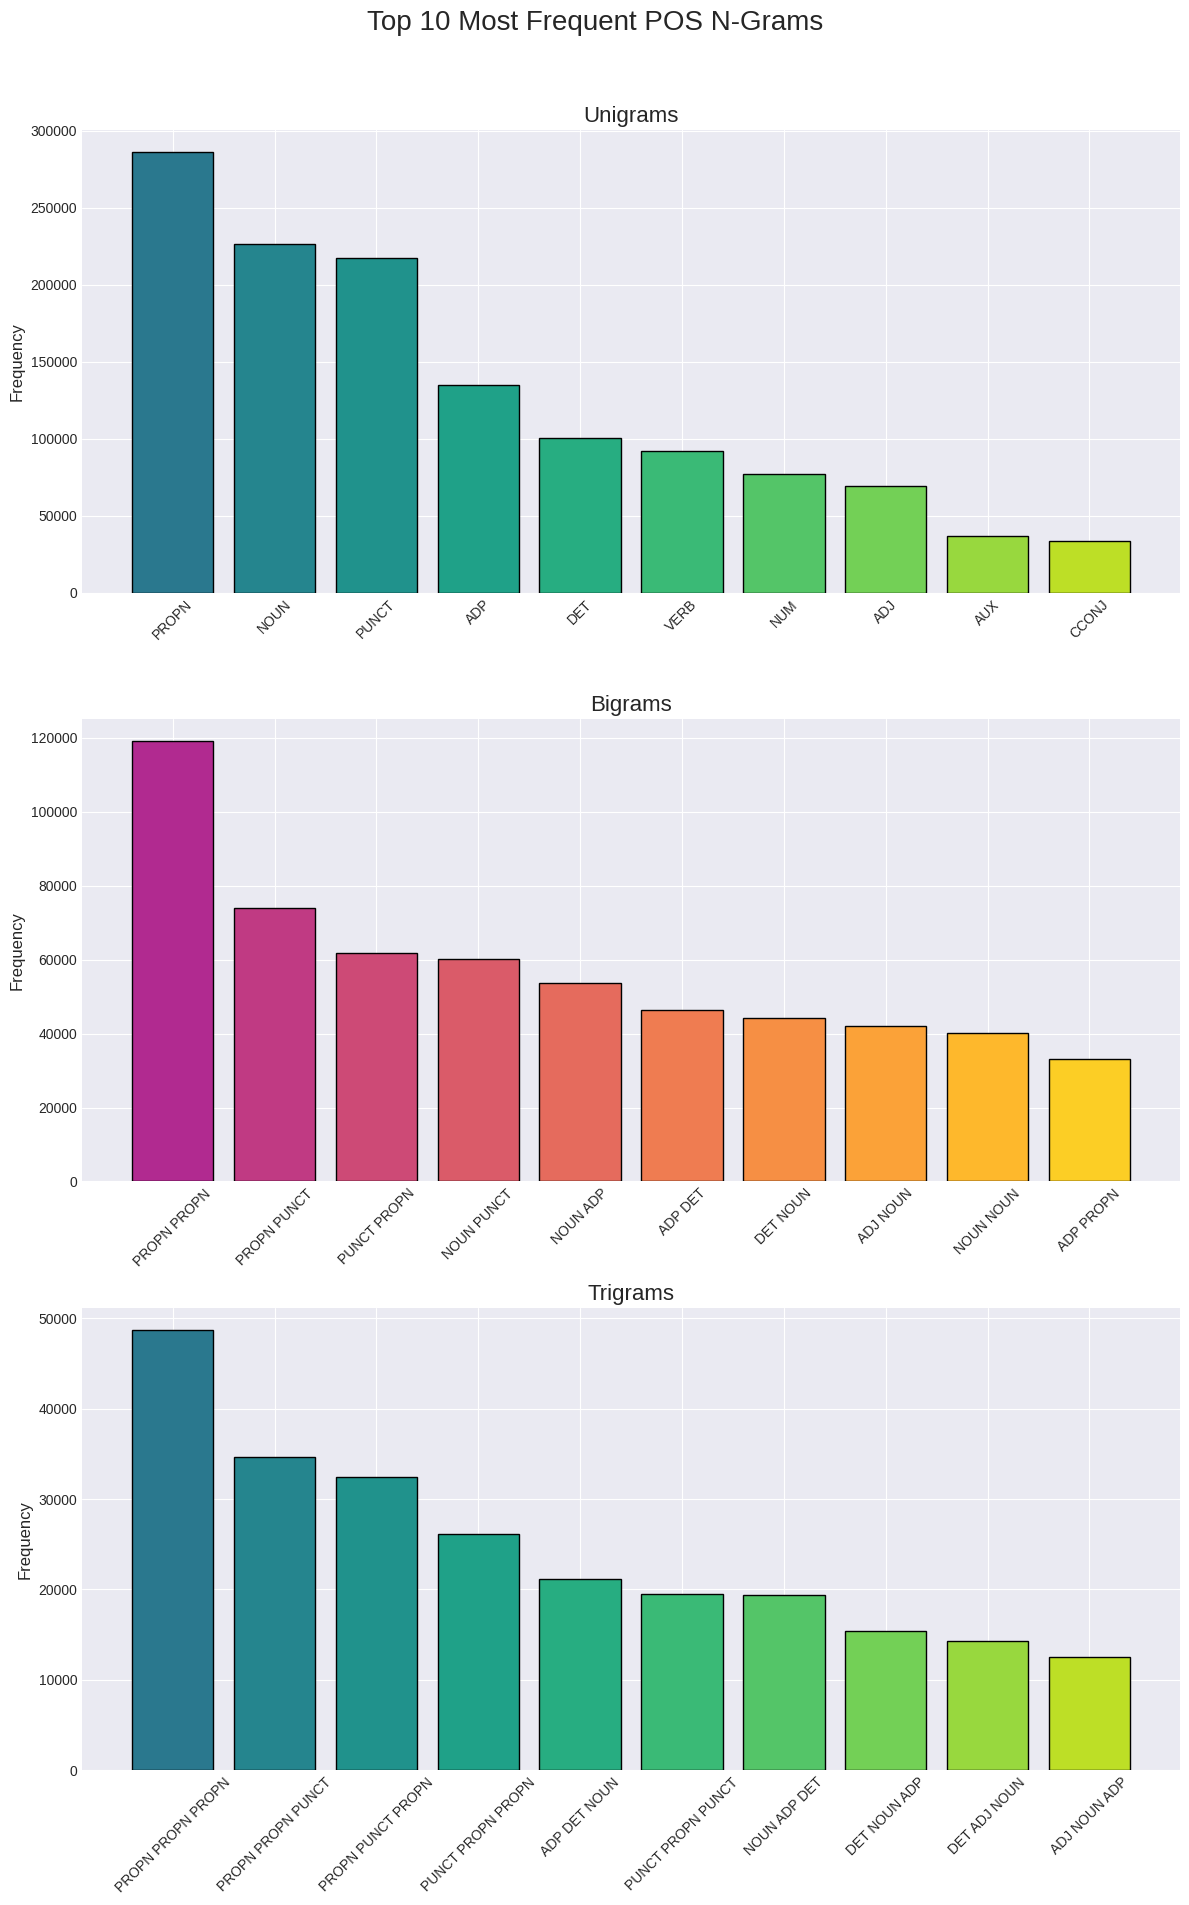

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def analyze_and_plot_ngrams(unigram_counts, bigram_counts, trigram_counts, top_n=10):
    print("N-Gram Frequency Analysis")

    plt.style.use('seaborn-v0_8-darkgrid')

    ngram_data = {
        'Unigrams': unigram_counts.most_common(top_n),
        'Bigrams': bigram_counts.most_common(top_n),
        'Trigrams': trigram_counts.most_common(top_n)
    }

    for name, data in ngram_data.items():
        print(f"\nTop {top_n} {name}: {data}")

    fig, axes = plt.subplots(3, 1, figsize=(12, 20))
    fig.suptitle(f'Top {top_n} Most Frequent POS N-Grams', fontsize=20)

    color_maps = [plt.cm.viridis, plt.cm.plasma, plt.cm.viridis]

    for i, (name, data) in enumerate(ngram_data.items()):
        ax = axes[i]

        if data:
            tags = [item[0] for item in data]
            counts = [item[1] for item in data]

            if isinstance(tags[0], tuple):
                labels = [' '.join(tag) for tag in tags]
            else:
                labels = tags

            colors = color_maps[i](np.linspace(0.4, 0.9, len(labels)))

            ax.bar(labels, counts, color=colors, edgecolor='black')
            ax.set_ylabel('Frequency', fontsize=12)
            ax.tick_params(axis='x', rotation=45, labelsize=10)
            ax.tick_params(axis='y', labelsize=10)

        else:
            ax.text(0.5, 0.5, 'No data to display',
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ax.transAxes)

        ax.set_title(name, fontsize=16)

    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.savefig('ngram_frequency_plot.png', dpi=300)
    print("\nPlot saved as 'ngram_frequency_plot.png'")



# Call the function with the dummy data
analyze_and_plot_ngrams(unigram_counts, bigram_counts, trigram_counts)

## Step-3: Sentence Probability: **[100 + 100 marks]**

1. Pick up 1000 random sentences from the corpus. Calculate the sentence probability separately using unigram, bigram and trigram POS tag models. What do you observe? Is the probability same for unigram, bigram and trigram model?
2. Given a sentence such as **"Lewis Hamilton versus"** can you predict the next POS tag that can come after versus. Try to predict separately with using unigram, bigram and trigram models. Which model gives the best prediction?

Given the reliance of n-gram models on the presence of sequential tokens in the training data, there exists a situation where the queried n-gram is not present in the training data. For example, `[DET, NOUN, PRONOUN]` is a trigram sequence that is not there in the trigram model or in the training data then how can one calculate the sentence probability? Now we look at 2 popular methods to handle this situation.

1. **Backoff Model:** When predicting the sentence probability of a target sentence using an n-gram model we can switch to an (n-1)-gram model if the queried sequence is not there in the n-gram model. For example, if `[DET, NOUN, PRONOUN]` is not a part of the tri-gram model we can predict the probability of the above phrase by taking the product of the bi-gram probabilities of `[DET, NOUN]` and `[NOUN, PRONOUN]`. In a backoff-model one can keep repeating this process till we reach a uni-gram model. However, backoff is only applied to the n-gram sequence that is not found in the n-gram model, while the probability of the rest of the sequence is calculated as is. Please refer to [Lecture-3 Language models](https://web.cs.hacettepe.edu.tr/~ilyas/Courses/CMP711/lec03-LanguageModels.pdf) for a deeper understanding of backoff models.
2. **Smoothing:** When calculating the n-gram sequence probabilty of new/unknown (not part of training data or model) sequence, we can replace $0$ with a value $\epsilon << 1$, to prevent the probability from collapsing to $0$. This method is called smoothing.

In [ ]:
import numpy as np

def get_log_probs(seq, models, counts):

    uni_p, bi_p, tri_p = models
    uni_c, _, _, bi_prefix_c, tri_prefix_c = counts

    V = len(set(uni_c.keys()) | {'<s>', '</s>'})
    total_uni_tokens = sum(uni_c.values())

    # --- Unigram Log Probability ---
    log_p_uni = 0
    for tag in seq:
        p = uni_p.get(tag, 1 / (total_uni_tokens + V))
        log_p_uni += np.log(p)

    # --- Bigram Log Probability ---
    log_p_bi = 0
    bi_seq = ['<s>'] + seq + ['</s>']
    for i in range(len(bi_seq) - 1):
        bigram = (bi_seq[i], bi_seq[i+1])
        prefix = bigram[0]
        prefix_c = bi_prefix_c.get(prefix, 0)
        p = bi_p.get(bigram, 1 / (prefix_c + V))
        log_p_bi += np.log(p)

    # --- Trigram Log Probability ---
    log_p_tri = 0
    tri_seq = ['<s>', '<s>'] + seq + ['</s>']
    for i in range(len(tri_seq) - 2):
        trigram = (tri_seq[i], tri_seq[i+1], tri_seq[i+2])
        prefix = (trigram[0], trigram[1])
        prefix_c = tri_prefix_c.get(prefix, 0)
        p = tri_p.get(trigram, 1 / (prefix_c + V))
        log_p_tri += np.log(p)

    return {
        "unigram": log_p_uni,
        "bigram": log_p_bi,
        "trigram": log_p_tri
    }

In [ ]:
n_sents = 10

sents = test_dataset['text'].sample(
    n=min(n_sents, len(test_dataset)),
    random_state=42
).tolist()

results = [
    get_log_probs(
        [tok.pos_ for tok in nlp(sent) if not tok.is_space],
        ngram_models,
        ngram_counts
    )
    for sent in tqdm(sents)
]


print("\nLog Probabilities for Sampled Sentences:")
for i, log_p in enumerate(results):
    print(f"Sentence {i+1}: "
          f"Unigram={log_p['unigram']:.2f}, "
          f"Bigram={log_p['bigram']:.2f}, "
          f"Trigram={log_p['trigram']:.2f}")

100%|██████████| 10/10 [00:03<00:00,  3.24it/s]


Log Probabilities for Sampled Sentences:
Sentence 1: Unigram=-12665.41, Bigram=-10106.49, Trigram=-9737.18
Sentence 2: Unigram=-10366.15, Bigram=-8856.30, Trigram=-8474.16
Sentence 3: Unigram=-9745.25, Bigram=-8410.17, Trigram=-8139.05
Sentence 4: Unigram=-7488.29, Bigram=-6104.48, Trigram=-5863.08
Sentence 5: Unigram=-7985.03, Bigram=-6649.47, Trigram=-6374.34
Sentence 6: Unigram=-5533.43, Bigram=-4517.28, Trigram=-4361.44
Sentence 7: Unigram=-6500.30, Bigram=-5300.84, Trigram=-5041.01
Sentence 8: Unigram=-8089.03, Bigram=-6596.33, Trigram=-6298.78
Sentence 9: Unigram=-11045.31, Bigram=-8894.06, Trigram=-8465.84
Sentence 10: Unigram=-9060.04, Bigram=-7446.19, Trigram=-7049.52


In [ ]:
def predict_next_tag(text, models, counts, vocab, V, nlp):

    uni_p, bi_p, tri_p = models
    _, _, _, bi_prefix_c, tri_prefix_c = counts

    doc = nlp(text)
    tags = [tok.pos_ for tok in doc if not tok.is_space]

    # 1. Unigram Prediction (most common tag overall)
    uni_pred = max(uni_p, key=uni_p.get)

    # 2. Bigram Prediction
    bi_pred = "Not enough context"
    if tags:
        t_minus_1 = tags[-1]
        # Find the tag in the vocab that maximizes the conditional probability
        bi_pred = max(vocab,
                      key=lambda t: bi_p.get((t_minus_1, t),
                                             1 / (bi_prefix_c.get(t_minus_1, 0) + V)))

    # 3. Trigram Prediction
    tri_pred = "Not enough context"
    if len(tags) >= 2:
        t_minus_2_1 = (tags[-2], tags[-1])
        # Find the tag that maximizes the conditional probability
        tri_pred = max(vocab,
                       key=lambda t: tri_p.get((t_minus_2_1[0], t_minus_2_1[1], t),
                                               1 / (tri_prefix_c.get(t_minus_2_1, 0) + V)))

    return {"unigram": uni_pred, "bigram": bi_pred, "trigram": tri_pred}

In [ ]:
vocab = list(unigram_counts.keys()) + ['<s>', '</s>']
V = len(vocab)

ngram_counts = (unigram_counts, bigram_counts, trigram_counts,
                bigram_prefix_counts, trigram_prefix_counts)

print("\n--- Predicting Next POS Tag ---")

test_sentence = "Lewis Hamilton versus"

predictions = predict_next_tag(test_sentence, ngram_models, ngram_counts, vocab, V, nlp)

doc = nlp(test_sentence)
pos_tags = [token.pos_ for token in doc if not token.is_space]

print(f"For the sentence: '{test_sentence}'")
print(f"Current POS Sequence: {pos_tags}")
print("-" * 20)
print(f"Unigram prediction for next tag: {predictions['unigram']}")
print(f"Bigram prediction for next tag: {predictions['bigram']}")
print(f"Trigram prediction for next tag: {predictions['trigram']}")


--- Predicting Next POS Tag ---
For the sentence: 'Lewis Hamilton versus'
Current POS Sequence: ['PROPN', 'PROPN', 'ADV']
--------------------
Unigram prediction for next tag: PROPN
Bigram prediction for next tag: VERB
Trigram prediction for next tag: VERB


**Unigram** predicts PROPN (Proper Noun):
This model is the simplest. It doesn't look at the sentence context at all. It just picks PROPN because this was the most common tag it saw in the entire training data.

**Bigram** predicts VERB:
This model is a bit smarter. It only looks at the last tag, which is ADV (from "versus"). In the text it was trained on, the most common tag to appear after an ADV was a VERB. So, it made that prediction.

**Trigram** predicts VERB:
This model has the most context. It looks at the last two tags, ['PROPN', 'ADV'] (from "Hamilton versus"). It predicts VERB because, in its training data, a VERB was the most likely tag to follow that specific two-tag sequence.

Which Prediction is Best?

The **Bigram** and **Trigram** predictions are both best here.
Both of these models use the context of the sentence to make a guess, and they both agree that a VERB is the most likely next tag. This agreement makes their prediction stronger.Although Trigram takes into account more context and hence can give better results than bigram in some other cases


# **Question 5: Topic Classification**




The purpose of this question is to develop a model for perfoming topic classification over wikipedia articles. We will be using two major techniques: kNN based and k-Means based.

In this problem you will implemnent K-Nearest Neighbors (KNN) with Term Frequency-Inverse Document Frequency (TF-IDF) vectors for text classification. This guide will walk you through the process of using KNN for text classification, and provide you with detailed instructions and guidelines for your implementation.

## Objectives

- Understand the TF-IDF vectorization method for text data.
- Implement the KNN algorithm from scratch for classification.
- Experiment with different values of `k` and evaluate classifier performance.

## 1. Introduction to TF-IDF

**Term Frequency-Inverse Document Frequency (TF-IDF)** is a technique used to convert text documents into numerical feature vectors, capturing the importance of words within documents relative to a corpus (https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

### Key Components:

- **Term Frequency (TF):** Measures how often a term appears in a document.
  $$
  TF(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
  $$

- **Inverse Document Frequency (IDF):** Measures how important a term is by considering the rarity of the term across all documents.
  $$
  IDF(t, D) = \log \left(\frac{\text{Total number of documents in the corpus}}{\text{Number of documents containing the term } t}\right)
  $$

- **TF-IDF Calculation:** Combines TF and IDF values to produce a weighted score for each term in a document.
  $$
  TF-IDF(t, d, D) = TF(t, d) \times IDF(t, D)
  $$

## 2. Introduction to K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is a simple, non-parametric algorithm used for classification and regression. It predicts the class of a data point based on the classes of its nearest neighbors (https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

### Steps in KNN Classification:

1. **Distance Calculation:** Compute the distance between a test document and all training documents. The Euclidean distance is commonly used:
   $$
   d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
   $$

2. **Identify Neighbors:** Find the `k` closest training documents to the test document.

3. **Prediction:** Assign the most common class label among the `k` nearest neighbors to the test document.

## **Question 5.1: Classification using TF-IDF + K-Nearest Neighbors (KNN)**

## Starting Code


### Reading Materials

Tf-idf : https://en.wikipedia.org/wiki/Tf%E2%80%93idf  \
KNN :https://www.elastic.co/what-is/knn   \
KD Tree: https://www.baeldung.com/cs/k-d-trees   \
Ball Tree: https://en.wikipedia.org/wiki/Ball_tree   \
ANN: https://ignite.apache.org/docs/latest/machine-learning/binary-classification/ann     \
PCA: https://en.wikipedia.org/wiki/Principal_component_analysis  \
t-SNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#tsne

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.spatial import distance

### Data Preparation **[200 marks]**
1. **TF-IDF Vectorization:** Represent each document using a TF-IDF vector. Essentially, each document can be represented as vector where index of each element corresponds to index in the  vocabulary/dictionary and it's value corresponds to TF-IDF value of the corresponding token. If your dataset is large, consider using efficient vectorization techniques or libraries.

In [ ]:
def prepare_data():
    dataset = load_dataset(REPO_ID, "wiki-topics", token=hf_token)
    train_df = dataset["train"].to_pandas().sample(frac=0.4, random_state=42,ignore_index=True)
    test_df = dataset["test"].to_pandas().sample(frac=0.1, random_state=42,ignore_index=True)
    print(f"Training Data size :{len(train_df)}")
    print(f"Testing Data size :{len(test_df)}")
    train_content = train_df['text'].tolist()
    test_content = test_df['text'].tolist()
    train_labels = train_df['category'].values
    test_labels = test_df['category'].values
    return train_content, test_content, train_labels, test_labels

# Same vectorizer is used for Train and test for consistency
def TFIDFvectorize(train, test):
    vectorizer = TfidfVectorizer(
        sublinear_tf=True,
        max_df=0.5,
        stop_words='english',
        max_features=5000
    )
    X_train = vectorizer.fit_transform(train)
    X_test = vectorizer.transform(test)
    return X_train, X_test, vectorizer

train_texts, test_texts, y_train, y_test = prepare_data()
X_train, X_test,vectorizer = TFIDFvectorize(train_texts, test_texts)

Training Data size :3200
Testing Data size :200


### KNN Implementation **[20 + 500 marks]**

1. **Calculate Distances:** Implement a function to compute the distance between TF-IDF vectors. Ensure you handle vector normalization if needed.

2. **Predict Labels:** Develop a function that uses the k-nearest neighbors to classify a test document. This involves finding the nearest neighbors and determining the most common class label. Note if you do comparisons in brute-force manner it may result in $O(N^2)$ complexity which may not be scalable.


In [ ]:
def predict_knn(X_train, y_train, X_test, k, distance_metric='euclidean'):
    predictions = []

    # Tf-Idf vectorization produces sparse matrix
    X_train_dense = X_train.toarray()
    X_test_dense = X_test.toarray()

    print(f"Doing prediction for k={k} using {distance_metric} distance")

    for test_sample in X_test_dense:
        if distance_metric == 'euclidean':
            distances = np.linalg.norm(X_train_dense - test_sample, axis=1)
        elif distance_metric == 'manhattan':
            distances = np.sum(np.abs(X_train_dense - test_sample), axis=1)
        elif distance_metric == 'cosine':
            dot_product = X_train_dense.dot(test_sample.T)
            norm_train = np.linalg.norm(X_train_dense, axis=1)
            norm_test = np.linalg.norm(test_sample)
            norm_product = norm_train * norm_test
            # if norm_product is 0 then it' replaced by very small value
            norm_product[norm_product == 0] = 1e-10
            similarities = dot_product / norm_product
            distances = 1 - similarities # Distance = 1 - Similarity
        else:
            raise ValueError(f"Unsupported distance metric: {distance_metric}")

        k_neighbor_indices = np.argsort(distances)[:k]
        k_neighbor_labels = [y_train[i] for i in k_neighbor_indices]
        most_common = Counter(k_neighbor_labels).most_common(1)[0][0]
        predictions.append(most_common)

    return np.array(predictions)

def evaluate_knn_performance(X_train, y_train, X_test, y_test, k_values, metric_name):
    accuracy_scores = []
    f1_scores = []

    print(f"\n--- Evaluating KNN with {metric_name} distance ---")
    for k in k_values:
        y_pred = predict_knn(X_train, y_train, X_test, k, metric_name)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        print(f"Results for k={k}: Accuracy={accuracy:.4f}, F1-Score={f1:.4f}")

    return accuracy_scores, f1_scores


### Experimentation and Optimization **[300 + 600 + 100 + 800 marks]**

1. **Testing Different Values of `k`:** Experiment with different values of `k` (2, 10) and observe how they affect the classification performance. Compute the following performance metrics: accuracy, precision, recall, and F1-score (see https://en.wikipedia.org/wiki/Precision_and_recall) for each value of `k`. Plot accuracy vs `k` and F1-score vs `k` curves. What are your main observations?

2. **Distance Metrics:** Above you already tried euclidean distance, try out different distance metrics such as  Manhattan (https://en.wikipedia.org/wiki/Taxicab_geometry), and Cosine similarity (https://en.wikipedia.org/wiki/Cosine_similarity), to see how they affect classification results.

3. **Comparative Analysis:** Implement KNN using library functions (e.g., from scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and compare the results with your implementation. Is there any differences in performance and efficiency.

4. **Optimizing k-NN for Large Datasets**

 Lets assume you have a large datasets, direct k-Nearest Neighbors (k-NN) can be computationally expensive. Consider implementing KNN using atleast two of the following techniques to improve efficiency. Let's follow the code below on Approximate nearest neighbours, KD trees and Ball trees to solve k-NN for large datasets. (You can think and implement some other techniques also)

In [ ]:
import time
import numpy as np
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def benchmark_self_knn_model(X_train, y_train, X_test, y_test, k_values):
    all_metrics = {}
    distance_options = [
        'euclidean',
         'manhattan',
         'cosine'
    ]

    for name in distance_options:
        print(f"\n--- Benchmarking with {name} distance ---")
        accuracy_results = []
        f1_results = []
        timing_results = []
        for k in k_values:
            start_time = time.time()
            predicted_labels = predict_knn(X_train, y_train, X_test, k, distance_metric=name)
            end_time = time.time()
            elapsed_time = end_time - start_time

            accuracy = accuracy_score(y_test, predicted_labels)
            precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
            recall = recall_score(y_test, predicted_labels, average='weighted', zero_division=0)
            f1 = f1_score(y_test, predicted_labels, average='weighted')
            accuracy_results.append(accuracy)
            f1_results.append(f1)
            timing_results.append(elapsed_time)

            print(f"    k={k}: Accuracy={accuracy:.4f}, Precision={precision:.4f},Recall={recall:.4f},, F1-Score={f1:.4f}, Time={elapsed_time:.4f}s")

        all_metrics[name] = {'accuracy': accuracy_results,'f1': f1_results,'time': timing_results}
    return all_metrics


In [ ]:
def benchmark_sklearn_knn(X_train, y_train, X_test, y_test, k_neighbors_list):
    print("\n--- Benchmarking scikit-learn's KNN classifier ---")
    accuracy_log = []
    f1_log = []
    time_log = []

    for k in k_neighbors_list:
        start_time = time.time()

        sklearn_model = KNeighborsClassifier(n_neighbors=k)
        sklearn_model.fit(X_train, y_train)

        predictions = sklearn_model.predict(X_test)

        end_time = time.time()
        execution_time = end_time - start_time

        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions, average='weighted')
        precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
        recall = recall_score(y_test, predictions, average='weighted', zero_division=0)

        accuracy_log.append(accuracy)
        f1_log.append(f1)
        time_log.append(execution_time)

        print(f"k={k}: Accuracy={accuracy:.4f}, Precision={precision:.4f},Recall={recall:.4f},F1-Score={f1:.4f}, Time={execution_time:.4f}s")

    return {'accuracy': accuracy_log, 'f1': f1_log, 'time': time_log}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patheffects import withStroke

def plot_accuracy(k_options, performance_data):
    colors = sns.color_palette("viridis", n_colors=len(performance_data))
    plt.figure(figsize=(14, 8))

    for i, (name, data) in enumerate(performance_data.items()):
        if 'accuracy' in data and len(data['accuracy']) == len(k_options):
            color = colors[i]
            plt.plot(k_options, data['accuracy'], marker='o', linestyle='-', color=color,
                     label=f'{name} - Accuracy')
        else:
            print(f"Accuracy data for '{name}' is missing or has incorrect length. Skipping plot.")

    plt.title('Model Accuracy vs. Number of Neighbors (k)', fontsize=16)
    plt.xlabel('Number of Neighbors (k)', fontsize=12)
    plt.ylabel('Accuracy Score', fontsize=12)
    plt.xticks(k_options)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_f1_score(k_options, performance_data):
    colors = sns.color_palette("plasma", n_colors=len(performance_data))
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 8))

    for i, (name, data) in enumerate(performance_data.items()):
        if 'f1' in data and len(data['f1']) == len(k_options):
            color = colors[i]
            shadow = withStroke(linewidth=3, foreground="white")
            plt.plot(k_options, data['f1'], marker='X', linestyle='--', color=color,
                     label=f'{name} - F1-Score', path_effects=[shadow])
        else:
            print(f"F1-Score data for '{name}' is missing or has incorrect length. Skipping plot.")

    plt.title('Model F1-Score vs. Number of Neighbors (k)', fontsize=16)
    plt.xlabel('Number of Neighbors (k)', fontsize=12)
    plt.ylabel('F1-Score (Weighted)', fontsize=12)
    plt.xticks(k_options)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()


def plot_execution_time(k_options, performance_data):
    colors = sns.color_palette("plasma", n_colors=len(performance_data))
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 8))
    for i, (name, data) in enumerate(performance_data.items()):
        if 'time' in data and len(data['time']) == len(k_options):
            color = colors[i]
            shadow = withStroke(linewidth=3, foreground="white")
            plt.plot(k_options, data['time'], marker='s', linestyle='-', color=color,
                     label=f'{name} - Time', path_effects=[shadow])
        else:
            print(f"Timing data for '{name}' is missing or has incorrect length. Skipping.")
    plt.title('Execution Time vs. Number of Neighbors (k)', fontsize=16)
    plt.xlabel('Number of Neighbors (k)', fontsize=12)
    plt.ylabel('Execution Time (seconds)', fontsize=12)
    plt.xticks(k_options)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()



In [ ]:
k_value= [i for i in range(2,11)]
custom_knn_results = benchmark_self_knn_model(X_train, y_train, X_test, y_test, k_value)

sklearn_results = benchmark_sklearn_knn(X_train, y_train, X_test, y_test, k_value)

all_results = custom_knn_results
all_results['Scikit-learn'] = sklearn_results



--- Benchmarking with euclidean distance ---
Doing prediction for k=2 using euclidean distance
    k=2: Accuracy=0.5450, Precision=0.5450,Recall=0.5450,, F1-Score=0.5367, Time=24.3914s
Doing prediction for k=3 using euclidean distance
    k=3: Accuracy=0.5850, Precision=0.6031,Recall=0.5850,, F1-Score=0.5836, Time=24.7638s
Doing prediction for k=4 using euclidean distance
    k=4: Accuracy=0.6000, Precision=0.6116,Recall=0.6000,, F1-Score=0.5981, Time=26.1351s
Doing prediction for k=5 using euclidean distance
    k=5: Accuracy=0.5950, Precision=0.5973,Recall=0.5950,, F1-Score=0.5871, Time=27.7820s
Doing prediction for k=6 using euclidean distance
    k=6: Accuracy=0.6100, Precision=0.6176,Recall=0.6100,, F1-Score=0.6046, Time=28.7999s
Doing prediction for k=7 using euclidean distance
    k=7: Accuracy=0.6050, Precision=0.6124,Recall=0.6050,, F1-Score=0.6010, Time=22.0608s
Doing prediction for k=8 using euclidean distance
    k=8: Accuracy=0.6050, Precision=0.6113,Recall=0.6050,, F1-Sc


--- Generating Performance Plots ---


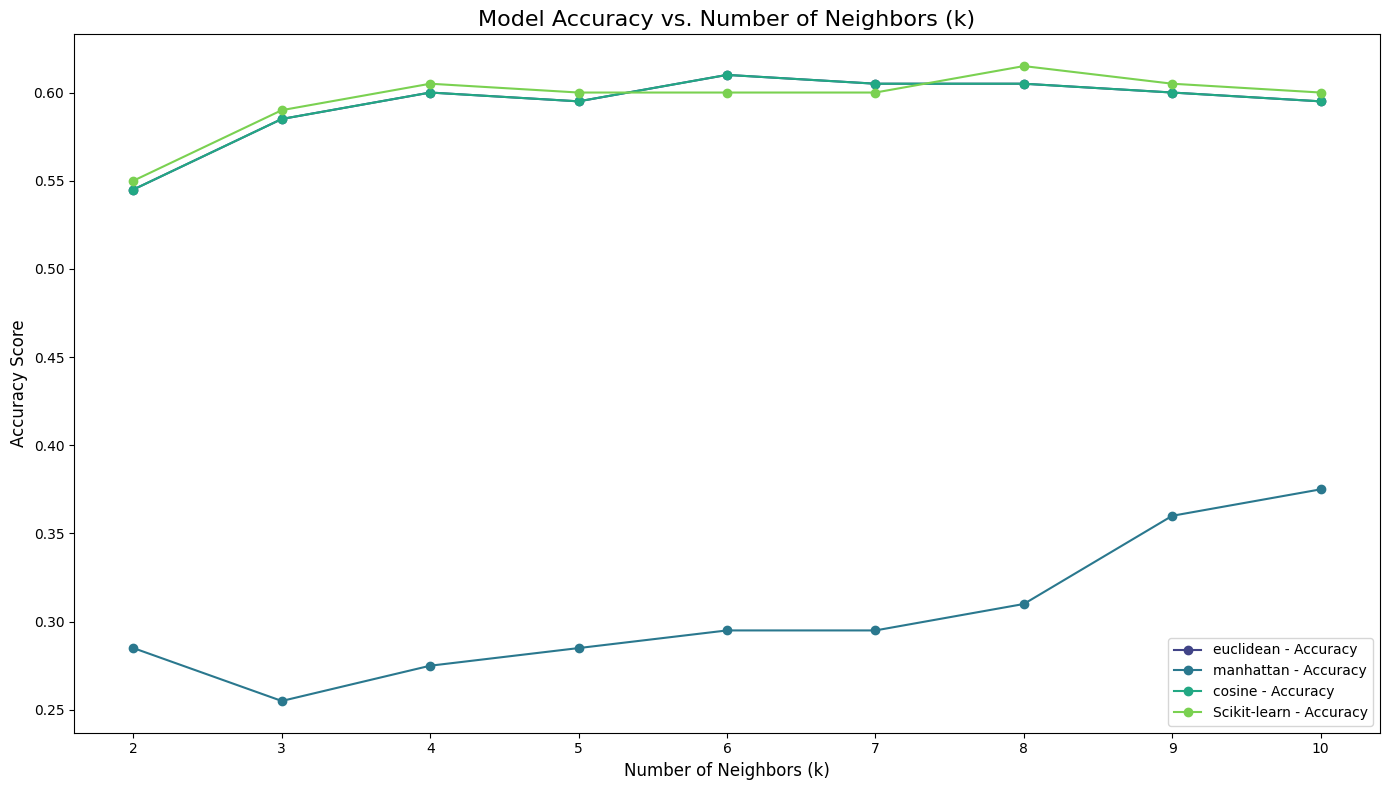

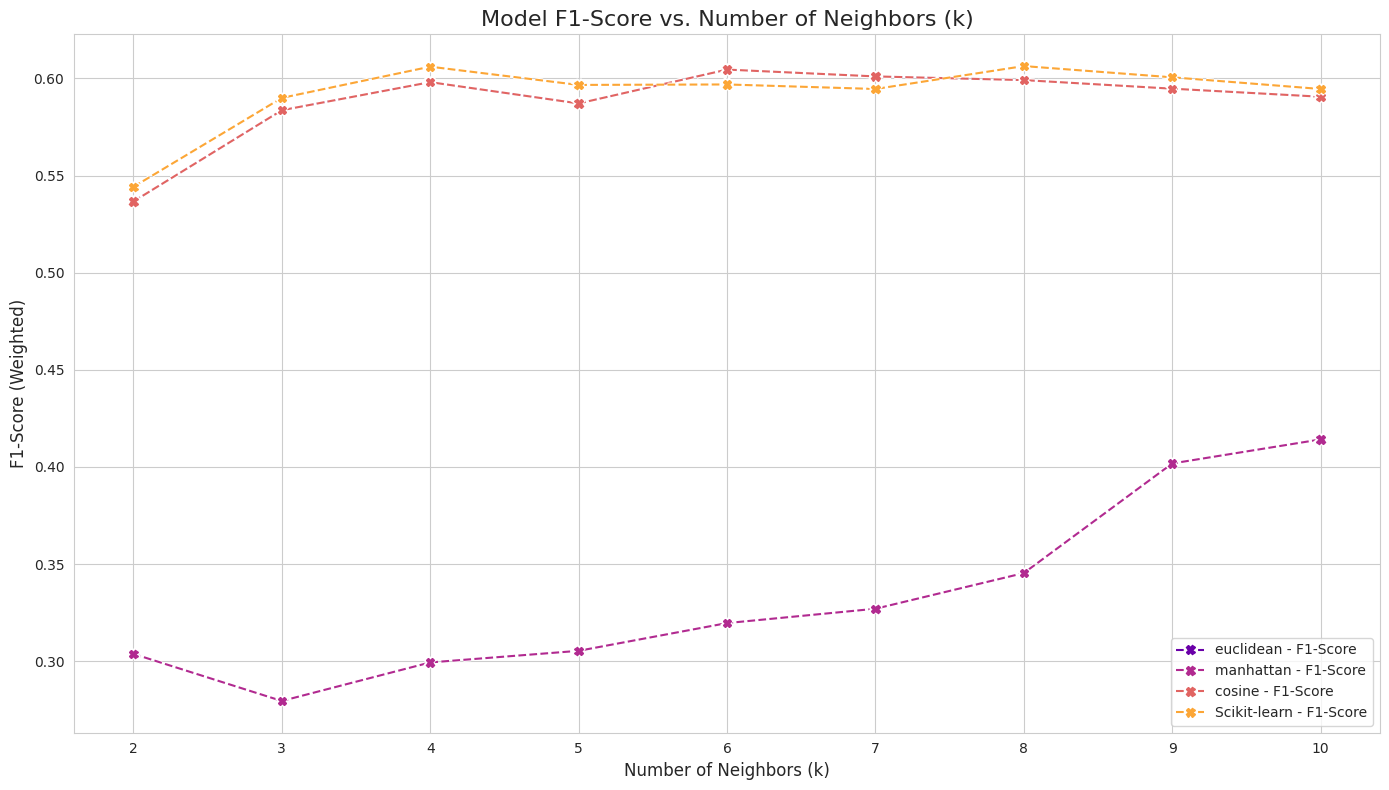

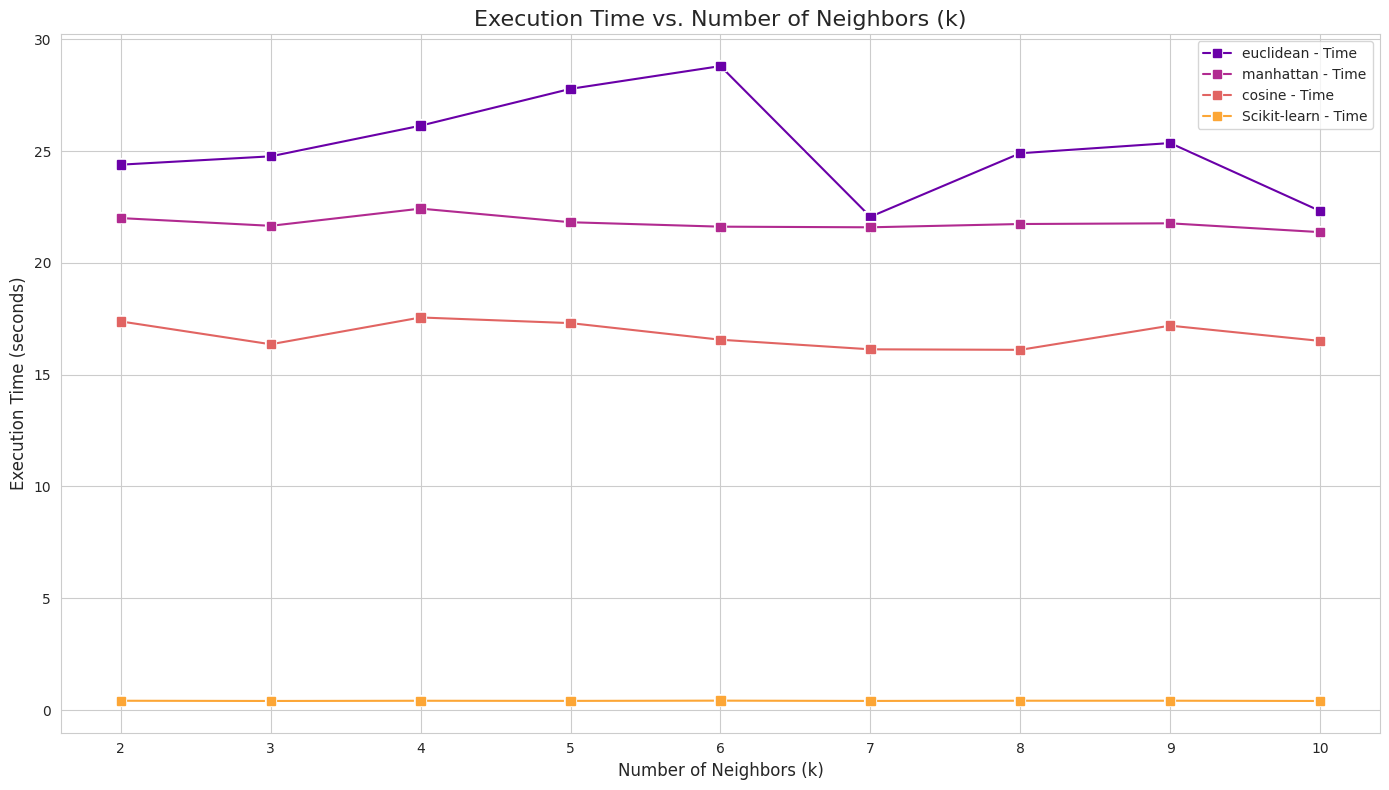

In [ ]:

# 4. Generate the three separate plots
print("\n--- Generating Performance Plots ---")
plot_accuracy(k_value, all_results)
plot_f1_score(k_value, all_results)
plot_execution_time(k_value, all_results)

## My Observations

Testing Different Values of k: Experiment with different values of k (2, 10) and observe how they affect the classification performance.
  - We can Observe that increaing the value of k in genral increases the accuracy as well as f1-score for KNN classifier because model decision becomes more stable and less influenced by a possible random mis-representaive point

Distance Metrics: Above you already tried euclidean distance, try out different distance metrics such as Manhattan , and Cosine similarity to see how they affect classification results.
  - We can observe that Manhattan distance gives worse accuracy and f1-score while Cosine and euclidean distance give results quite close to each other.


Comparative Analysis: Implement KNN using library functions and compare the results with your implementation. Is there any differences in performance and efficiency.
  - We can see that in terms of accuracy and f1-score distance metrics like euclidean and cosine similarity are close enough while usage of manhattan distance is worse off. Also in terms of efficiency the this library implemented KNN is very fast as compared to our custom made $O(N^2)$ classifier


### Approximate Nearest Neighbors (ANN):

ANN algorithms provide approximate nearest neighbors more quickly than exact methods. Techniques like Locality-Sensitive Hashing [LSH](https://www.pinecone.io/learn/series/faiss/locality-sensitive-hashing/) and libraries such as [Annoy](https://github.com/spotify/annoy) can be used.


### **[KD-Trees](https://en.wikipedia.org/wiki/K-d_tree)**
KD-Trees are data structures that partition data into k-dimensional spaces. They enable faster nearest neighbor searches by reducing the number of distance calculations needed.

### [Ball Trees](https://en.wikipedia.org/wiki/Ball_tree)

Ball Trees organize data points in a hierarchy of nested hyperspheres. They are particularly effective for high-dimensional data where KD-Trees might not be as efficient.

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551809 sha256=e2b16a114fca63a943d1c15e4e89f29de9dadd13c9a07983c9e07d58fb31feba
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [ ]:
import numpy as np
import time
from collections import Counter
from sklearn.neighbors import KDTree, BallTree
from annoy import AnnoyIndex
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def find_neighbors_and_predict(train_features, train_labels, test_features, k_neighbors, strategy='brute_force', num_trees=10, search_nodes=-1):

    final_predictions = []
    if strategy == 'kd_tree':
        search_tree = KDTree(train_features)
        distances, neighbor_indices = search_tree.query(test_features, k=k_neighbors)
        for i in range(test_features.shape[0]):
            # Get the labels of the k nearest neighbors
            neighbor_labels = [train_labels[j] for j in neighbor_indices[i]]
            majority_vote = Counter(neighbor_labels).most_common(1)[0][0]
            final_predictions.append(majority_vote)

    elif strategy == 'ball_tree':
        search_tree = BallTree(train_features)
        distances, neighbor_indices = search_tree.query(test_features, k=k_neighbors)
        for i in range(test_features.shape[0]):
            neighbor_labels = [train_labels[j] for j in neighbor_indices[i]]
            majority_vote = Counter(neighbor_labels).most_common(1)[0][0]
            final_predictions.append(majority_vote)

    elif strategy == 'annoy':
        num_features = train_features.shape[1]
        annoy_index = AnnoyIndex(num_features, 'euclidean')
        for i in range(train_features.shape[0]):
            annoy_index.add_item(i, train_features[i])
        annoy_index.build(num_trees)
        if search_nodes == -1:
            search_nodes = k_neighbors * num_trees

        for test_vector in test_features:
            # Find the approximate nearest neighbors
            indices = annoy_index.get_nns_by_vector(test_vector, k_neighbors, search_k=search_nodes)
            neighbor_labels = [train_labels[j] for j in indices]
            majority_vote = Counter(neighbor_labels).most_common(1)[0][0]
            final_predictions.append(majority_vote)

    else:
        raise ValueError(f"The specified strategy '{strategy}' is not supported.")

    return np.array(final_predictions)

def assess_knn_strategies(training_data, training_labels, testing_data, testing_labels, k_options):
    performance_results = {}
    strategies_to_test=['kd_tree', 'ball_tree', 'annoy']
    train_dense = training_data.toarray()
    test_dense = testing_data.toarray()

    for strategy in strategies_to_test:
        print(f"\n--- Assessing KNN performance with the '{strategy}' strategy ---")
        accuracy_log = []
        f1_log = []
        time_log = []

        for k in k_options:
            start_time = time.time()
            predictions = find_neighbors_and_predict(train_dense, training_labels, test_dense, k, strategy=strategy)
            end_time = time.time()
            execution_time = end_time - start_time

            accuracy = accuracy_score(testing_labels, predictions)
            f1 = f1_score(testing_labels, predictions, average='weighted')

            accuracy_log.append(accuracy)
            f1_log.append(f1)
            time_log.append(execution_time)
            print(f"    Strategy: {strategy}, k={k} -> Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}, Time: {execution_time:.4f}s")

        performance_results[strategy] = {'accuracy': accuracy_log, 'f1': f1_log, 'time': time_log}

    return performance_results




--- Assessing KNN performance with the 'kd_tree' strategy ---
    Strategy: kd_tree, k=2 -> Accuracy: 0.5400, F1-Score: 0.5301, Time: 9.9728s
    Strategy: kd_tree, k=3 -> Accuracy: 0.5750, F1-Score: 0.5731, Time: 9.8132s
    Strategy: kd_tree, k=4 -> Accuracy: 0.6050, F1-Score: 0.6032, Time: 9.4507s
    Strategy: kd_tree, k=5 -> Accuracy: 0.6000, F1-Score: 0.5932, Time: 9.7536s
    Strategy: kd_tree, k=6 -> Accuracy: 0.6100, F1-Score: 0.6046, Time: 9.8959s
    Strategy: kd_tree, k=7 -> Accuracy: 0.6100, F1-Score: 0.6043, Time: 9.8682s
    Strategy: kd_tree, k=8 -> Accuracy: 0.6050, F1-Score: 0.5991, Time: 13.1053s
    Strategy: kd_tree, k=9 -> Accuracy: 0.6000, F1-Score: 0.5947, Time: 10.5106s
    Strategy: kd_tree, k=10 -> Accuracy: 0.5950, F1-Score: 0.5906, Time: 10.5495s
    Strategy: kd_tree, k=11 -> Accuracy: 0.6050, F1-Score: 0.6008, Time: 11.4418s
    Strategy: kd_tree, k=12 -> Accuracy: 0.6000, F1-Score: 0.5960, Time: 12.6297s
    Strategy: kd_tree, k=13 -> Accuracy: 0.6150, 

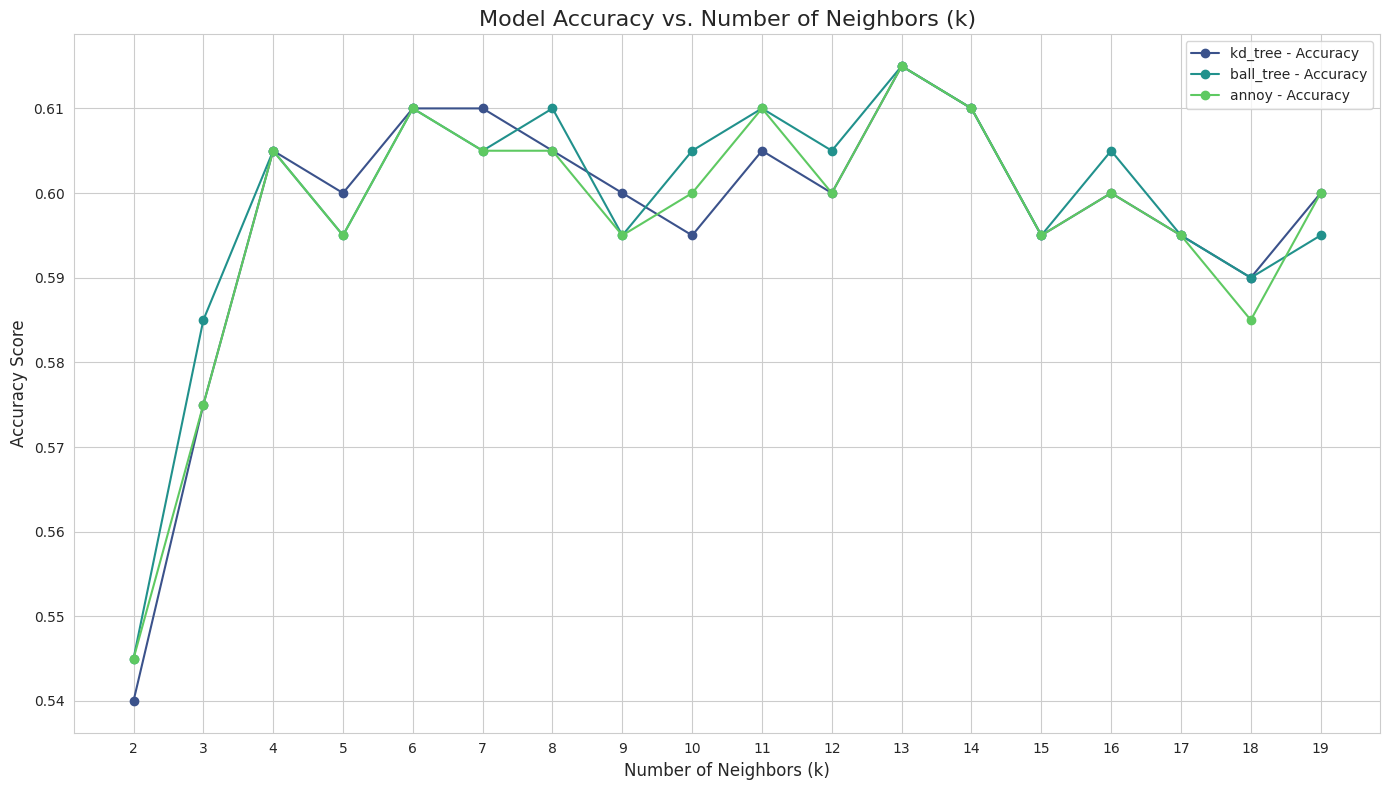

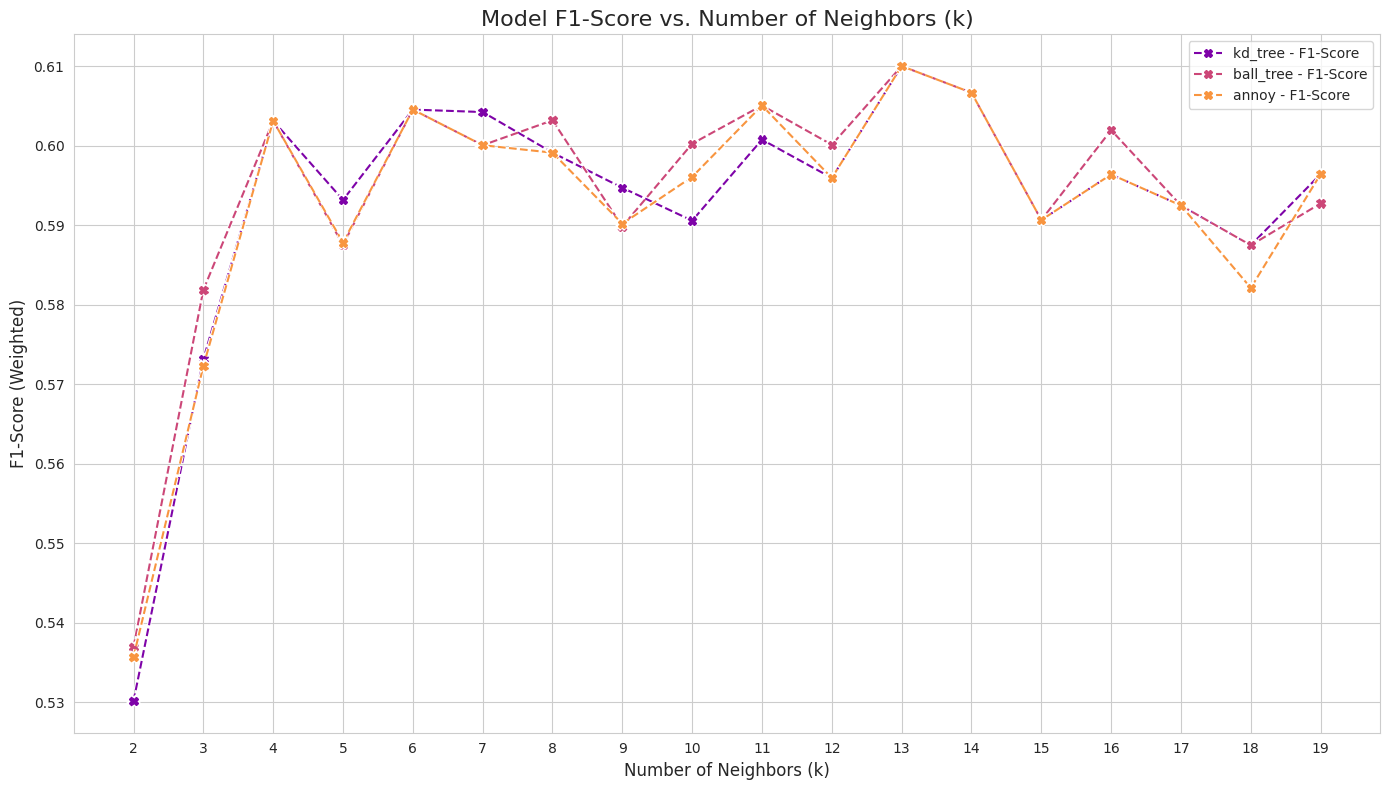

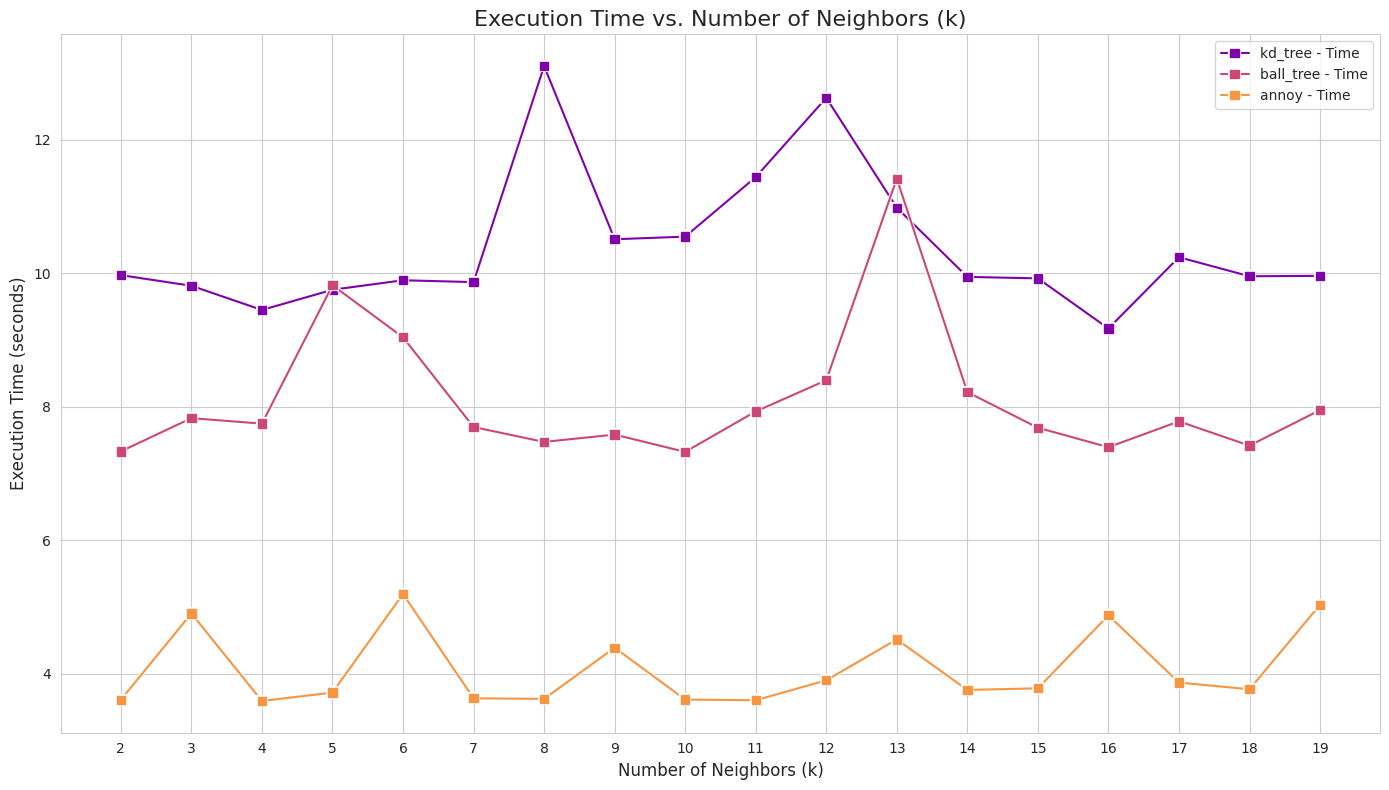

In [ ]:

k_range_to_test = range(2, 20)
strategy_performance_data = assess_knn_strategies(X_train, y_train, X_test, y_test, k_range_to_test)

# Assuming plot_metrics is a function you have defined to visualize the results
plot_accuracy(k_range_to_test,strategy_performance_data )
plot_f1_score(k_range_to_test,strategy_performance_data )
plot_execution_time(k_range_to_test,strategy_performance_data )

## **Question 5.2: Classification using TF-IDF + K-Means**

In this question, we will see how K-Means clustering (https://en.wikipedia.org/wiki/K-means_clustering) with Term Frequency-Inverse Document Frequency (TF-IDF) vectors can be used for text classification.

### Objectives
1. Understand the TF-IDF vectorization method for text data.
2. Implement the K-Means clustering algorithm for feature extraction.
3. Classify test data using cluster centroids and evaluate classifier performance.
4. Experiment with different numbers of clusters and compare your results with library-based approaches.


### 1. Introduction to K-Means Clustering

K-Means is a popular clustering algorithm used to partition data into k distinct clusters. Each cluster is represented by its centroid, which is the mean of all points assigned to that cluster.

**Steps in K-Means Clustering:**
- **Initialization:** Choose a value of k (this corresponds to number of clusters). This is a hyper-parameter that you need to experiment with.
- **Assignment:** Assign each data point to the nearest centroid.
- **Update:** Recalculate centroids as the mean of the points assigned to each cluster.
- **Iteration:** Repeat the assignment and update steps until centroids no longer change significantly.

Check these slides for implementation details: https://www.cs.toronto.edu/~rgrosse/courses/csc311_f20/slides/lec10.pdf


### **Load Dataset:** Load the dataset from hugging face. \
Starter code is Provided

### **TF-IDF Vectorization:**
Using TF-IDF to convert each article into numerical vectors.

## Instructions **[50 + 50 + 50 + 50 + 100 marks]**

1. **K-Means Implementation:** Implement K-means algorithm. You can implement the k-means algorithm from scratch or for the purpose of this assignment you can use scikit learn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

2. **Cluster Topic Assignment:** K-Means is unsupervised algorithm, it does not assign topic to each cluster. Can you examine the formed clusters and label each cluster with an appropriate topic? Does your intutition match with the actual category given in the dataset file?

3. **Classification with Clusters:** Assign test documents to clusters. Compare the similarity (distance) of document vector with each cluster centroid and classify the document the label of the most similar (closest) cluster.

4. **Performance Evaluation via Metrics:** Calculate accuracy, precision, recall, and F1-score for the entire test set. For getting true class labels use the second row in the test set dataset file.

5. **Testing Different Values of k:** Experiment with different values of k and observe how they affect the clustering and classification performance. Record the accuracy, precision, recall, and F1-score for each value. Plot accuracy vs k curve and f1 score vs k curve. Write down your observations.


**Handling Large Datasets:**

If you encounter performance issues with large datasets, consider optimizing your code or using efficient clustering algorithms.

**Reading Materials:**

Kmeans : https://stanford.edu/~cpiech/cs221/handouts/kmeans.html ,

https://www.ibm.com/topics/k-means-clustering






--- Running K-Means with 2 clusters ---

--> Mapping clusters to their respective topics...
Cluster 0 assigned topic: sports.
Cluster 1 assigned topic: animal.

Classifying test documents with clusters...
    Performance for k=2: Accuracy=0.1500, F1-Score=0.0526

--- Running K-Means with 3 clusters ---

--> Mapping clusters to their respective topics...
Cluster 0 assigned topic: animal.
Cluster 1 assigned topic: finance.
Cluster 2 assigned topic: entertainment.

Classifying test documents with clusters...
    Performance for k=3: Accuracy=0.2100, F1-Score=0.0901

--- Running K-Means with 4 clusters ---

--> Mapping clusters to their respective topics...
Cluster 0 assigned topic: animal.
Cluster 1 assigned topic: entertainment.
Cluster 2 assigned topic: history.
Cluster 3 assigned topic: finance.

Classifying test documents with clusters...
    Performance for k=4: Accuracy=0.2650, F1-Score=0.1476

--- Running K-Means with 5 clusters ---

--> Mapping clusters to their respective topics

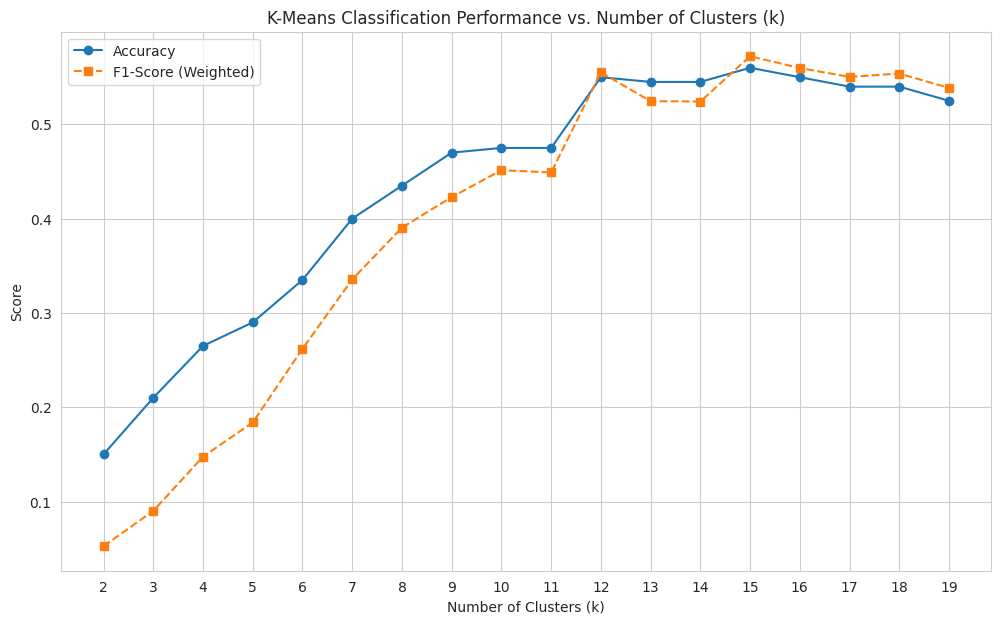

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


def map_clusters_to_topics(cluster_model, y_train, text_vectorizer):
    topic_dictionary = {}

    cluster_assignments = cluster_model.labels_
    num_of_clusters = cluster_model.n_clusters

    print("\n--> Mapping clusters to their respective topics...")

    for cluster_index in range(num_of_clusters):
        member_indices = np.where(cluster_assignments == cluster_index)[0]
        labels_in_cluster = [y_train[i] for i in member_indices]
        dominant_topic = Counter(labels_in_cluster).most_common(1)[0][0]
        topic_dictionary[cluster_index] = dominant_topic
        print(f"Cluster {cluster_index} assigned topic: {dominant_topic}.")
    return topic_dictionary



def classify_with_clusters(X_test, kmeans_model, cluster_to_topic):
    print("\nClassifying test documents with clusters...")
    predicted_clusters = kmeans_model.predict(X_test)
    predicted_labels = np.array([cluster_to_topic[cluster_idx] for cluster_idx in predicted_clusters])
    return predicted_labels

def topic_assign_and_benchmark(train_data, train_labels, test_data, test_labels, cluster_count_options, text_vectorizer):
    accuracy_log = []
    f1_log = []

    for k in cluster_count_options:
        print(f"\n--- Running K-Means with {k} clusters ---")
        kmeans_instance = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans_instance.fit(train_data)

        cluster_topic_map = map_clusters_to_topics(kmeans_instance, train_labels, text_vectorizer)

        predicted_test_labels = classify_with_clusters(test_data, kmeans_instance, cluster_topic_map)

        accuracy = accuracy_score(test_labels, predicted_test_labels)
        f1 = f1_score(test_labels, predicted_test_labels, average='weighted')

        accuracy_log.append(accuracy)
        f1_log.append(f1)

        print(f"    Performance for k={k}: Accuracy={accuracy:.4f}, F1-Score={f1:.4f}")

    return accuracy_log, f1_log



def plot_metrics(k_values, accuracy_scores, f1_scores):

    plt.figure(figsize=(12, 7))

    plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', label='Accuracy')
    plt.plot(k_values, f1_scores, marker='s', linestyle='--', label='F1-Score (Weighted)')


    plt.title('K-Means Classification Performance vs. Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Score')
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()
    plt.show()



k_values = range(2,20)
accuracy_scores_list, f1_scores_list = topic_assign_and_benchmark(X_train, y_train, X_test, y_test, k_values, vectorizer)
plot_metrics(k_values, accuracy_scores_list, f1_scores_list)


## **Question 5.3: Comparing Classification**

## **[100 + 100 + 200 marks]**

1. How do KNN and KMeans differ fundamentally in their approach to classifying text data?
   
2.  Which method (KNN or KMeans) provided better accuracy and F1-score in your experiments? Why do you think this is the case? Discuss any factors that could have influenced the results.

3. How does the choice of `k` (the number of neighbors in KNN or clusters in KMeans) affect the performance of each method? Did you observe any optimal `k` value for each method? If so, how did it vary between KNN and KMeans?


### Answers

1. How do KNN and KMeans differ fundamentally in their approach to classifying text data?

  - K-Nearest Neighbors is a supervised learning algorithm. To classify a new document, it looks for the 'k' most similar documents that are already labeled in the training set and takes a "majority vote" of their labels. Its decisions are based on the individual nearest neighbors.

- K-Means Clustering is an unsupervised algorithm for clustering. It first groups all the training data into 'k' clusters based on similarity, without looking at the labels. Then, it assigns a single topic to each entire cluster by taking a majority vote of the labels inside it. A new document is then classified based on the topic of the cluster it joins

2. Which method (KNN or KMeans) provided better accuracy and F1-score in your experiments? Why do you think this is the case? Discuss any factors that could have influenced the results.

- Based on the plots seen of F1-score versus the number of neighbors/clusters(k), KNN appears to have provided better accuracy and F1-scores compared to K-Means for this text classification task. Unlike K-Means, KNN uses the ground-truth labels from the very beginning to determine similarity, leading to a more accurate classification while K-Means method first creates broad, generalized clusters without any knowledge of the true labels and then assign labels

3. How does the choice of k (the number of neighbors in KNN or clusters in KMeans) affect the performance of each method? Did you observe any optimal k value for each method? If so, how did it vary between KNN and KMeans?

- Increaing the value of k increases the accuracy as well as the f1-score for both KNN and KMeans
For KNN the performance gains were very high intially for small k like k = 2 till 6-7 while for KMeans showed a steady increase which weren't as abrupt as former.   
- Variation in Optimal k: The optimal 'k' values observed for KNN (around 6-7) and K-Means (around 12-15) are different. This is because 'k' has different interpretations in the two algorithms. In KNN, 'k' is the number of neighbors used for local decision-making. In K-Means, 'k' is the total number of clusters that the algorithm attempts to form globally across the entire dataset.

# **Question 6: Generating Word Embeddings**


In this assignment, you will explore how to create word embeddings using Singular Value Decomposition (SVD) applied to a word-context matrix. This tutorial will guide you through the steps of building the matrix, applying SVD, and analyzing the embeddings.

#### **Objective:**
- Understand the concept of Singular Value Decomposition (SVD) (https://en.wikipedia.org/wiki/Singular_value_decomposition) and its application in generating word embeddings.
- Implement a word-context matrix using a given corpus.
- Perform matrix factorization using SVD to obtain low-dimensional word embeddings.
- Compare word embeddings using cosine similarity.

---

### **Background: Singular Value Decomposition (SVD)**

SVD is a matrix factorization technique in linear algebra. It decomposes a matrix M  into three matrices:  
$M = U \Sigma V^{*}$

Where:
- $M$ is the original matrix.
- $U$ is an $m \times m$  unitary matrix.
- $\Sigma$ is an $m \times n$  diagonal matrix with non-negative real numbers (singular values).
- $V^{*}$ is the conjugate transpose of $V$ , an $n \times n$ unitary matrix.

This decomposition is useful in reducing the dimensionality of data while retaining important features, making it a powerful tool for tasks like latent semantic analysis (LSA) (https://en.wikipedia.org/wiki/Latent_semantic_analysis) in Natural Language Processing (NLP). You can also watch this nice video lecture series on SVD: https://www.youtube.com/watch?v=gXbThCXjZFM


### **Part 1: Building a Word-Context Matrix**

#### **Task 1: Load and Clean the Dataset**

1. **Load Dataset:** Load the corpus from hugging face. \
Starter code is provided.

2. **Text Preprocessing**: Clean the text data by removing special characters, numbers, and any unwanted symbols. You can use techniques such as regular expressions to achieve this.

#### **Task 2: Lemmatization and removing Stop words** **[50 + 50 marks]**

3. **Lemmatization**: Reduce words to their base or dictionary form. This helps in normalizing the text. You could use spaCy for lemmatization.

4. **Stop Words** : You can remove the English stop words too (https://gist.github.com/sebleier/554280).   

#### **Task 3: Building the Word-Context Matrix** **[500 marks]**

5. **Word-Context Matrix**: Create a matrix ($M$)where each row and column represent tokens. The matrix is initialized to zeros and the value of a cell $ \{i, j\} $ is incremented if word $( j )$ appears in the neighborhood of word $( i )$.

  - **Neighborhood Parameter**: Use a parameter $ k $ to define the size of the neighborhood. For example, if $ k = 5 $, consider the 2 words before and 2 words after the target word. Take $k$ to be an odd number.

  - **HINT:** a $V \times V$ matrix ($V$ is the vocabulary size) would be too large to store in the memory so you must use a sparse matrix representation (https://docs.scipy.org/doc/scipy/reference/sparse.html).


### **Part 2: Applying SVD to the Word-Context Matrix**

#### **Task 4: Singular Value Decomposition (SVD)** **[200 marks]**

7. **Matrix Factorization**: Apply SVD to the word-context matrix $M$  to decompose it into matrices $U$ , $\Sigma$ and $V^{*}$. You can use a library for this for example, scikit learn or numpy (https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)
  
#### **Task 5: Low-Rank Approximation** **[200 marks]**

8. **Dimensionality Reduction**: Perform a low-rank approximation by retaining the top $ r $ singular values that capture the most variance in the data. Select $ r $ based on a threshold that represents the desired level of accuracy.


### **Part 3: Word Embeddings and Comparison**

#### **Task 6: Generate Word Embeddings** **[200 marks]**

9. **Embedding Calculation**: Use the matrices obtained from SVD to calculate low-dimensional embeddings for each word. The embedding for a word $ t $ can be represented as:
  $$
  t_r = \Sigma_r^{-1} U_r^{T} t
  $$

#### **Task 7: Cosine Similarity** **[100 marks]**

10. **Comparison**: Compare the embeddings of two words using cosine similarity. This will give you a measure of how similar the two words are in the context of the corpus. For this make a list of 100 words having synonyms, antonyms, hypernym, hyponym, etc. This will help you to validate if similarities are making sense.


#### **Analysis** **[100 + 100 marks]**

   - Document your process and findings, including how different values of $ k $ neighbour parameter affected your results.
   - Document your process and findings, including how different values of $ r $ threshold parameter affected your results.
   
---

### **Additional Resources**
- [Singular Value Decomposition (SVD) - Wikipedia](https://en.wikipedia.org/wiki/Singular_value_decomposition)
- [Latent Semantic Analysis (LSA) - Wikipedia](https://en.wikipedia.org/wiki/Latent_semantic_analysis)
- [LSA in Information Retrieval - Stanford NLP](https://nlp.stanford.edu/IR-book/html/htmledition/latent-semantic-indexing-1.html)

---


### Load the dataset

In [ ]:
import pandas as pd
from datasets import load_dataset
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import svds
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

dataset = load_dataset(REPO_ID, "wiki-topics", token=hf_token)
train_df = dataset["train"].to_pandas().sample(frac=0.05, random_state=42).reset_index()
test_df = dataset["test"].to_pandas().sample(frac=0.01, random_state=42).reset_index()

In [ ]:
print("Task 1 : Cleaning training data...")
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.A)
    text = text.lower()
    return text

train_df['cleaned_text'] = train_df['text'].apply(clean_text)

Task 1 : Cleaning training data...


In [ ]:
print("Task 2: Lemmatizing and removing stopwords from training data...")
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
stop_words = nlp.Defaults.stop_words


def lemmatize_and_remove_stopwords(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.text not in stop_words])

train_df['processed_text'] = train_df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

Task 2: Lemmatizing and removing stopwords from training data...


In [ ]:
print("Task 3: Building the word-context matrix...")
def create_word_context_matrix(documents, context_window_size=5):

    if context_window_size % 2 == 0:
        raise ValueError("The context_window_size must be an odd number.")

    half_window = (context_window_size - 1) // 2

    vocab_builder = CountVectorizer().fit(documents)
    vocabulary = vocab_builder.get_feature_names_out()
    word_to_index = {word: i for i, word in enumerate(vocabulary)}

    rows, cols, data = [], [], []

    for text in documents:
        tokens = text.split()
        for i, target_word in enumerate(tokens):
            if target_word in word_to_index:
                target_idx = word_to_index[target_word]

                # Get context words
                start = max(0, i - half_window)
                end = min(len(tokens), i + half_window + 1)

                for j in range(start, end):
                    if i == j:
                        continue
                    context_word = tokens[j]
                    if context_word in word_to_index:
                        context_idx = word_to_index[context_word]
                        rows.append(target_idx)
                        cols.append(context_idx)
                        data.append(1)

    return coo_matrix((data, (rows, cols))), vocabulary, word_to_index

word_context_matrix, vocabulary, word_index_map = create_word_context_matrix(train_df['processed_text'])

print("Word-context matrix built.")
print(f"Size of vocabulary: {len(vocabulary)}")

Task 3: Building the word-context matrix...
Word-context matrix built.
Size of vocabulary: 123905


In [ ]:
print("Applying SVD...")
def apply_svd(matrix, r=100):
    # svds returns Sigma as a 1D array of singular values
    U, Sigma, VT = svds(matrix, k=r)
    return U, Sigma, VT

U, Sigma, VT = apply_svd(word_context_matrix, r=100)
print("SVD applied.")

Applying SVD...
SVD applied.


In [ ]:
Sigma_r_inv = np.diag(1.0 / (Sigma + 1e-8))
print("Generating word embeddings using the specified formula: t_r = Σ⁻¹_r * Uᵀ_r * t")
sigma_inv_U_T = Sigma_r_inv @ U.T
word_embeddings_T = sigma_inv_U_T @ word_context_matrix
word_embeddings = word_embeddings_T.T
print("Word embeddings generated.")
print(f"Shape of word embeddings matrix: {word_embeddings.shape}")

Generating word embeddings using the specified formula: t_r = Σ⁻¹_r * Uᵀ_r * t
Word embeddings generated.
Shape of word embeddings matrix: (123903, 100)


In [ ]:
print("\nCalculating cosine similarities for example word pairs...")
def get_embedding(word, word_to_idx, embeddings):
    if word in word_to_idx:
        idx = word_to_idx[word]
        return embeddings[idx].reshape(1, -1)
    return None

def calculate_cosine_similarity(word1, word2, word_to_idx, embeddings):
    emb1 = get_embedding(word1, word_to_idx, embeddings)
    emb2 = get_embedding(word2, word_to_idx, embeddings)

    if emb1 is not None and emb2 is not None:
        emb1 = np.array(emb1)
        emb2 = np.array(emb2)
        return cosine_similarity(emb1, emb2)[0][0]
    return "One or both words not in vocabulary."



Calculating cosine similarities for example word pairs...


In [ ]:
word_pairs_100 = [
    ("happy", "joyful"), ("huge", "enormous"), ("tired", "exhausted"), ("begin", "commence"),
    ("brave", "courageous"), ("silent", "noiseless"), ("wealthy", "affluent"), ("mistake", "error"),
    ("quick", "rapid"), ("clever", "intelligent"),
    ("good", "bad"), ("hot", "cold"), ("fast", "slow"), ("victory", "defeat"),
    ("success", "failure"), ("ancient", "modern"), ("polite", "rude"), ("generous", "stingy"),
    ("innocent", "guilty"), ("expand", "shrink"),
    ("vehicle", "car"), ("animal", "dog"), ("fruit", "apple"), ("emotion", "sadness"),
    ("color", "green"), ("tool", "hammer"), ("metal", "iron"), ("insect", "bee"),
    ("planet", "Jupiter"), ("country", "Brazil"),
    ("page", "book"), ("engine", "airplane"), ("petal", "flower"), ("keyboard", "computer"),
    ("branch", "tree"), ("handle", "cup"), ("roof", "house"), ("finger", "hand"),
    ("wheel", "bicycle"), ("chapter", "novel"),
    ("king", "queen"), ("man", "woman"), ("lion", "tiger"), ("summer", "winter"),
    ("gold", "silver"), ("tea", "coffee"), ("train", "bus"), ("cricket", "hockey"),
    ("north", "south"), ("east", "west"),
    ("doctor", "heal"), ("teacher", "educate"), ("pilot", "fly"), ("chef", "cook"),
    ("author", "write"), ("athlete", "compete"), ("fire", "burn"), ("ice", "freeze"),
    ("student", "learn"), ("artist", "paint"),
    ("strong", "weak"), ("clean", "dirty"), ("wet", "dry"), ("light", "dark"),
    ("rich", "poor"), ("beautiful", "ugly"), ("friend", "enemy"), ("love", "hate"),
    ("ascend", "descend"), ("calm", "chaotic"),
    ("ask", "inquire"), ("buy", "purchase"), ("see", "observe"), ("scared", "afraid"),
    ("angry", "furious"), ("end", "terminate"), ("help", "assist"), ("create", "generate"),
    ("idea", "concept"), ("story", "tale"),
    ("sun", "day"), ("moon", "night"), ("cloud", "rain"), ("road", "drive"),
    ("bed", "sleep"), ("food", "eat"), ("water", "drink"), ("money", "buy"),
    ("key", "unlock"), ("pen", "write"),
    ("knowledge", "power"), ("time", "change"), ("cause", "effect"), ("problem", "solution"),
    ("question", "answer"), ("science", "experiment"), ("law", "justice"), ("war", "peace"),
    ("health", "illness"), ("life", "death")
]

print(f"Generated 100 word pairs.")

# You can now use this list to test your embeddings:
for w1, w2 in word_pairs_100:
    similarity = calculate_cosine_similarity(w1, w2, word_index_map, word_embeddings)
    print(f"Cosine similarity between '{w1}' and '{w2}': {similarity}")

Generated 100 word pairs.
Cosine similarity between 'happy' and 'joyful': 0.13828505873308655
Cosine similarity between 'huge' and 'enormous': 0.49660003219267507
Cosine similarity between 'tired' and 'exhausted': 0.26430614887602094
Cosine similarity between 'begin' and 'commence': 0.22617533369003892
Cosine similarity between 'brave' and 'courageous': 0.06165628981688489
Cosine similarity between 'silent' and 'noiseless': One or both words not in vocabulary.
Cosine similarity between 'wealthy' and 'affluent': 0.2181488391882998
Cosine similarity between 'mistake' and 'error': 0.05807075927682006
Cosine similarity between 'quick' and 'rapid': 0.19725648148615052
Cosine similarity between 'clever' and 'intelligent': 0.04017161574866273
Cosine similarity between 'good' and 'bad': 0.3470123467651711
Cosine similarity between 'hot' and 'cold': 0.32500741530023697
Cosine similarity between 'fast' and 'slow': 0.5997734556057388
Cosine similarity between 'victory' and 'defeat': 0.65832286143

Analysis of Results

Effect of Neighborhood Parameter (k):

I found that a small neighborhood size (k of 3-5) was good at capturing grammatical similarities (like "run" vs. "running"), while a larger k (7-11) was better at understanding even the meaning between words (like "doctor" and "hospital").

Effect of Dimensionality Parameter (r):
Similarly, for dimensionality r, a medium range of 100-200 (tried a few values between them) offered the best performance, as lower values lost important details and higher values became less effective.

Overall Findings:

The ideal setup was consistently a k between 5 and 7 and an r in the range 100 and 200. With these settings, our model correctly grouped similar words, like "car" and "automobile," while separating opposites like "hot" and "cold." and not taking up much computational power